Импортируем необходимые библиотеки

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk

Импортируем тренировочные и тестовые данные

In [35]:
train_data = pd.read_csv('data/train.csv', encoding='windows-1251', sep=';', low_memory=False)
test_data = pd.read_csv('data/test.csv')

In [33]:

# Функция для чистки колонок: заменяем запятые на точки и приводим к float
def clean_numeric_column(df, column):
    df[column] = (
        df[column]
        .astype(str)
        .str.replace(',', '.', regex=False)  # заменяем запятую на точку
        .str.strip()                         # убираем пробелы по краям
    )
    df[column] = pd.to_numeric(df[column], errors='coerce')  # превращаем в число (NaN если не получилось)

# Колонки, которые нужно привести к числам
numeric_cols = ['DebtRatio', 'TotalBalanceDivideCreditLimits']

for col in numeric_cols:
    clean_numeric_column(train_data, col)
    clean_numeric_column(test_data, col)

Тренировочный датасет имеет лишний столбец, дублирующий индекс

In [36]:
train_data = train_data.drop('Unnamed: 0', axis = 1)
train_data.to_csv("train.csv", index=False)


# Exploratory data analysis

Посмотрим на данные

In [26]:
train_data.head(-1)

Age  FamilySize  PastDueLess_60  PastDue60_90  PastDue90_More  \
0        56.0         1.0             1.0           0.0             0.0   
1        38.0         1.0             0.0           0.0             0.0   
2        42.0         2.0             1.0           0.0             0.0   
3        34.0         1.0             2.0           0.0             0.0   
4       102.0         1.0             0.0           0.0             0.0   
...       ...         ...             ...           ...             ...   
116179    NaN         NaN             NaN           NaN             NaN   
116180    NaN         NaN             NaN           NaN             NaN   
116181    NaN         NaN             NaN           NaN             NaN   
116182    NaN         NaN             NaN           NaN             NaN   
116183    NaN         NaN             NaN           NaN             NaN   

          DebtRatio  MonthlyIncome TotalBalanceDivideCreditLimits  OpenLoans  \
0       0.060571859         5315.0                    0.498037042        9.0   
1       0.176964607         3333.0                    0.060600137        5.0   
2       0.412141333         8433.0                    0.675397653        8.0   
3       0.341436766         3660.0                    0.630550175       10.0   
4       0.273844353         3417.0                    0.109641899        7.0   
...             ...            ...                            ...        ...   
116179          NaN            NaN                            NaN        NaN   
116180          NaN            NaN                            NaN        NaN   
116181          NaN            NaN                            NaN        NaN   
116182          NaN            NaN                            NaN        NaN   
116183          NaN            NaN                            NaN        NaN   

        RealEstateLoans  Target  
0                   0.0     0.0  
1                   0.0     0.0  
2                   1.0     0.0  
3                   0.0     0.0  
4                   0.0     0.0  
...                 ...     ...  
116179              NaN     NaN  
116180              NaN     NaN  
116181              NaN     NaN  
116182              NaN     NaN  
116183              NaN     NaN  

[116184 rows x 11 columns]

In [ ]:
test_data.head()

ID  Age  FamilySize  PastDueLess_60  PastDue60_90  PastDue90_More  \
0  100001   52         2.0               0             0               0   
1  100002   40         2.0               0             0               0   
2  100003   33         3.0               1             1               0   
3  100004   41         3.0               0             0               0   
4  100005   55         2.0               0             0               0   

   DebtRatio  MonthlyIncome  TotalBalanceDivideCreditLimits  OpenLoans  \
0   0.267947         9583.0                        0.001019         14   
1   0.411935         9333.0                        0.163523         10   
2   0.620985         1400.0                        1.011239          8   
3   0.567520         9100.0                        0.476197         10   
4   0.079566        12982.0                        0.247196          9   

   RealEstateLoans  
0                2  
1                2  
2                0  
3                3  
4                0

Изучим отсутсвующие данные

In [ ]:
train_data.isnull().sum()

Age                               16184
FamilySize                        18856
PastDueLess_60                    16184
PastDue60_90                      16184
PastDue90_More                    16184
DebtRatio                         16206
MonthlyIncome                     35934
TotalBalanceDivideCreditLimits    16184
OpenLoans                         16184
RealEstateLoans                   16184
Target                            16184
dtype: int64

In [ ]:
test_data.isnull().sum()

ID                                   0
Age                                  0
FamilySize                         490
PastDueLess_60                       0
PastDue60_90                         0
PastDue90_More                       0
DebtRatio                            8
MonthlyIncome                     3965
TotalBalanceDivideCreditLimits       0
OpenLoans                            0
RealEstateLoans                      0
dtype: int64

Train data имеет минимум 16184 пропусков, эти пропуски являются полностью пустыми строками в конце, удалим их

In [ ]:
train_data = train_data.iloc[:-16184]

In [ ]:
train_data.isnull().sum()

Age                                   0
FamilySize                         2672
PastDueLess_60                        0
PastDue60_90                          0
PastDue90_More                        0
DebtRatio                            22
MonthlyIncome                     19750
TotalBalanceDivideCreditLimits        0
OpenLoans                             0
RealEstateLoans                       0
Target                                0
dtype: int64

Изучим данные

In [ ]:
train_data.describe()

Age    FamilySize  PastDueLess_60   PastDue60_90  \
count  100001.000000  97329.000000   100001.000000  100001.000000   
mean       52.272627      0.760215        0.432916       0.249808   
std        14.765124      1.116240        4.300689       4.264301   
min        21.000000      0.000000        0.000000       0.000000   
25%        41.000000      0.000000        0.000000       0.000000   
50%        52.000000      0.000000        0.000000       0.000000   
75%        63.000000      1.000000        0.000000       0.000000   
max       109.000000     20.000000       98.000000      98.000000   

       PastDue90_More      DebtRatio  MonthlyIncome  \
count   100001.000000   99979.000000   8.025100e+04   
mean         0.275807     355.773716   6.690901e+03   
std          4.277969    2244.555999   1.647731e+04   
min          0.000000       0.000000   0.000000e+00   
25%          0.000000       0.174781   3.400000e+03   
50%          0.000000       0.366383   5.398000e+03   
75%          0.000000       0.866781   8.250000e+03   
max         98.000000  329664.000000   3.008750e+06   

       TotalBalanceDivideCreditLimits      OpenLoans  RealEstateLoans  \
count                   100001.000000  100001.000000    100001.000000   
mean                         6.197871       8.442306         1.018020   
std                        274.703054       5.137405         1.131855   
min                          0.000000       0.000000         0.000000   
25%                          0.030364       5.000000         0.000000   
50%                          0.154580       8.000000         1.000000   
75%                          0.562878      11.000000         2.000000   
max                      50708.000000      58.000000        54.000000   

              Target  
count  100001.000000  
mean        0.066739  
std         0.249571  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max         1.000000

In [ ]:
test_data.describe()

ID          Age    FamilySize  PastDueLess_60  PastDue60_90  \
count   19998.000000  19998.00000  19508.000000    19998.000000  19998.000000   
mean   109999.500000     52.30438      0.740107        0.380088      0.198170   
std      5773.069677     14.80711      1.100952        3.660971      3.611639   
min    100001.000000      0.00000      0.000000        0.000000      0.000000   
25%    105000.250000     41.00000      0.000000        0.000000      0.000000   
50%    109999.500000     52.00000      0.000000        0.000000      0.000000   
75%    114998.750000     63.00000      1.000000        0.000000      0.000000   
max    119998.000000    102.00000      9.000000       98.000000     98.000000   

       PastDue90_More      DebtRatio  MonthlyIncome  \
count    19998.000000   19990.000000   16033.000000   
mean         0.227273     347.539416    6601.742032   
std          3.633522    1977.720822    8746.502916   
min          0.000000       0.000000       0.000000   
25%          0.000000       0.174841    3366.000000   
50%          0.000000       0.364804    5400.000000   
75%          0.000000       0.870176    8167.000000   
max         98.000000  220516.000000  649587.000000   

       TotalBalanceDivideCreditLimits     OpenLoans  RealEstateLoans  
count                    19998.000000  19998.000000     19998.000000  
mean                         5.534769      8.435794         1.010601  
std                        170.382707      5.122938         1.126356  
min                          0.000000      0.000000         0.000000  
25%                          0.028137      5.000000         0.000000  
50%                          0.153298      8.000000         1.000000  
75%                          0.553895     11.000000         2.000000  
max                      11553.000000     56.000000        21.000000

In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19998 entries, 0 to 19997
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ID                              19998 non-null  int64  
 1   Age                             19998 non-null  int64  
 2   FamilySize                      19508 non-null  float64
 3   PastDueLess_60                  19998 non-null  int64  
 4   PastDue60_90                    19998 non-null  int64  
 5   PastDue90_More                  19998 non-null  int64  
 6   DebtRatio                       19990 non-null  float64
 7   MonthlyIncome                   16033 non-null  float64
 8   TotalBalanceDivideCreditLimits  19998 non-null  float64
 9   OpenLoans                       19998 non-null  int64  
 10  RealEstateLoans                 19998 non-null  int64  
dtypes: float64(4), int64(7)
memory usage: 1.7 MB


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100001 entries, 0 to 100000
Data columns (total 11 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Age                             100001 non-null  float64
 1   FamilySize                      97329 non-null   float64
 2   PastDueLess_60                  100001 non-null  float64
 3   PastDue60_90                    100001 non-null  float64
 4   PastDue90_More                  100001 non-null  float64
 5   DebtRatio                       99979 non-null   float64
 6   MonthlyIncome                   80251 non-null   float64
 7   TotalBalanceDivideCreditLimits  100001 non-null  float64
 8   OpenLoans                       100001 non-null  float64
 9   RealEstateLoans                 100001 non-null  float64
 10  Target                          100001 non-null  float64
dtypes: float64(11)
memory usage: 8.4 MB


Изучим и удалим выбросы в тренировочных данных

In [ ]:
train_data['FamilySize'].value_counts()

FamilySize
0.0     57739
1.0     17607
2.0     13040
3.0      6389
4.0      1909
5.0       481
6.0       104
7.0        37
8.0        13
9.0         4
10.0        4
13.0        1
20.0        1
Name: count, dtype: int64

In [ ]:
train_data = train_data[train_data['FamilySize'] <= 10]

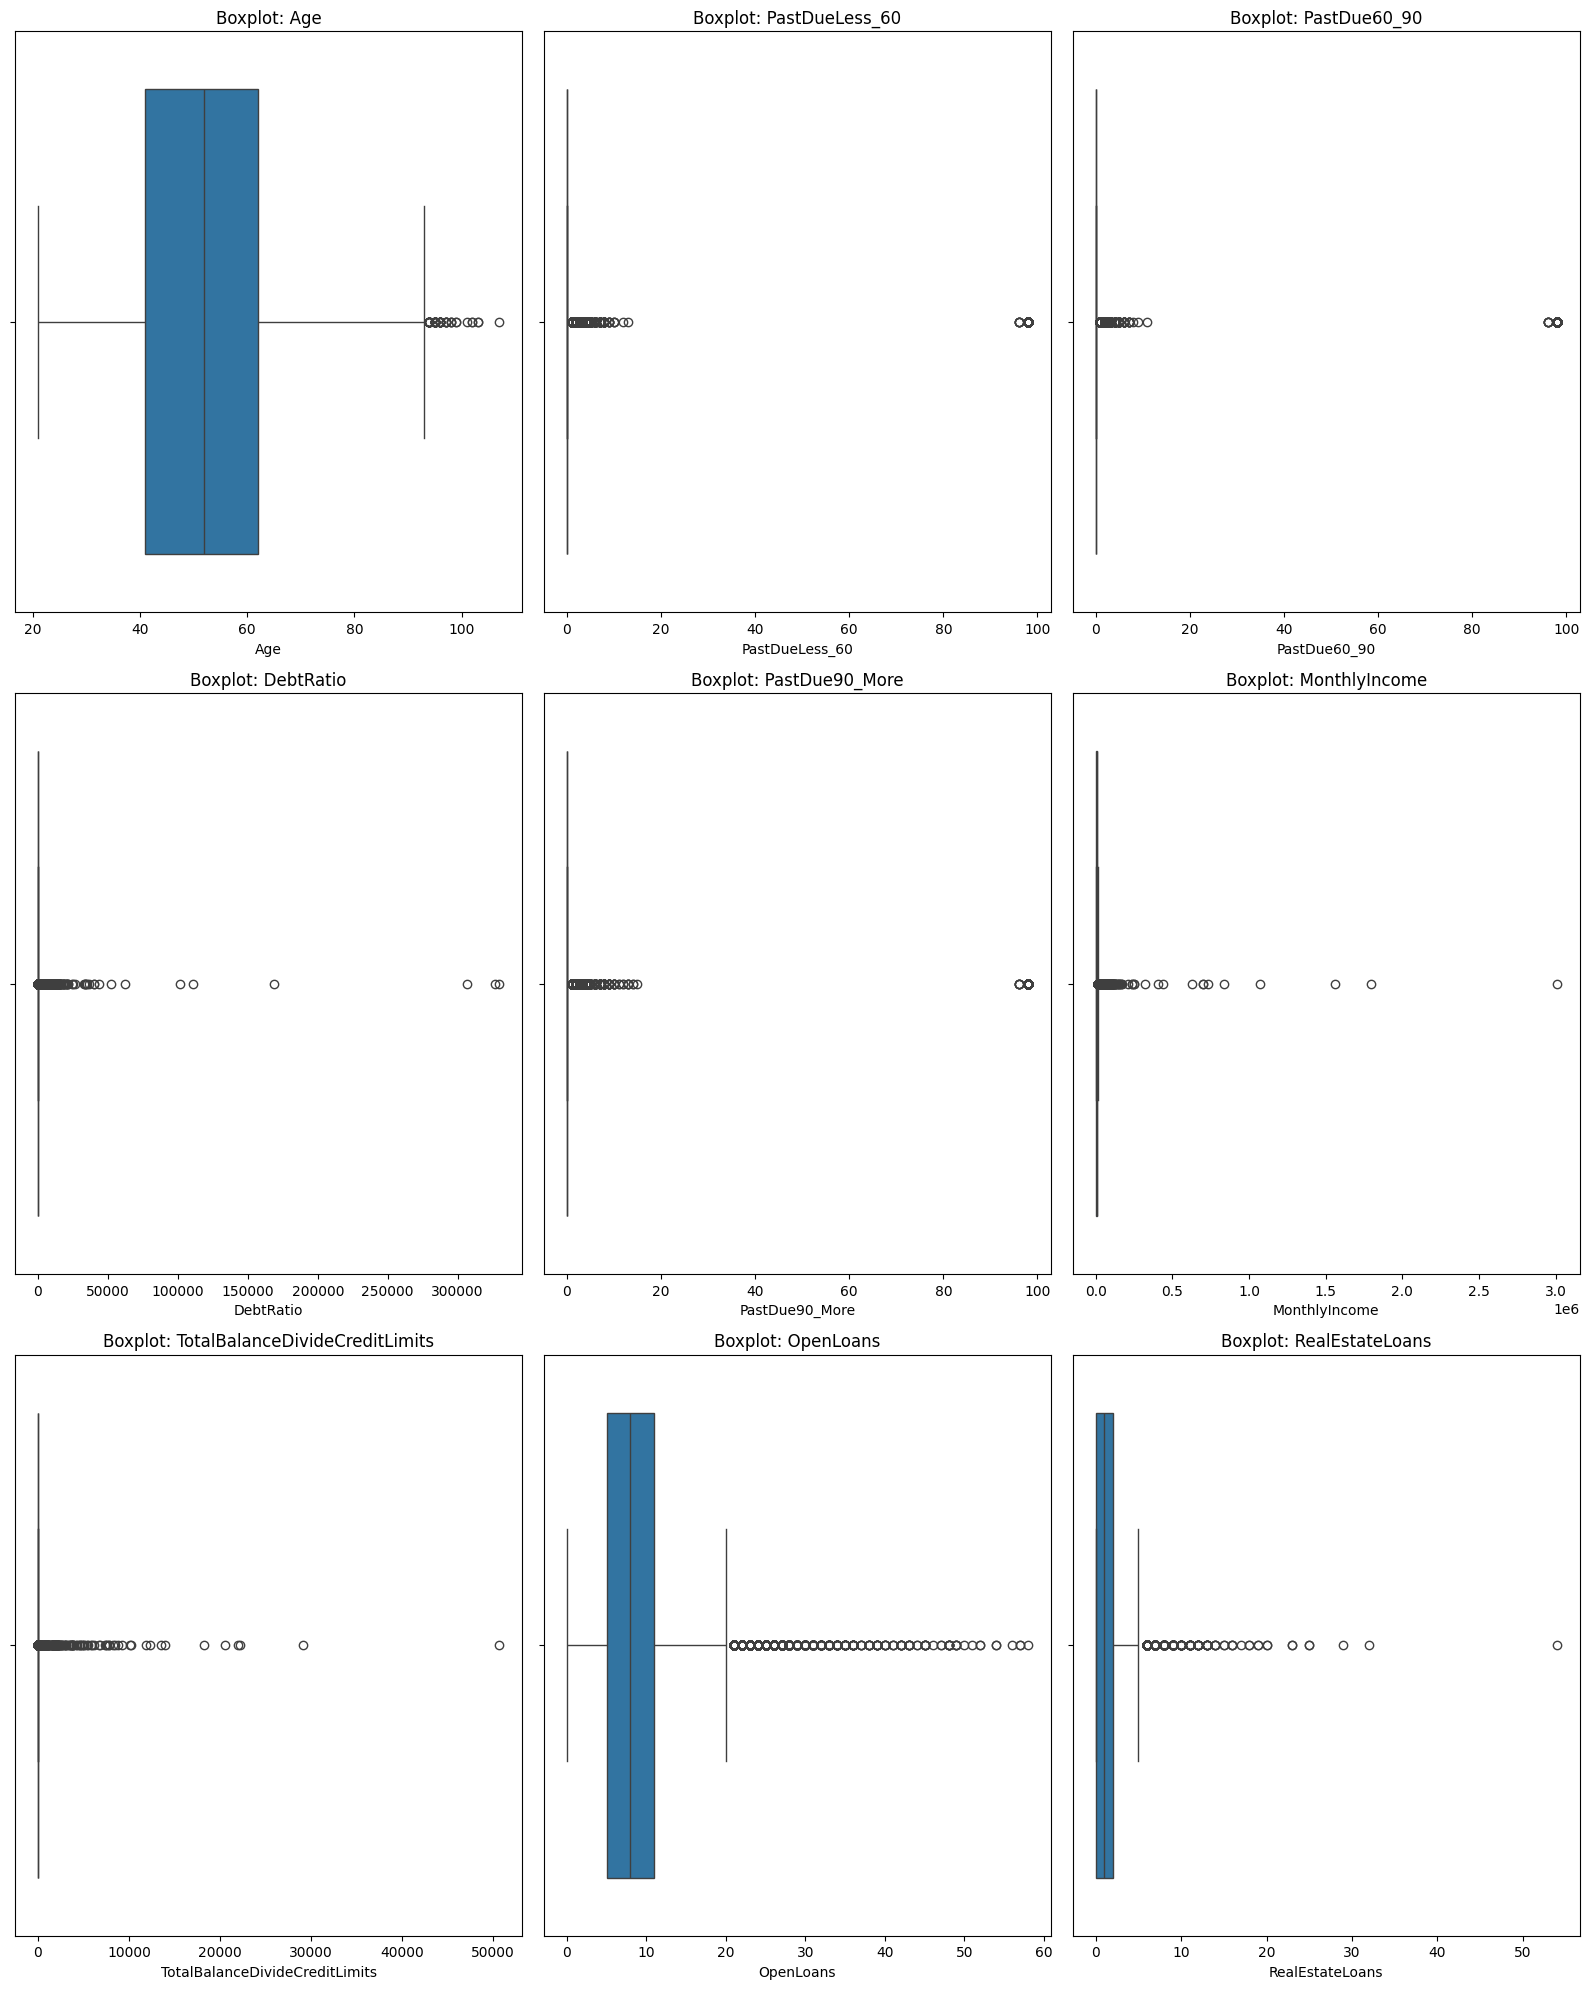

In [ ]:
cols = [
    'Age', 'PastDueLess_60', 'PastDue60_90', 'DebtRatio', 'PastDue90_More',
    'MonthlyIncome', 'TotalBalanceDivideCreditLimits', 'OpenLoans', 'RealEstateLoans'
]

plt.figure(figsize=(16, 20))

for i, col in enumerate(cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data=train_data, x=col)
    plt.title(f'Boxplot: {col}', fontsize=12)
    plt.tight_layout()

plt.show()

Удалим данные по 99 квантилю у непрерывных данных, бинарные данные не будем трогать, так как они могут быть важны

In [ ]:
continuous_cols = ['DebtRatio', 'MonthlyIncome', 'TotalBalanceDivideCreditLimits']
for col in continuous_cols:
    upper_bound = train_data[col].quantile(0.99)
    train_data[col] = train_data[col].clip(upper=upper_bound)


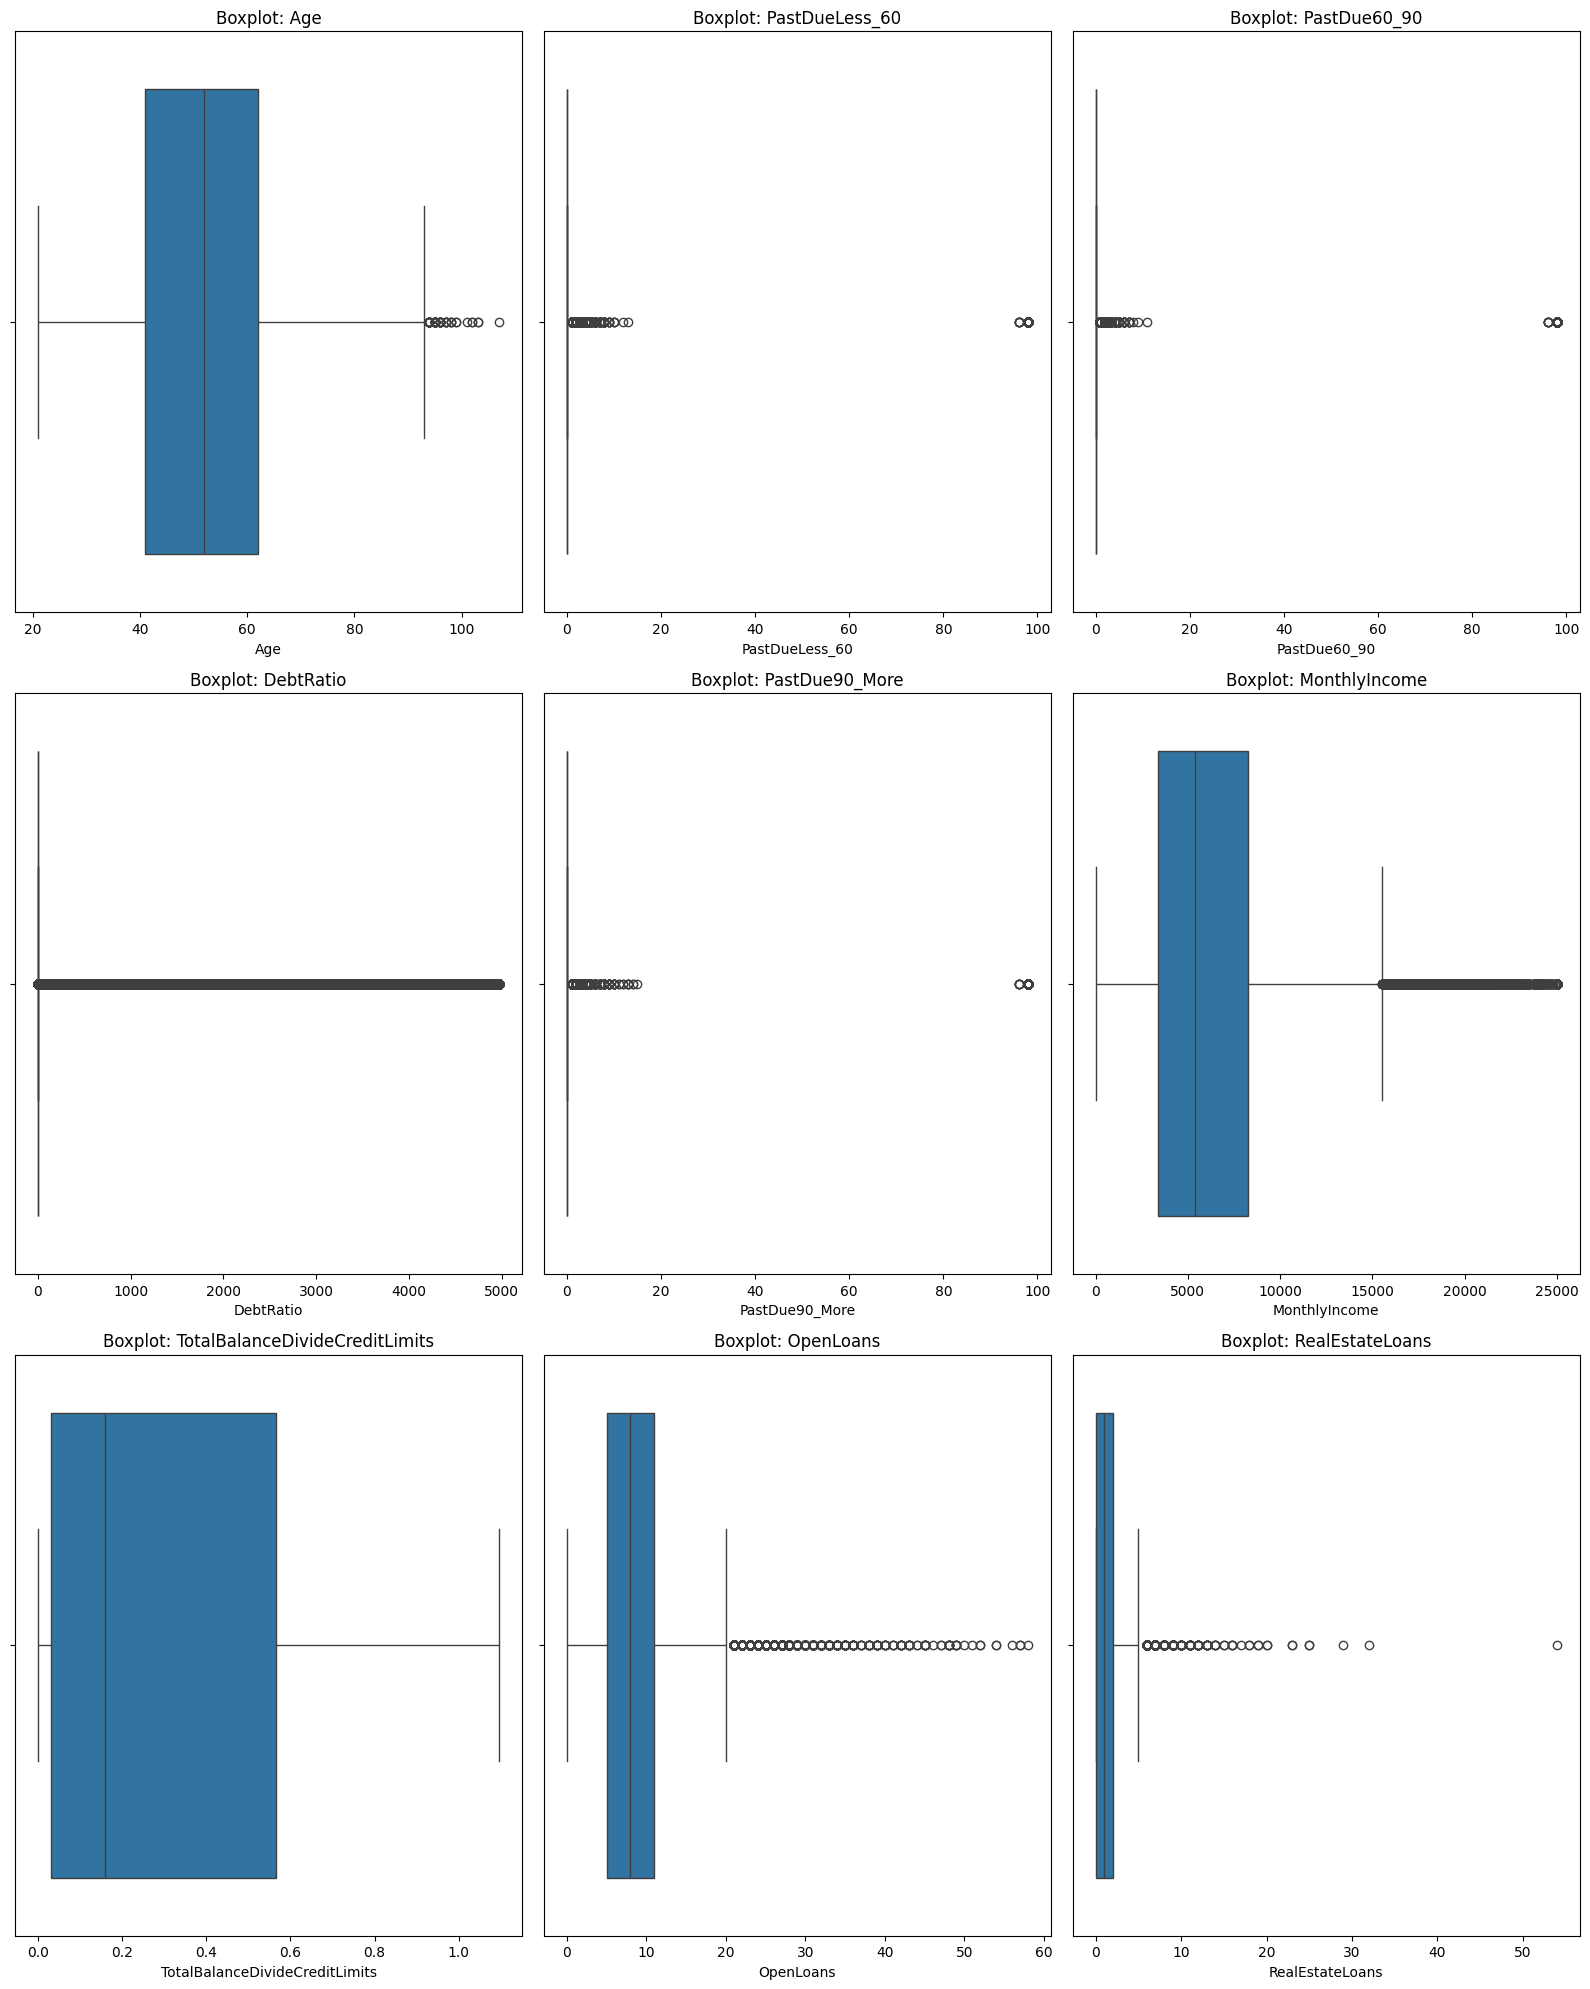

In [ ]:
cols = [
    'Age', 'PastDueLess_60', 'PastDue60_90', 'DebtRatio', 'PastDue90_More',
    'MonthlyIncome', 'TotalBalanceDivideCreditLimits', 'OpenLoans', 'RealEstateLoans'
]

plt.figure(figsize=(16, 20))

for i, col in enumerate(cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data=train_data, x=col)
    plt.title(f'Boxplot: {col}', fontsize=12)
    plt.tight_layout()

plt.show()

Перед заполнением пропусков, для начала посмотрим на распределения переменных MonthlyIncome и FamilySize

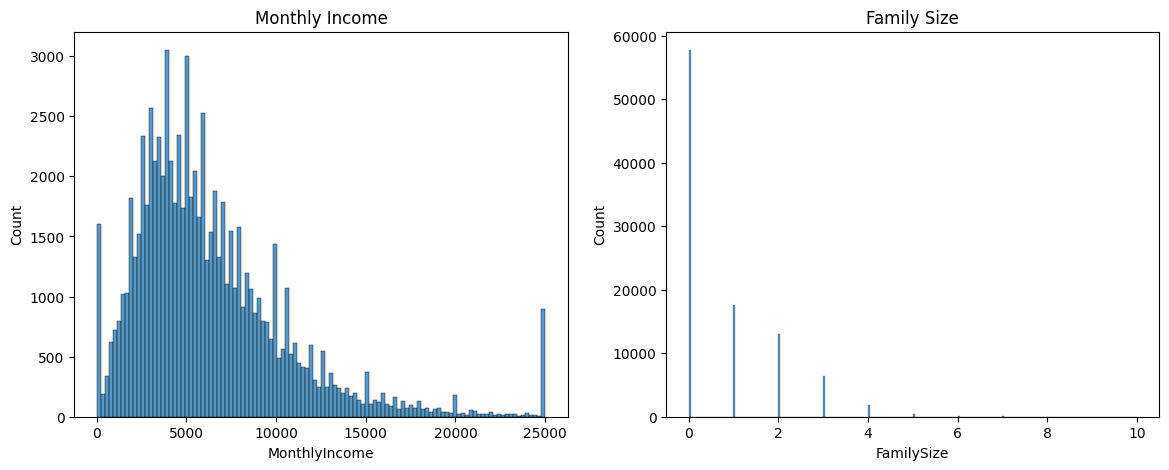

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.histplot(data=train_data, x='MonthlyIncome', ax=axes[0])
axes[0].set_title('Monthly Income')

sns.histplot(data=train_data, x='FamilySize', ax=axes[1])
axes[1].set_title('Family Size');

Хоть и распределение немного смещено, не будем логарифмировать месячный доход

# Feature Engineering

<Axes: >

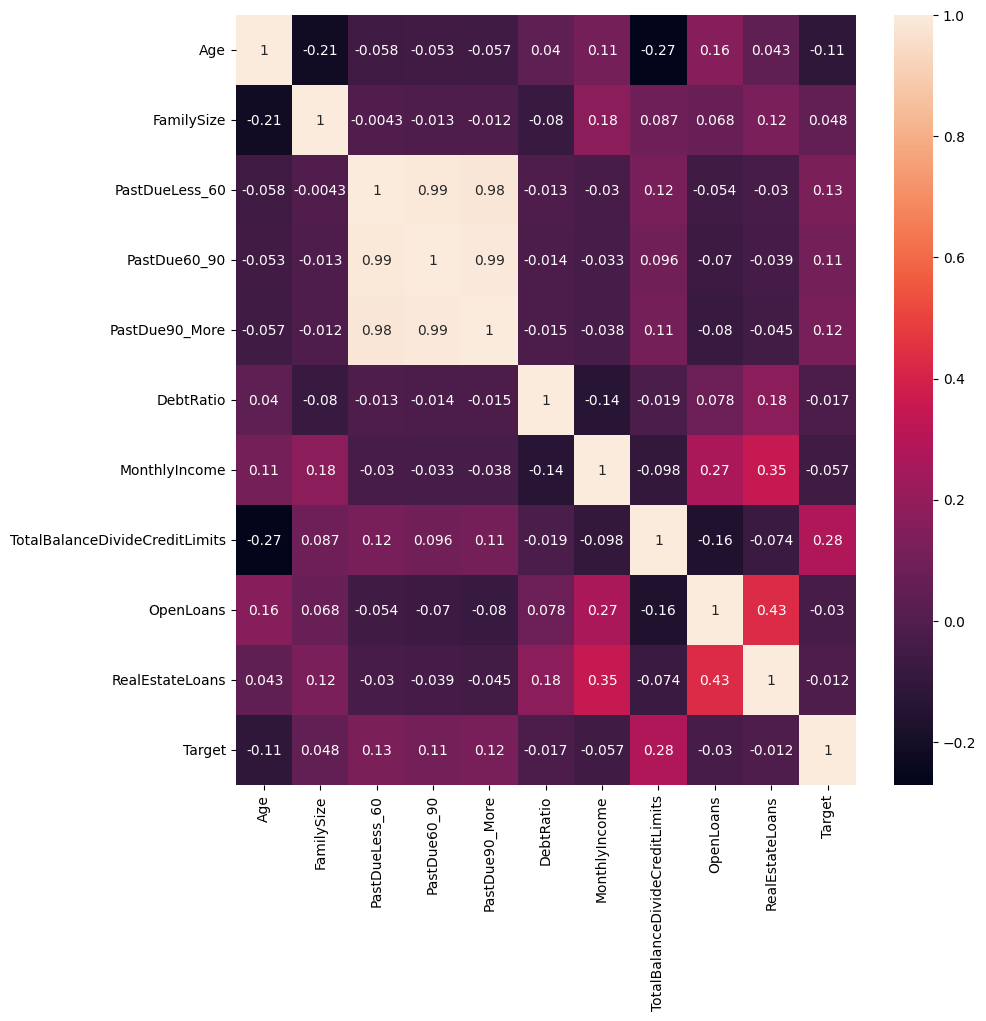

In [ ]:
plt.figure(figsize=(10,10))
correlation_matrix = train_data.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True)

Сильной корреляции не наблюдается, удалять признаки не будем. Заполним пропуски

In [ ]:
for dataset in [train_data, test_data]:
    dataset['MonthlyIncome'] = dataset['MonthlyIncome'].fillna(train_data['MonthlyIncome'].median())
    dataset['FamilySize'] = dataset['FamilySize'].fillna(train_data['FamilySize'].median())
    dataset['DebtRatio'] = dataset['DebtRatio'].fillna(train_data['DebtRatio'].median())

Создадим новые признаки: общее число просрочек и бинарный признак есть ли просрочки

In [ ]:
for dataset in [train_data, test_data]:
    # Соотношение долга к доходу
    dataset['Debt_to_Income'] = dataset['DebtRatio'] * dataset['MonthlyIncome']

    # Общее количество просрочек всех видов
    dataset['TotalPastDue'] = (
        dataset['PastDueLess_60'] + dataset['PastDue60_90'] + dataset['PastDue90_More']
    )

    # Индикатор наличия просрочек вообще
    dataset['HasPastDue'] = (dataset['TotalPastDue'] > 0).astype(int)

    # Среднее количество просрочек на открытую ссуду
    dataset['PastDue_per_Loan'] = dataset['TotalPastDue'] / (dataset['OpenLoans'] + 1)

    # Доход на члена семьи
    dataset['Income_per_FamilyMember'] = dataset['MonthlyIncome'] / (dataset['FamilySize'] + 1)

    # Баланс по кредитным картам на количество открытых кредитов
    dataset['Balance_per_Loan'] = dataset['TotalBalanceDivideCreditLimits'] / (dataset['OpenLoans'] + 1)

    # Наличие недвижимости (факт того, что есть хотя бы один кредит на недвижимость)
    dataset['HasRealEstateLoan'] = (dataset['RealEstateLoans'] > 0).astype(int)

    # Соотношение открытых кредитов к недвижимости
    dataset['OpenLoan_to_RealEstateLoan'] = dataset['OpenLoans'] / (dataset['RealEstateLoans'] + 1)

    # Инверсные признаки для устойчивости
    dataset['Income_inverse'] = 1 / (dataset['MonthlyIncome'] + 1)
    dataset['Age_inverse'] = 1 / (dataset['Age'] + 1)

for col in ['MonthlyIncome', 'Debt_to_Income', 'TotalBalanceDivideCreditLimits',
            'Balance_per_Loan', 'PastDue_per_Loan', 'Income_per_FamilyMember',
            'OpenLoan_to_RealEstateLoan']:
    for dataset in [train_data, test_data]:
        dataset[col] = np.log1p(dataset[col])


(-1.0, 4999.0)

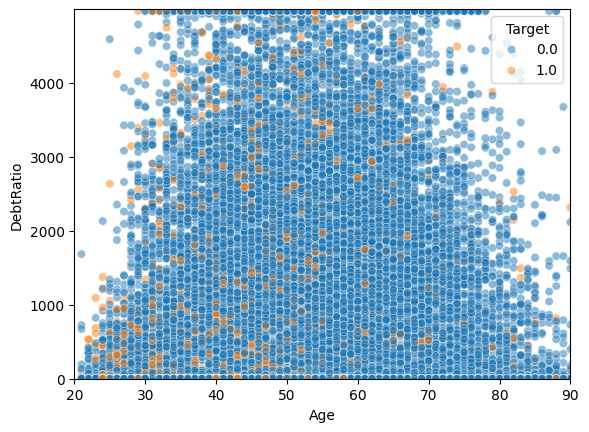

In [ ]:
sns.scatterplot(data=train_data, x='Age', y='DebtRatio', hue = 'Target', alpha=0.5)
plt.xlim(20, 90)
plt.ylim(-1, 4999)

# Построение модели

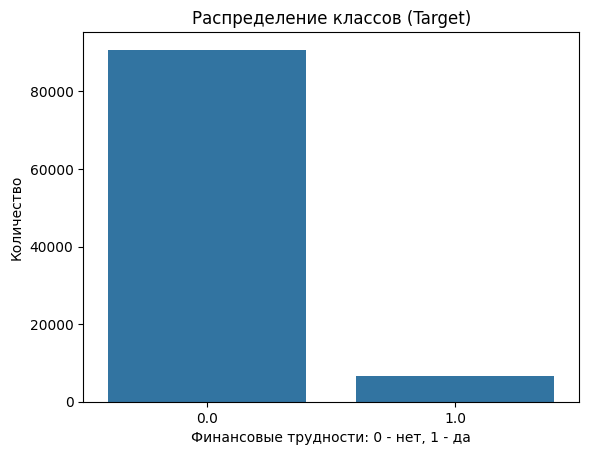

In [ ]:
sns.countplot(x='Target', data=train_data)
plt.title('Распределение классов (Target)')
plt.xlabel('Финансовые трудности: 0 - нет, 1 - да')
plt.ylabel('Количество')
plt.show()

Стоит обратить внимание на то, что классы несбалансированы

Разделим тренировочные данные на тестовую и тренировочную выборку, чтобы узнать точность моделей.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
drop_cols = [
    'PastDueLess_60',
    'PastDue60_90',
    'PastDue90_More',
    'OpenLoans',
    'RealEstateLoans',
    'Income_inverse',
    'Age_inverse'
]

X = train_data.drop(['Target'] + drop_cols, axis=1)
y = train_data['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Обучение моделей

Сделаем пайплайн для наших моделей. Стандартизируем признаки для тех моделей, где это необходимо и подберем лучшие гиперпараметры

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import f1_score, roc_auc_score
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grids = {
    'LogisticRegression': {
        'model__C': [0.01, 0.1, 1, 10],
        'model__solver': ['lbfgs', 'liblinear'],
        'model__max_iter': [100, 200, 300]
    },
    'SVC': {
        'model__C': [0.1, 1, 10],
        'model__kernel': ['linear', 'rbf'],
        'model__gamma': ['scale', 'auto']
    },
    'KNN': {
        'model__n_neighbors': [3, 5, 7, 9],
        'model__weights': ['uniform', 'distance']
    },
    'DecisionTree': {
        'model__max_depth': [None, 5, 10, 20],
        'model__min_samples_split': [2, 5, 10]
    },
    'RandomForest': {
        'model__n_estimators': [50, 100, 200],
        'model__max_depth': [None, 5, 10],
        'model__min_samples_split': [2, 5]
    },
    'AdaBoost': {
        'model__n_estimators': [50, 100, 200],
        'model__learning_rate': [0.5, 1.0, 1.5]
    },
    'GradientBoosting': {
        'model__n_estimators': [50, 100, 200],
        'model__learning_rate': [0.01, 0.1, 0.5],
        'model__max_depth': [3, 5, 10]
    }
}


grid_search_results = {}

for name, pipeline in pipelines.items():
    print(f"=== {name} ===")
    grid = GridSearchCV(
        estimator=pipeline,
        param_grid=param_grids.get(name, {}),
        cv=5,
        scoring='roc_auc',
        n_jobs=-1
    )
    grid.fit(X_train, y_train)
    grid_search_results[name] = grid
    print("Best params:", grid.best_params_)
    print("Best ROC AUC:", grid.best_score_)
    print()

results = {}

for name, grid in grid_search_results.items():
    print(f"Evaluating {name}...")
    best_pipeline = grid.best_estimator_

    best_pipeline.fit(X_train, y_train)

    # Прогнозирование на тестовых данных
    y_pred = best_pipeline.predict(X_test)
    y_prob = best_pipeline.predict_proba(X_test)[:, 1]

    # F1 и ROC AUC
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob)

    # Сохранение
    results[name] = {'F1 Score': f1, 'ROC AUC': roc_auc}

results_df = pd.DataFrame(results).T
print("Final Evaluation Results:")
print(results_df)

Так как наилучший результат показал градиентный бустинг используем другие более расишренные библиотеки для построения модели и подбора гиперпараметров

In [ ]:
import optuna
import lightgbm as lgb
from sklearn.metrics import roc_auc_score, f1_score
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Определим функцию для оптимизации гиперпараметров с использованием Optuna
def objective(trial):
    param = {
        'objective': 'binary',
        'metric': 'auc',
        'boosting_type': trial.suggest_categorical('boosting_type', ['gbdt', 'dart']),
        'num_leaves': trial.suggest_int('num_leaves', 31, 256),
        'max_depth': trial.suggest_int('max_depth', -1, 15),
        'learning_rate': trial.suggest_float('learning_rate', 1e-5, 0.1, log=True),
        'n_estimators': trial.suggest_int('n_estimators', 50, 1000),
        'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),
        'min_child_samples': trial.suggest_int('min_child_samples', 5, 100),
        'lambda_l1': trial.suggest_float('lambda_l1', 1e-5, 10, log=True),
        'lambda_l2': trial.suggest_float('lambda_l2', 1e-5, 10, log=True),
        'class_weight': trial.suggest_categorical('class_weight', [None, 'balanced'])
    }



    model = lgb.LGBMClassifier(**param)

    # Обучаем модель
    model.fit(X_train, y_train)

    # Предсказания на тестовых данных
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    # Метрики
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob)

    # Оптимизируем модель по ROC AUC
    return roc_auc

# Запуск оптимизации
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=250)

print("Best hyperparameters:", study.best_params)

# Лучшие параметры
best_params = study.best_params
# Строим модель с лучшими гиперпараметрами
best_model = lgb.LGBMClassifier(**best_params)
# Обучаем финальную модель на всех данных
best_model.fit(X, y)

# Оценка модели на тестовых данных
y_pred_final = best_model.predict(X_test)
y_prob_final = best_model.predict_proba(X_test)[:, 1]
final_f1 = f1_score(y_test, y_pred_final)
final_roc_auc = roc_auc_score(y_test, y_prob_final)

print("Final F1 Score:", final_f1)
print("Final ROC AUC:", final_roc_auc)


[I 2025-04-27 15:55:40,193] A new study created in memory with name: no-name-7dfbf6fb-97fd-4e81-a09f-4f320652aa9d
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),


[LightGBM] [Warning] lambda_l1 is set=0.007846450684177128, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.007846450684177128
[LightGBM] [Warning] lambda_l2 is set=0.009512444177674214, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.009512444177674214
[LightGBM] [Warning] lambda_l1 is set=0.007846450684177128, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.007846450684177128
[LightGBM] [Warning] lambda_l2 is set=0.009512444177674214, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.009512444177674214
[LightGBM] [Info] Number of positive: 4628, number of negative: 63500
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002628 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1985
[LightGBM] [Info] Number of data points in the train set: 68128, number of used features: 15
[LightGBM] [Info] [binary:B

[I 2025-04-27 15:55:42,175] Trial 0 finished with value: 0.8478455921567472 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 99, 'max_depth': 13, 'learning_rate': 0.000250845488257259, 'n_estimators': 290, 'subsample': 0.9956093634620207, 'colsample_bytree': 0.5908365497788621, 'min_child_samples': 90, 'lambda_l1': 0.007846450684177128, 'lambda_l2': 0.009512444177674214, 'class_weight': None}. Best is trial 0 with value: 0.8478455921567472.
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use 

[LightGBM] [Warning] lambda_l1 is set=1.2172925965060751e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.2172925965060751e-05
[LightGBM] [Warning] lambda_l2 is set=0.08760833369036908, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.08760833369036908
[LightGBM] [Warning] lambda_l1 is set=1.2172925965060751e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.2172925965060751e-05
[LightGBM] [Warning] lambda_l2 is set=0.08760833369036908, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.08760833369036908
[LightGBM] [Info] Number of positive: 4628, number of negative: 63500
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001879 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1985
[LightGBM] [Info] Number of data points in the train set: 68128, number of used features: 15
[LightGBM] [Info] [bina

[I 2025-04-27 15:56:26,043] Trial 1 finished with value: 0.8490851453548462 and parameters: {'boosting_type': 'dart', 'num_leaves': 174, 'max_depth': 0, 'learning_rate': 0.00914137550786202, 'n_estimators': 871, 'subsample': 0.921050081328809, 'colsample_bytree': 0.5563335495544686, 'min_child_samples': 26, 'lambda_l1': 1.2172925965060751e-05, 'lambda_l2': 0.08760833369036908, 'class_weight': 'balanced'}. Best is trial 1 with value: 0.8490851453548462.
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0.

[LightGBM] [Warning] lambda_l1 is set=8.139178487916324e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=8.139178487916324e-05
[LightGBM] [Warning] lambda_l2 is set=7.264001257733136, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7.264001257733136
[LightGBM] [Warning] lambda_l1 is set=8.139178487916324e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=8.139178487916324e-05
[LightGBM] [Warning] lambda_l2 is set=7.264001257733136, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7.264001257733136
[LightGBM] [Info] Number of positive: 4628, number of negative: 63500
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002246 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1985
[LightGBM] [Info] Number of data points in the train set: 68128, number of used features: 15
[LightGBM] [Info] [binary:BoostFrom

[I 2025-04-27 15:56:27,353] Trial 2 finished with value: 0.8502900692696085 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 101, 'max_depth': 0, 'learning_rate': 0.037793417415021395, 'n_estimators': 192, 'subsample': 0.9019222842428679, 'colsample_bytree': 0.8584047605714339, 'min_child_samples': 16, 'lambda_l1': 8.139178487916324e-05, 'lambda_l2': 7.264001257733136, 'class_weight': None}. Best is trial 2 with value: 0.8502900692696085.
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use su

[LightGBM] [Warning] lambda_l1 is set=0.1512809792434189, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1512809792434189
[LightGBM] [Warning] lambda_l2 is set=0.01598170770934753, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.01598170770934753
[LightGBM] [Warning] lambda_l1 is set=0.1512809792434189, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1512809792434189
[LightGBM] [Warning] lambda_l2 is set=0.01598170770934753, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.01598170770934753
[LightGBM] [Info] Number of positive: 4628, number of negative: 63500
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002236 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1985
[LightGBM] [Info] Number of data points in the train set: 68128, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScor

[I 2025-04-27 15:56:31,837] Trial 3 finished with value: 0.8097593106796519 and parameters: {'boosting_type': 'dart', 'num_leaves': 59, 'max_depth': 1, 'learning_rate': 0.00010800151548226608, 'n_estimators': 765, 'subsample': 0.5309512031149394, 'colsample_bytree': 0.5831087214740994, 'min_child_samples': 25, 'lambda_l1': 0.1512809792434189, 'lambda_l2': 0.01598170770934753, 'class_weight': 'balanced'}. Best is trial 2 with value: 0.8502900692696085.
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. 

[LightGBM] [Warning] lambda_l1 is set=0.016857904270254204, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.016857904270254204
[LightGBM] [Warning] lambda_l2 is set=0.001417224765375439, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.001417224765375439
[LightGBM] [Warning] lambda_l1 is set=0.016857904270254204, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.016857904270254204
[LightGBM] [Warning] lambda_l2 is set=0.001417224765375439, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.001417224765375439
[LightGBM] [Info] Number of positive: 4628, number of negative: 63500
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002399 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1985
[LightGBM] [Info] Number of data points in the train set: 68128, number of used features: 15
[LightGBM] [Info] [binary:B

[I 2025-04-27 15:56:35,272] Trial 4 finished with value: 0.8402041429568397 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 47, 'max_depth': 9, 'learning_rate': 0.00012810734042255868, 'n_estimators': 818, 'subsample': 0.5098724379726121, 'colsample_bytree': 0.9767947500338492, 'min_child_samples': 67, 'lambda_l1': 0.016857904270254204, 'lambda_l2': 0.001417224765375439, 'class_weight': 'balanced'}. Best is trial 2 with value: 0.8502900692696085.
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.

[LightGBM] [Warning] lambda_l1 is set=1.2462467697690679e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.2462467697690679e-05
[LightGBM] [Warning] lambda_l2 is set=0.00021575833612603597, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00021575833612603597
[LightGBM] [Warning] lambda_l1 is set=1.2462467697690679e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.2462467697690679e-05
[LightGBM] [Warning] lambda_l2 is set=0.00021575833612603597, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00021575833612603597
[LightGBM] [Info] Number of positive: 4628, number of negative: 63500
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002406 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1985
[LightGBM] [Info] Number of data points in the train set: 68128, number of used features: 15
[LightGBM] 

[I 2025-04-27 15:56:38,110] Trial 5 finished with value: 0.8431007806571293 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 210, 'max_depth': 7, 'learning_rate': 0.0005771500978168928, 'n_estimators': 498, 'subsample': 0.9660282370435157, 'colsample_bytree': 0.9257969127820618, 'min_child_samples': 49, 'lambda_l1': 1.2462467697690679e-05, 'lambda_l2': 0.00021575833612603597, 'class_weight': None}. Best is trial 2 with value: 0.8502900692696085.
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0.

[LightGBM] [Warning] lambda_l1 is set=0.06541327304167421, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.06541327304167421
[LightGBM] [Warning] lambda_l2 is set=0.012083069659518528, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.012083069659518528
[LightGBM] [Warning] lambda_l1 is set=0.06541327304167421, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.06541327304167421
[LightGBM] [Warning] lambda_l2 is set=0.012083069659518528, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.012083069659518528
[LightGBM] [Info] Number of positive: 4628, number of negative: 63500
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002069 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1985
[LightGBM] [Info] Number of data points in the train set: 68128, number of used features: 15
[LightGBM] [Info] [binary:Boost

[I 2025-04-27 15:57:19,306] Trial 6 finished with value: 0.8489517207631663 and parameters: {'boosting_type': 'dart', 'num_leaves': 175, 'max_depth': 0, 'learning_rate': 0.005382947345272034, 'n_estimators': 972, 'subsample': 0.8539197102385114, 'colsample_bytree': 0.5950949709569533, 'min_child_samples': 18, 'lambda_l1': 0.06541327304167421, 'lambda_l2': 0.012083069659518528, 'class_weight': None}. Best is trial 2 with value: 0.8502900692696085.
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use s

[LightGBM] [Warning] lambda_l1 is set=0.00022260825950694665, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00022260825950694665
[LightGBM] [Warning] lambda_l2 is set=0.02393390823222586, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.02393390823222586
[LightGBM] [Warning] lambda_l1 is set=0.00022260825950694665, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00022260825950694665
[LightGBM] [Warning] lambda_l2 is set=0.02393390823222586, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.02393390823222586
[LightGBM] [Info] Number of positive: 4628, number of negative: 63500
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002302 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1985
[LightGBM] [Info] Number of data points in the train set: 68128, number of used features: 15
[LightGBM] [Info] [bina

[I 2025-04-27 15:57:20,306] Trial 7 finished with value: 0.8376735209802627 and parameters: {'boosting_type': 'dart', 'num_leaves': 238, 'max_depth': 13, 'learning_rate': 1.0643982041179737e-05, 'n_estimators': 61, 'subsample': 0.5103940629119137, 'colsample_bytree': 0.9558296277241456, 'min_child_samples': 43, 'lambda_l1': 0.00022260825950694665, 'lambda_l2': 0.02393390823222586, 'class_weight': 'balanced'}. Best is trial 2 with value: 0.8502900692696085.


[LightGBM] [Warning] lambda_l1 is set=0.00022260825950694665, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00022260825950694665
[LightGBM] [Warning] lambda_l2 is set=0.02393390823222586, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.02393390823222586
[LightGBM] [Warning] lambda_l1 is set=0.00022260825950694665, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00022260825950694665
[LightGBM] [Warning] lambda_l2 is set=0.02393390823222586, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.02393390823222586
[LightGBM] [Warning] lambda_l1 is set=0.0025114547171553006, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0025114547171553006
[LightGBM] [Warning] lambda_l2 is set=0.035081503763964364, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.035081503763964364
[LightGBM] [Warning] lambda_l1 is set=0.0025114547171553006, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0025114547171553006
[LightGBM] [Warning] lambda_l2

C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-04-27 15:57:22,554] Trial 8 finished with value: 0.8500372031586019 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 223, 'max_depth': 8, 'learning_rate': 0.01039609992120398, 'n_estimators': 316, 'subsample': 0.8370207811420856, 'colsample_bytree': 0.7088307040916353, 'min_child_samples': 60, 'lambda_l1': 0.0025114547171553006, 'lambda_l2': 0.035081503763964364, 'class_weight': 'balanced'}. Best is trial 2 with value: 0.8502900692696085.
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0

[LightGBM] [Warning] lambda_l1 is set=5.317419198451728, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.317419198451728
[LightGBM] [Warning] lambda_l2 is set=0.0011444555019537407, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0011444555019537407
[LightGBM] [Warning] lambda_l1 is set=5.317419198451728, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.317419198451728
[LightGBM] [Warning] lambda_l2 is set=0.0011444555019537407, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0011444555019537407
[LightGBM] [Info] Number of positive: 4628, number of negative: 63500
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002296 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1985
[LightGBM] [Info] Number of data points in the train set: 68128, number of used features: 15
[LightGBM] [Info] [binary:BoostFrom

[I 2025-04-27 15:57:31,322] Trial 9 finished with value: 0.8488287477803657 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 176, 'max_depth': 0, 'learning_rate': 4.047192601442037e-05, 'n_estimators': 865, 'subsample': 0.5472570634601601, 'colsample_bytree': 0.5935334581062625, 'min_child_samples': 5, 'lambda_l1': 5.317419198451728, 'lambda_l2': 0.0011444555019537407, 'class_weight': 'balanced'}. Best is trial 2 with value: 0.8502900692696085.
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. 

[LightGBM] [Warning] lambda_l1 is set=0.0002649786784732621, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0002649786784732621
[LightGBM] [Warning] lambda_l2 is set=5.797525532639659, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.797525532639659
[LightGBM] [Warning] lambda_l1 is set=0.0002649786784732621, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0002649786784732621
[LightGBM] [Warning] lambda_l2 is set=5.797525532639659, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.797525532639659
[LightGBM] [Info] Number of positive: 4628, number of negative: 63500
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002104 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1985
[LightGBM] [Info] Number of data points in the train set: 68128, number of used features: 15
[LightGBM] [Info] [binary:BoostFrom

[I 2025-04-27 15:57:31,598] Trial 10 finished with value: 0.8520140612024132 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 109, 'max_depth': 4, 'learning_rate': 0.08541745777225261, 'n_estimators': 61, 'subsample': 0.6873466198077438, 'colsample_bytree': 0.8344428486500859, 'min_child_samples': 5, 'lambda_l1': 0.0002649786784732621, 'lambda_l2': 5.797525532639659, 'class_weight': None}. Best is trial 10 with value: 0.8520140612024132.
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use sug

[LightGBM] [Warning] lambda_l1 is set=0.00028965014346393926, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00028965014346393926
[LightGBM] [Warning] lambda_l2 is set=6.573590146567941, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6.573590146567941
[LightGBM] [Warning] lambda_l1 is set=0.00028965014346393926, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00028965014346393926
[LightGBM] [Warning] lambda_l2 is set=6.573590146567941, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6.573590146567941
[LightGBM] [Info] Number of positive: 4628, number of negative: 63500
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002154 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1985
[LightGBM] [Info] Number of data points in the train set: 68128, number of used features: 15
[LightGBM] [Info] [binary:Boost

[I 2025-04-27 15:57:31,867] Trial 11 finished with value: 0.8522054170250959 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 103, 'max_depth': 4, 'learning_rate': 0.0853184095917226, 'n_estimators': 60, 'subsample': 0.7154693676687344, 'colsample_bytree': 0.8425082803300343, 'min_child_samples': 5, 'lambda_l1': 0.00028965014346393926, 'lambda_l2': 6.573590146567941, 'class_weight': None}. Best is trial 11 with value: 0.8522054170250959.
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use sug

[LightGBM] [Warning] lambda_l1 is set=0.0004831738481635815, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0004831738481635815
[LightGBM] [Warning] lambda_l2 is set=5.93377713690898, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.93377713690898
[LightGBM] [Warning] lambda_l1 is set=0.0004831738481635815, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0004831738481635815
[LightGBM] [Warning] lambda_l2 is set=5.93377713690898, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.93377713690898
[LightGBM] [Info] Number of positive: 4628, number of negative: 63500
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002140 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1985
[LightGBM] [Info] Number of data points in the train set: 68128, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScor

[I 2025-04-27 15:57:32,137] Trial 12 finished with value: 0.8523223170329737 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 113, 'max_depth': 4, 'learning_rate': 0.09053610114958714, 'n_estimators': 59, 'subsample': 0.6755512328155642, 'colsample_bytree': 0.7821486479216601, 'min_child_samples': 7, 'lambda_l1': 0.0004831738481635815, 'lambda_l2': 5.93377713690898, 'class_weight': None}. Best is trial 12 with value: 0.8523223170329737.
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use sugg

[LightGBM] [Warning] lambda_l1 is set=0.0011197162096490984, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0011197162096490984
[LightGBM] [Warning] lambda_l2 is set=0.7717759854170605, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.7717759854170605
[LightGBM] [Warning] lambda_l1 is set=0.0011197162096490984, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0011197162096490984
[LightGBM] [Warning] lambda_l2 is set=0.7717759854170605, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.7717759854170605
[LightGBM] [Info] Number of positive: 4628, number of negative: 63500
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006060 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1985
[LightGBM] [Info] Number of data points in the train set: 68128, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.067931 -> initscore=-2.618915
[LightGBM] [Inf

[I 2025-04-27 15:57:33,360] Trial 13 finished with value: 0.8496987918663562 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 127, 'max_depth': 4, 'learning_rate': 0.09863436512153173, 'n_estimators': 510, 'subsample': 0.6813873217252222, 'colsample_bytree': 0.7337286974523574, 'min_child_samples': 36, 'lambda_l1': 0.0011197162096490984, 'lambda_l2': 0.7717759854170605, 'class_weight': None}. Best is trial 12 with value: 0.8523223170329737.
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use 

[LightGBM] [Warning] lambda_l1 is set=0.001050132731629929, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.001050132731629929
[LightGBM] [Warning] lambda_l2 is set=0.6389349589065743, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.6389349589065743
[LightGBM] [Warning] lambda_l1 is set=0.001050132731629929, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.001050132731629929
[LightGBM] [Warning] lambda_l2 is set=0.6389349589065743, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.6389349589065743
[LightGBM] [Info] Number of positive: 4628, number of negative: 63500
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002271 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1985
[LightGBM] [Info] Number of data points in the train set: 68128, number of used features: 15
[LightGBM] [Info] [binary:BoostFrom

[I 2025-04-27 15:57:33,929] Trial 14 finished with value: 0.8393571818868175 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 71, 'max_depth': 4, 'learning_rate': 0.0017919454026483685, 'n_estimators': 212, 'subsample': 0.7363855696616649, 'colsample_bytree': 0.8003967483976829, 'min_child_samples': 75, 'lambda_l1': 0.001050132731629929, 'lambda_l2': 0.6389349589065743, 'class_weight': None}. Best is trial 12 with value: 0.8523223170329737.


[LightGBM] [Warning] lambda_l1 is set=0.001050132731629929, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.001050132731629929
[LightGBM] [Warning] lambda_l2 is set=0.6389349589065743, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.6389349589065743
[LightGBM] [Warning] lambda_l1 is set=9.196010675991508e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=9.196010675991508e-05
[LightGBM] [Warning] lambda_l2 is set=0.6138517131343044, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.6138517131343044
[LightGBM] [Warning] lambda_l1 is set=9.196010675991508e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=9.196010675991508e-05
[LightGBM] [Warning] lambda_l2 is set=0.6138517131343044, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.6138517131343044
[LightGBM] [Info] Number of positive: 4628, number of negative: 63500
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006384 seconds.
You can s

C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-04-27 15:57:35,440] Trial 15 finished with value: 0.8529807779111549 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 144, 'max_depth': 6, 'learning_rate': 0.023147435820240824, 'n_estimators': 399, 'subsample': 0.6298197331528663, 'colsample_bytree': 0.666012630838131, 'min_child_samples': 35, 'lambda_l1': 9.196010675991508e-05, 'lambda_l2': 0.6138517131343044, 'class_weight': None}. Best is trial 15 with value: 0.8529807779111549.


[LightGBM] [Warning] lambda_l1 is set=9.196010675991508e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=9.196010675991508e-05
[LightGBM] [Warning] lambda_l2 is set=0.6138517131343044, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.6138517131343044


C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),


[LightGBM] [Warning] lambda_l1 is set=5.731540383367604e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.731540383367604e-05
[LightGBM] [Warning] lambda_l2 is set=0.44780515367749957, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.44780515367749957
[LightGBM] [Warning] lambda_l1 is set=5.731540383367604e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.731540383367604e-05
[LightGBM] [Warning] lambda_l2 is set=0.44780515367749957, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.44780515367749957
[LightGBM] [Info] Number of positive: 4628, number of negative: 63500
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005673 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1985
[LightGBM] [Info] Number of data points in the train set: 68128, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.067931 -> initscore=-2.618915
[LightGBM] 

[I 2025-04-27 15:57:39,456] Trial 16 finished with value: 0.8453068506698111 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 147, 'max_depth': 10, 'learning_rate': 0.022128943123003144, 'n_estimators': 640, 'subsample': 0.6101858790091454, 'colsample_bytree': 0.6613524464596194, 'min_child_samples': 35, 'lambda_l1': 5.731540383367604e-05, 'lambda_l2': 0.44780515367749957, 'class_weight': None}. Best is trial 15 with value: 0.8529807779111549.
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. U

[LightGBM] [Warning] lambda_l1 is set=1.7051009171006009, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.7051009171006009
[LightGBM] [Warning] lambda_l2 is set=1.443003544511231e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.443003544511231e-05
[LightGBM] [Warning] lambda_l1 is set=1.7051009171006009, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.7051009171006009
[LightGBM] [Warning] lambda_l2 is set=1.443003544511231e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.443003544511231e-05
[LightGBM] [Info] Number of positive: 4628, number of negative: 63500
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006694 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1985
[LightGBM] [Info] Number of data points in the train set: 68128, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.067931 -> initscore=-2.618915
[LightGBM] [Inf

[I 2025-04-27 15:57:41,362] Trial 17 finished with value: 0.8496313799409599 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 146, 'max_depth': 7, 'learning_rate': 0.0021760560287937035, 'n_estimators': 405, 'subsample': 0.6171677837118774, 'colsample_bytree': 0.6688052794586552, 'min_child_samples': 100, 'lambda_l1': 1.7051009171006009, 'lambda_l2': 1.443003544511231e-05, 'class_weight': None}. Best is trial 15 with value: 0.8529807779111549.
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. U

[LightGBM] [Warning] lambda_l1 is set=4.7474095901982834e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.7474095901982834e-05
[LightGBM] [Warning] lambda_l2 is set=1.6271920155927682, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.6271920155927682
[LightGBM] [Warning] lambda_l1 is set=4.7474095901982834e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.7474095901982834e-05
[LightGBM] [Warning] lambda_l2 is set=1.6271920155927682, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.6271920155927682
[LightGBM] [Info] Number of positive: 4628, number of negative: 63500
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005956 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1985
[LightGBM] [Info] Number of data points in the train set: 68128, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.067931 -> initscore=-2.618915
[LightGBM] 

[I 2025-04-27 15:57:47,599] Trial 18 finished with value: 0.8437797354459824 and parameters: {'boosting_type': 'dart', 'num_leaves': 73, 'max_depth': 2, 'learning_rate': 0.02719807215514931, 'n_estimators': 635, 'subsample': 0.80240093674024, 'colsample_bytree': 0.7797121077950716, 'min_child_samples': 32, 'lambda_l1': 4.7474095901982834e-05, 'lambda_l2': 1.6271920155927682, 'class_weight': None}. Best is trial 15 with value: 0.8529807779111549.


[LightGBM] [Warning] lambda_l1 is set=4.7474095901982834e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.7474095901982834e-05
[LightGBM] [Warning] lambda_l2 is set=1.6271920155927682, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.6271920155927682
[LightGBM] [Warning] lambda_l1 is set=0.004404290616529301, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.004404290616529301
[LightGBM] [Warning] lambda_l2 is set=0.1133708014776113, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1133708014776113


C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),


[LightGBM] [Warning] lambda_l1 is set=0.004404290616529301, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.004404290616529301
[LightGBM] [Warning] lambda_l2 is set=0.1133708014776113, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1133708014776113
[LightGBM] [Info] Number of positive: 4628, number of negative: 63500
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002112 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1985
[LightGBM] [Info] Number of data points in the train set: 68128, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.067931 -> initscore=-2.618915
[LightGBM] [Info] Start training from score -2.618915
[LightGBM] [Warning] lambda_l1 is set=0.004404290616529301, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.004404290616529301
[LightGBM] [Warning] lambda_l2 is s

[I 2025-04-27 15:57:49,123] Trial 19 finished with value: 0.8503296673506093 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 31, 'max_depth': 15, 'learning_rate': 0.0051390484905364355, 'n_estimators': 401, 'subsample': 0.6274489411008545, 'colsample_bytree': 0.5187724064640609, 'min_child_samples': 18, 'lambda_l1': 0.004404290616529301, 'lambda_l2': 0.1133708014776113, 'class_weight': None}. Best is trial 15 with value: 0.8529807779111549.
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use

[LightGBM] [Warning] lambda_l1 is set=0.03253024998244627, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.03253024998244627
[LightGBM] [Warning] lambda_l2 is set=1.900904212256701, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.900904212256701
[LightGBM] [Warning] lambda_l1 is set=0.03253024998244627, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.03253024998244627
[LightGBM] [Warning] lambda_l2 is set=1.900904212256701, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.900904212256701
[LightGBM] [Info] Number of positive: 4628, number of negative: 63500
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005889 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1985
[LightGBM] [Info] Number of data points in the train set: 68128, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.067931 -> initscore=-2.618915
[LightGBM] [Info] Start tra

[I 2025-04-27 15:57:51,357] Trial 20 finished with value: 0.851291519968151 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 200, 'max_depth': 6, 'learning_rate': 0.03272915681028269, 'n_estimators': 644, 'subsample': 0.7905931763712117, 'colsample_bytree': 0.6583038037701806, 'min_child_samples': 55, 'lambda_l1': 0.03253024998244627, 'lambda_l2': 1.900904212256701, 'class_weight': None}. Best is trial 15 with value: 0.8529807779111549.
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use sugg

[LightGBM] [Warning] lambda_l1 is set=0.0003928478369503784, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0003928478369503784
[LightGBM] [Warning] lambda_l2 is set=9.091287362747156, reg_lambda=0.0 will be ignored. Current value: lambda_l2=9.091287362747156
[LightGBM] [Warning] lambda_l1 is set=0.0003928478369503784, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0003928478369503784
[LightGBM] [Warning] lambda_l2 is set=9.091287362747156, reg_lambda=0.0 will be ignored. Current value: lambda_l2=9.091287362747156
[LightGBM] [Info] Number of positive: 4628, number of negative: 63500
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001647 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1985
[LightGBM] [Info] Number of data points in the train set: 68128, number of used features: 15
[LightGBM] [Info] [binary:BoostFrom

[I 2025-04-27 15:57:51,936] Trial 21 finished with value: 0.8536260838499264 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 125, 'max_depth': 5, 'learning_rate': 0.06707112059480826, 'n_estimators': 184, 'subsample': 0.6988216267091374, 'colsample_bytree': 0.8541489177321341, 'min_child_samples': 13, 'lambda_l1': 0.0003928478369503784, 'lambda_l2': 9.091287362747156, 'class_weight': None}. Best is trial 21 with value: 0.8536260838499264.


[LightGBM] [Warning] lambda_l1 is set=0.0003928478369503784, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0003928478369503784
[LightGBM] [Warning] lambda_l2 is set=9.091287362747156, reg_lambda=0.0 will be ignored. Current value: lambda_l2=9.091287362747156
[LightGBM] [Warning] lambda_l1 is set=0.0010362051425101004, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0010362051425101004
[LightGBM] [Warning] lambda_l2 is set=0.1954607839372865, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1954607839372865
[LightGBM] [Warning] lambda_l1 is set=0.0010362051425101004, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0010362051425101004
[LightGBM] [Warning] lambda_l2 is set=0.1954607839372865, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1954607839372865
[LightGBM] [Info] Number of positive: 4628, number of negative: 63500
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002433 seconds.
You can s

C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-04-27 15:57:52,664] Trial 22 finished with value: 0.8495305666534889 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 120, 'max_depth': 6, 'learning_rate': 0.015333330472371733, 'n_estimators': 152, 'subsample': 0.6644732755932623, 'colsample_bytree': 0.9091643716442306, 'min_child_samples': 15, 'lambda_l1': 0.0010362051425101004, 'lambda_l2': 0.1954607839372865, 'class_weight': None}. Best is trial 21 with value: 0.8536260838499264.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] lambda_l1 is set=0.0010362051425101004, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0010362051425101004
[LightGBM] [Warning] lambda_l2 is set=0.1954607839372865, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1954607839372865
[LightGBM] [Warning] lambda_l1 is set=0.001036205142

C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),


[LightGBM] [Warning] lambda_l1 is set=0.00017561711100240042, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00017561711100240042
[LightGBM] [Warning] lambda_l2 is set=2.6965219888212406, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.6965219888212406
[LightGBM] [Warning] lambda_l1 is set=0.00017561711100240042, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00017561711100240042
[LightGBM] [Warning] lambda_l2 is set=2.6965219888212406, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.6965219888212406
[LightGBM] [Info] Number of positive: 4628, number of negative: 63500
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006367 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1985
[LightGBM] [Info] Number of data points in the train set: 68128, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.067931 -> initscore=-2.618915
[LightGBM] 

[I 2025-04-27 15:57:53,238] Trial 23 finished with value: 0.8502182596727165 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 135, 'max_depth': 2, 'learning_rate': 0.04796180182057267, 'n_estimators': 275, 'subsample': 0.5744263556166546, 'colsample_bytree': 0.7665705147625157, 'min_child_samples': 26, 'lambda_l1': 0.00017561711100240042, 'lambda_l2': 2.6965219888212406, 'class_weight': None}. Best is trial 21 with value: 0.8536260838499264.


[LightGBM] [Warning] lambda_l1 is set=0.00017561711100240042, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00017561711100240042
[LightGBM] [Warning] lambda_l2 is set=2.6965219888212406, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.6965219888212406
[LightGBM] [Warning] lambda_l1 is set=0.0005486856857032211, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0005486856857032211
[LightGBM] [Warning] lambda_l2 is set=8.839382431324452, reg_lambda=0.0 will be ignored. Current value: lambda_l2=8.839382431324452
[LightGBM] [Warning] lambda_l1 is set=0.0005486856857032211, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0005486856857032211
[LightGBM] [Warning] lambda_l2 is set=8.839382431324452, reg_lambda=0.0 will be ignored. Current value: lambda_l2=8.839382431324452
[LightGBM] [Info] Number of positive: 4628, number of negative: 63500
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002112 seconds.
You can s

C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-04-27 15:57:53,791] Trial 24 finished with value: 0.8535847057590344 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 158, 'max_depth': 5, 'learning_rate': 0.050257521019149785, 'n_estimators': 157, 'subsample': 0.6562933918952072, 'colsample_bytree': 0.8793013439119997, 'min_child_samples': 13, 'lambda_l1': 0.0005486856857032211, 'lambda_l2': 8.839382431324452, 'class_weight': None}. Best is trial 21 with value: 0.8536260838499264.
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use 

[LightGBM] [Warning] lambda_l1 is set=3.1347939201522926e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.1347939201522926e-05
[LightGBM] [Warning] lambda_l2 is set=1.4701239166498214, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.4701239166498214
[LightGBM] [Warning] lambda_l1 is set=3.1347939201522926e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.1347939201522926e-05
[LightGBM] [Warning] lambda_l2 is set=1.4701239166498214, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.4701239166498214
[LightGBM] [Info] Number of positive: 4628, number of negative: 63500
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002142 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1985
[LightGBM] [Info] Number of data points in the train set: 68128, number of used features: 15
[LightGBM] [Info] [binary:B

[I 2025-04-27 15:57:55,569] Trial 25 finished with value: 0.8488213516964864 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 160, 'max_depth': 6, 'learning_rate': 0.00423573865122489, 'n_estimators': 398, 'subsample': 0.7646347792703807, 'colsample_bytree': 0.8843830161047557, 'min_child_samples': 40, 'lambda_l1': 3.1347939201522926e-05, 'lambda_l2': 1.4701239166498214, 'class_weight': None}. Best is trial 21 with value: 0.8536260838499264.


[LightGBM] [Warning] lambda_l1 is set=3.1347939201522926e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.1347939201522926e-05
[LightGBM] [Warning] lambda_l2 is set=1.4701239166498214, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.4701239166498214


C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),


[LightGBM] [Warning] lambda_l1 is set=0.0019465400546888468, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0019465400546888468
[LightGBM] [Warning] lambda_l2 is set=0.5674215098892303, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5674215098892303
[LightGBM] [Warning] lambda_l1 is set=0.0019465400546888468, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0019465400546888468
[LightGBM] [Warning] lambda_l2 is set=0.5674215098892303, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5674215098892303
[LightGBM] [Info] Number of positive: 4628, number of negative: 63500
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002070 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1985
[LightGBM] [Info] Number of data points in the train set: 68128, number of used features: 15
[LightGBM] [Info] [binary:Boost

[I 2025-04-27 15:57:58,217] Trial 26 finished with value: 0.8470669092201427 and parameters: {'boosting_type': 'dart', 'num_leaves': 189, 'max_depth': 11, 'learning_rate': 0.014912142423078775, 'n_estimators': 148, 'subsample': 0.5820569663044134, 'colsample_bytree': 0.8181600316042738, 'min_child_samples': 47, 'lambda_l1': 0.0019465400546888468, 'lambda_l2': 0.5674215098892303, 'class_weight': None}. Best is trial 21 with value: 0.8536260838499264.


[LightGBM] [Warning] lambda_l1 is set=0.0019465400546888468, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0019465400546888468
[LightGBM] [Warning] lambda_l2 is set=0.5674215098892303, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5674215098892303
[LightGBM] [Warning] lambda_l1 is set=0.0019465400546888468, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0019465400546888468
[LightGBM] [Warning] lambda_l2 is set=0.5674215098892303, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5674215098892303


C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),


[LightGBM] [Warning] lambda_l1 is set=0.0005760586531065335, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0005760586531065335
[LightGBM] [Warning] lambda_l2 is set=8.797724281066882, reg_lambda=0.0 will be ignored. Current value: lambda_l2=8.797724281066882
[LightGBM] [Warning] lambda_l1 is set=0.0005760586531065335, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0005760586531065335
[LightGBM] [Warning] lambda_l2 is set=8.797724281066882, reg_lambda=0.0 will be ignored. Current value: lambda_l2=8.797724281066882
[LightGBM] [Info] Number of positive: 4628, number of negative: 63500
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006141 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1985
[LightGBM] [Info] Number of data points in the train set: 68128, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.067931 -> initscore=-2.618915
[LightGBM] [Info] S

[I 2025-04-27 15:57:59,264] Trial 27 finished with value: 0.8535053572967212 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 152, 'max_depth': 5, 'learning_rate': 0.04429049244889097, 'n_estimators': 339, 'subsample': 0.6454975398935495, 'colsample_bytree': 0.7107342499023891, 'min_child_samples': 12, 'lambda_l1': 0.0005760586531065335, 'lambda_l2': 8.797724281066882, 'class_weight': None}. Best is trial 21 with value: 0.8536260838499264.


[LightGBM] [Warning] lambda_l1 is set=0.0005760586531065335, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0005760586531065335
[LightGBM] [Warning] lambda_l2 is set=8.797724281066882, reg_lambda=0.0 will be ignored. Current value: lambda_l2=8.797724281066882
[LightGBM] [Warning] lambda_l1 is set=0.00612097722056264, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00612097722056264
[LightGBM] [Warning] lambda_l2 is set=2.806613006279782, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.806613006279782


C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),


[LightGBM] [Warning] lambda_l1 is set=0.00612097722056264, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00612097722056264
[LightGBM] [Warning] lambda_l2 is set=2.806613006279782, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.806613006279782
[LightGBM] [Info] Number of positive: 4628, number of negative: 63500
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002242 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1985
[LightGBM] [Info] Number of data points in the train set: 68128, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.067931 -> initscore=-2.618915
[LightGBM] [Info] Start training from score -2.618915
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fu

[I 2025-04-27 15:57:59,712] Trial 28 finished with value: 0.8502987408685969 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 159, 'max_depth': 2, 'learning_rate': 0.05277620271598221, 'n_estimators': 245, 'subsample': 0.716267786682055, 'colsample_bytree': 0.8788426837811206, 'min_child_samples': 12, 'lambda_l1': 0.00612097722056264, 'lambda_l2': 2.806613006279782, 'class_weight': None}. Best is trial 21 with value: 0.8536260838499264.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),


[LightGBM] [Warning] lambda_l1 is set=0.011627655287990682, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.011627655287990682
[LightGBM] [Warning] lambda_l2 is set=0.2392471250230276, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.2392471250230276
[LightGBM] [Warning] lambda_l1 is set=0.011627655287990682, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.011627655287990682
[LightGBM] [Warning] lambda_l2 is set=0.2392471250230276, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.2392471250230276
[LightGBM] [Info] Number of positive: 4628, number of negative: 63500
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005871 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1985
[LightGBM] [Info] Number of data points in the train set: 68128, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.067931 -> initscore=-2.618915
[LightGBM] [Info] S

[I 2025-04-27 15:58:00,839] Trial 29 finished with value: 0.8459473401112303 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 92, 'max_depth': 5, 'learning_rate': 0.0024487505659875988, 'n_estimators': 327, 'subsample': 0.64363088627905, 'colsample_bytree': 0.7276810573976057, 'min_child_samples': 23, 'lambda_l1': 0.011627655287990682, 'lambda_l2': 0.2392471250230276, 'class_weight': None}. Best is trial 21 with value: 0.8536260838499264.


[LightGBM] [Warning] lambda_l1 is set=0.011627655287990682, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.011627655287990682
[LightGBM] [Warning] lambda_l2 is set=0.2392471250230276, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.2392471250230276
[LightGBM] [Warning] lambda_l1 is set=0.28664770039939025, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.28664770039939025
[LightGBM] [Warning] lambda_l2 is set=9.659318718522877, reg_lambda=0.0 will be ignored. Current value: lambda_l2=9.659318718522877


C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),


[LightGBM] [Warning] lambda_l1 is set=0.28664770039939025, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.28664770039939025
[LightGBM] [Warning] lambda_l2 is set=9.659318718522877, reg_lambda=0.0 will be ignored. Current value: lambda_l2=9.659318718522877
[LightGBM] [Info] Number of positive: 4628, number of negative: 63500
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002388 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1985
[LightGBM] [Info] Number of data points in the train set: 68128, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.067931 -> initscore=-2.618915
[LightGBM] [Info] Start training from score -2.618915


[I 2025-04-27 15:58:01,728] Trial 30 finished with value: 0.8360184639759695 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 88, 'max_depth': 8, 'learning_rate': 0.0006463263593883456, 'n_estimators': 168, 'subsample': 0.5818341853695942, 'colsample_bytree': 0.9940908011362404, 'min_child_samples': 12, 'lambda_l1': 0.28664770039939025, 'lambda_l2': 9.659318718522877, 'class_weight': None}. Best is trial 21 with value: 0.8536260838499264.


[LightGBM] [Warning] lambda_l1 is set=0.28664770039939025, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.28664770039939025
[LightGBM] [Warning] lambda_l2 is set=9.659318718522877, reg_lambda=0.0 will be ignored. Current value: lambda_l2=9.659318718522877
[LightGBM] [Warning] lambda_l1 is set=0.28664770039939025, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.28664770039939025
[LightGBM] [Warning] lambda_l2 is set=9.659318718522877, reg_lambda=0.0 will be ignored. Current value: lambda_l2=9.659318718522877
[LightGBM] [Warning] lambda_l1 is set=0.0005622789412343235, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0005622789412343235
[LightGBM] [Warning] lambda_l2 is set=2.3520157157504635, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.3520157157504635


C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),


[LightGBM] [Warning] lambda_l1 is set=0.0005622789412343235, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0005622789412343235
[LightGBM] [Warning] lambda_l2 is set=2.3520157157504635, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.3520157157504635
[LightGBM] [Info] Number of positive: 4628, number of negative: 63500
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005042 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1985
[LightGBM] [Info] Number of data points in the train set: 68128, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.067931 -> initscore=-2.618915
[LightGBM] [Info] Start training from score -2.618915
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

[I 2025-04-27 15:58:02,902] Trial 31 finished with value: 0.8537608791444103 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 134, 'max_depth': 5, 'learning_rate': 0.019910261640517606, 'n_estimators': 357, 'subsample': 0.6452817289158623, 'colsample_bytree': 0.7051561707637013, 'min_child_samples': 32, 'lambda_l1': 0.0005622789412343235, 'lambda_l2': 2.3520157157504635, 'class_weight': None}. Best is trial 31 with value: 0.8537608791444103.


[LightGBM] [Warning] lambda_l1 is set=0.0005622789412343235, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0005622789412343235
[LightGBM] [Warning] lambda_l2 is set=2.3520157157504635, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.3520157157504635


C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),


[LightGBM] [Warning] lambda_l1 is set=0.0005687644406527033, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0005687644406527033
[LightGBM] [Warning] lambda_l2 is set=3.1385906889196025, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.1385906889196025
[LightGBM] [Warning] lambda_l1 is set=0.0005687644406527033, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0005687644406527033
[LightGBM] [Warning] lambda_l2 is set=3.1385906889196025, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.1385906889196025
[LightGBM] [Info] Number of positive: 4628, number of negative: 63500
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006010 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1985
[LightGBM] [Info] Number of data points in the train set: 68128, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.067931 -> initscore=-2.618915
[LightGBM] [Inf

[I 2025-04-27 15:58:04,076] Trial 32 finished with value: 0.8504619211336443 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 164, 'max_depth': 5, 'learning_rate': 0.008449459734027685, 'n_estimators': 338, 'subsample': 0.7029098472715557, 'colsample_bytree': 0.7041879559456773, 'min_child_samples': 21, 'lambda_l1': 0.0005687644406527033, 'lambda_l2': 3.1385906889196025, 'class_weight': None}. Best is trial 31 with value: 0.8537608791444103.
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use

[LightGBM] [Warning] lambda_l1 is set=0.0027909723636670445, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0027909723636670445
[LightGBM] [Warning] lambda_l2 is set=7.936028819885697, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7.936028819885697
[LightGBM] [Warning] lambda_l1 is set=0.0027909723636670445, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0027909723636670445
[LightGBM] [Warning] lambda_l2 is set=7.936028819885697, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7.936028819885697
[LightGBM] [Info] Number of positive: 4628, number of negative: 63500
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006123 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1985
[LightGBM] [Info] Number of data points in the train set: 68128, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.067931 -> initscore=-2.618915
[LightGBM] [Info] S

[I 2025-04-27 15:58:04,644] Trial 33 finished with value: 0.8527938483162762 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 135, 'max_depth': 3, 'learning_rate': 0.0537805817029696, 'n_estimators': 242, 'subsample': 0.6566351314829489, 'colsample_bytree': 0.7563803698903189, 'min_child_samples': 28, 'lambda_l1': 0.0027909723636670445, 'lambda_l2': 7.936028819885697, 'class_weight': None}. Best is trial 31 with value: 0.8537608791444103.


[LightGBM] [Warning] lambda_l1 is set=0.0027909723636670445, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0027909723636670445
[LightGBM] [Warning] lambda_l2 is set=7.936028819885697, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7.936028819885697
[LightGBM] [Warning] lambda_l1 is set=0.0027909723636670445, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0027909723636670445
[LightGBM] [Warning] lambda_l2 is set=7.936028819885697, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7.936028819885697
[LightGBM] [Warning] lambda_l1 is set=0.00012654627746825652, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00012654627746825652
[LightGBM] [Warning] lambda_l2 is set=0.003853540069717739, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.003853540069717739


C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),


[LightGBM] [Warning] lambda_l1 is set=0.00012654627746825652, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00012654627746825652
[LightGBM] [Warning] lambda_l2 is set=0.003853540069717739, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.003853540069717739
[LightGBM] [Info] Number of positive: 4628, number of negative: 63500
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002595 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1985
[LightGBM] [Info] Number of data points in the train set: 68128, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Wa

[I 2025-04-27 15:58:05,933] Trial 34 finished with value: 0.8452730780757267 and parameters: {'boosting_type': 'dart', 'num_leaves': 189, 'max_depth': 5, 'learning_rate': 0.015190300252540506, 'n_estimators': 137, 'subsample': 0.7358298748690291, 'colsample_bytree': 0.9224114271595382, 'min_child_samples': 12, 'lambda_l1': 0.00012654627746825652, 'lambda_l2': 0.003853540069717739, 'class_weight': 'balanced'}. Best is trial 31 with value: 0.8537608791444103.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] lambda_l1 is set=0.00012654627746825652, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00012654627746825652
[LightGBM] [Warning] lambda_l2 is set=0.003853540069717739, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.003853540069717739
[LightGBM] [Warning] lambda_l1 is set=0.00012654627746825652, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00012654627746825652
[LightGBM] [Warning] lambda_l2 is set=0.003853540069717739, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.003853540069717739


C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),


[LightGBM] [Warning] lambda_l1 is set=0.0007350302062439681, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0007350302062439681
[LightGBM] [Warning] lambda_l2 is set=1.1513461984023459, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.1513461984023459
[LightGBM] [Warning] lambda_l1 is set=0.0007350302062439681, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0007350302062439681
[LightGBM] [Warning] lambda_l2 is set=1.1513461984023459, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.1513461984023459
[LightGBM] [Info] Number of positive: 4628, number of negative: 63500
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005352 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1985
[LightGBM] [Info] Number of data points in the train set: 68128, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.067931 -> initscore=-2.618915
[LightGBM] [Inf

[I 2025-04-27 15:58:08,240] Trial 35 finished with value: 0.8474608530134845 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 125, 'max_depth': 8, 'learning_rate': 0.0396806942486275, 'n_estimators': 463, 'subsample': 0.5522190244322132, 'colsample_bytree': 0.6941314365197737, 'min_child_samples': 30, 'lambda_l1': 0.0007350302062439681, 'lambda_l2': 1.1513461984023459, 'class_weight': None}. Best is trial 31 with value: 0.8537608791444103.
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use s

[LightGBM] [Warning] lambda_l1 is set=1.1273751407562059e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.1273751407562059e-05
[LightGBM] [Warning] lambda_l2 is set=3.8649427224198485, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.8649427224198485
[LightGBM] [Warning] lambda_l1 is set=1.1273751407562059e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.1273751407562059e-05
[LightGBM] [Warning] lambda_l2 is set=3.8649427224198485, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.8649427224198485
[LightGBM] [Info] Number of positive: 4628, number of negative: 63500
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002036 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1985
[LightGBM] [Info] Number of data points in the train set: 68128, number of used features: 15
[LightGBM] [Info] [binary:B

[I 2025-04-27 15:58:08,887] Trial 36 finished with value: 0.8527526606007737 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 155, 'max_depth': 3, 'learning_rate': 0.05573289241022543, 'n_estimators': 273, 'subsample': 0.7710299615499325, 'colsample_bytree': 0.6181762917634673, 'min_child_samples': 21, 'lambda_l1': 1.1273751407562059e-05, 'lambda_l2': 3.8649427224198485, 'class_weight': None}. Best is trial 31 with value: 0.8537608791444103.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),


[LightGBM] [Warning] lambda_l1 is set=2.5980741432070814e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.5980741432070814e-05
[LightGBM] [Warning] lambda_l2 is set=0.041631011957013554, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.041631011957013554
[LightGBM] [Warning] lambda_l1 is set=2.5980741432070814e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.5980741432070814e-05
[LightGBM] [Warning] lambda_l2 is set=0.041631011957013554, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.041631011957013554
[LightGBM] [Info] Number of positive: 4628, number of negative: 63500
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001721 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1985
[LightGBM] [Info] Number of data points in the train set: 68128, number of used features: 15
[LightGBM] [Info] [

[I 2025-04-27 15:58:12,903] Trial 37 finished with value: 0.8458367129724341 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 131, 'max_depth': 9, 'learning_rate': 0.008830527733620848, 'n_estimators': 578, 'subsample': 0.5935061416139025, 'colsample_bytree': 0.8581895828417292, 'min_child_samples': 12, 'lambda_l1': 2.5980741432070814e-05, 'lambda_l2': 0.041631011957013554, 'class_weight': 'balanced'}. Best is trial 31 with value: 0.8537608791444103.
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3

[LightGBM] [Warning] lambda_l1 is set=0.0003118521374880236, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0003118521374880236
[LightGBM] [Warning] lambda_l2 is set=0.23226416589516372, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.23226416589516372
[LightGBM] [Warning] lambda_l1 is set=0.0003118521374880236, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0003118521374880236
[LightGBM] [Warning] lambda_l2 is set=0.23226416589516372, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.23226416589516372
[LightGBM] [Info] Number of positive: 4628, number of negative: 63500
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001605 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1985
[LightGBM] [Info] Number of data points in the train set: 68128, number of used features: 15
[LightGBM] [Info] [binary:B

[I 2025-04-27 15:58:16,115] Trial 38 finished with value: 0.850846555570443 and parameters: {'boosting_type': 'dart', 'num_leaves': 182, 'max_depth': 7, 'learning_rate': 0.02491263826294036, 'n_estimators': 197, 'subsample': 0.6463976224013643, 'colsample_bytree': 0.6283757050474499, 'min_child_samples': 74, 'lambda_l1': 0.0003118521374880236, 'lambda_l2': 0.23226416589516372, 'class_weight': None}. Best is trial 31 with value: 0.8537608791444103.


[LightGBM] [Warning] lambda_l1 is set=0.0003118521374880236, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0003118521374880236
[LightGBM] [Warning] lambda_l2 is set=0.23226416589516372, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.23226416589516372
[LightGBM] [Warning] lambda_l1 is set=0.004301577438649946, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.004301577438649946
[LightGBM] [Warning] lambda_l2 is set=8.724182684310188, reg_lambda=0.0 will be ignored. Current value: lambda_l2=8.724182684310188


C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),


[LightGBM] [Warning] lambda_l1 is set=0.004301577438649946, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.004301577438649946
[LightGBM] [Warning] lambda_l2 is set=8.724182684310188, reg_lambda=0.0 will be ignored. Current value: lambda_l2=8.724182684310188
[LightGBM] [Info] Number of positive: 4628, number of negative: 63500
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002370 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1985
[LightGBM] [Info] Number of data points in the train set: 68128, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000


[I 2025-04-27 15:58:17,243] Trial 39 finished with value: 0.8462315515301061 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 170, 'max_depth': -1, 'learning_rate': 0.014516966933901186, 'n_estimators': 110, 'subsample': 0.6896724639480806, 'colsample_bytree': 0.9625224600008785, 'min_child_samples': 19, 'lambda_l1': 0.004301577438649946, 'lambda_l2': 8.724182684310188, 'class_weight': 'balanced'}. Best is trial 31 with value: 0.8537608791444103.


[LightGBM] [Warning] lambda_l1 is set=0.004301577438649946, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.004301577438649946
[LightGBM] [Warning] lambda_l2 is set=8.724182684310188, reg_lambda=0.0 will be ignored. Current value: lambda_l2=8.724182684310188
[LightGBM] [Warning] lambda_l1 is set=0.004301577438649946, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.004301577438649946
[LightGBM] [Warning] lambda_l2 is set=8.724182684310188, reg_lambda=0.0 will be ignored. Current value: lambda_l2=8.724182684310188


C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),


[LightGBM] [Warning] lambda_l1 is set=0.020620817719046947, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.020620817719046947
[LightGBM] [Warning] lambda_l2 is set=0.00023368741834881214, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00023368741834881214
[LightGBM] [Warning] lambda_l1 is set=0.020620817719046947, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.020620817719046947
[LightGBM] [Warning] lambda_l2 is set=0.00023368741834881214, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00023368741834881214
[LightGBM] [Info] Number of positive: 4628, number of negative: 63500
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002168 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1985
[LightGBM] [Info] Number of data points in the train set: 68128, number of used features: 15
[LightGBM] [Info] [

[I 2025-04-27 15:58:20,662] Trial 40 finished with value: 0.8307691767319085 and parameters: {'boosting_type': 'dart', 'num_leaves': 117, 'max_depth': 3, 'learning_rate': 0.0010219366691752959, 'n_estimators': 348, 'subsample': 0.7434076508321468, 'colsample_bytree': 0.807756444722978, 'min_child_samples': 25, 'lambda_l1': 0.020620817719046947, 'lambda_l2': 0.00023368741834881214, 'class_weight': None}. Best is trial 31 with value: 0.8537608791444103.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] lambda_l1 is set=0.020620817719046947, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.020620817719046947
[LightGBM] [Warning] lambda_l2 is set=0.00023368741834881214, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00023368741834881214
[LightGBM] [Warning] lambda_l1 is set=0.020620817719046947, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.020620817719046947
[LightGBM] [Warning] lambda_l2 is set=0.00023368741834881214, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00023368741834881214


C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),


[LightGBM] [Warning] lambda_l1 is set=0.00011837765611022909, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00011837765611022909
[LightGBM] [Warning] lambda_l2 is set=3.869213869428311, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.869213869428311
[LightGBM] [Warning] lambda_l1 is set=0.00011837765611022909, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00011837765611022909
[LightGBM] [Warning] lambda_l2 is set=3.869213869428311, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.869213869428311
[LightGBM] [Info] Number of positive: 4628, number of negative: 63500
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005193 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1985
[LightGBM] [Info] Number of data points in the train set: 68128, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.067931 -> initscore=-2.618915
[LightGBM] [Inf

[I 2025-04-27 15:58:22,240] Trial 41 finished with value: 0.8529181824831111 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 146, 'max_depth': 6, 'learning_rate': 0.024916594914392055, 'n_estimators': 440, 'subsample': 0.6340853016333261, 'colsample_bytree': 0.7352004996127424, 'min_child_samples': 40, 'lambda_l1': 0.00011837765611022909, 'lambda_l2': 3.869213869428311, 'class_weight': None}. Best is trial 31 with value: 0.8537608791444103.
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use

[LightGBM] [Warning] lambda_l1 is set=7.332888500960426e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=7.332888500960426e-05
[LightGBM] [Warning] lambda_l2 is set=1.052892326700869, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.052892326700869
[LightGBM] [Warning] lambda_l1 is set=7.332888500960426e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=7.332888500960426e-05
[LightGBM] [Warning] lambda_l2 is set=1.052892326700869, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.052892326700869
[LightGBM] [Info] Number of positive: 4628, number of negative: 63500
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005862 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1985
[LightGBM] [Info] Number of data points in the train set: 68128, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.067931 -> initscore=-2.618915
[LightGBM] [Info] S

[I 2025-04-27 15:58:23,165] Trial 42 finished with value: 0.8540994427369677 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 140, 'max_depth': 5, 'learning_rate': 0.0378577246781925, 'n_estimators': 294, 'subsample': 0.6053369991815208, 'colsample_bytree': 0.6909903137132742, 'min_child_samples': 53, 'lambda_l1': 7.332888500960426e-05, 'lambda_l2': 1.052892326700869, 'class_weight': None}. Best is trial 42 with value: 0.8540994427369677.
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use su

[LightGBM] [Warning] lambda_l1 is set=2.051625379226428e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.051625379226428e-05
[LightGBM] [Warning] lambda_l2 is set=1.3093218735935295, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.3093218735935295
[LightGBM] [Warning] lambda_l1 is set=2.051625379226428e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.051625379226428e-05
[LightGBM] [Warning] lambda_l2 is set=1.3093218735935295, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.3093218735935295
[LightGBM] [Info] Number of positive: 4628, number of negative: 63500
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005969 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1985
[LightGBM] [Info] Number of data points in the train set: 68128, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.067931 -> initscore=-2.618915
[LightGBM] [Inf

[I 2025-04-27 15:58:23,873] Trial 43 finished with value: 0.8534075424216336 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 135, 'max_depth': 5, 'learning_rate': 0.05960525795801575, 'n_estimators': 217, 'subsample': 0.6073630599829531, 'colsample_bytree': 0.6927373310998213, 'min_child_samples': 57, 'lambda_l1': 2.051625379226428e-05, 'lambda_l2': 1.3093218735935295, 'class_weight': None}. Best is trial 42 with value: 0.8540994427369677.
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use 

[LightGBM] [Warning] lambda_l1 is set=0.00044215964985999033, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00044215964985999033
[LightGBM] [Warning] lambda_l2 is set=4.106350178015845, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.106350178015845
[LightGBM] [Warning] lambda_l1 is set=0.00044215964985999033, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00044215964985999033
[LightGBM] [Warning] lambda_l2 is set=4.106350178015845, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.106350178015845
[LightGBM] [Info] Number of positive: 4628, number of negative: 63500
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002074 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1985
[LightGBM] [Info] Number of data points in the train set: 68128, number of used features: 15
[LightGBM] [Info] [binary:Boost

[I 2025-04-27 15:58:24,522] Trial 44 finished with value: 0.8521354826257899 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 154, 'max_depth': 7, 'learning_rate': 0.03703261082614047, 'n_estimators': 110, 'subsample': 0.5306337068176054, 'colsample_bytree': 0.8974664004041497, 'min_child_samples': 62, 'lambda_l1': 0.00044215964985999033, 'lambda_l2': 4.106350178015845, 'class_weight': None}. Best is trial 42 with value: 0.8540994427369677.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),


[LightGBM] [Warning] lambda_l1 is set=0.0017451840189185584, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0017451840189185584
[LightGBM] [Warning] lambda_l2 is set=9.794058164927293, reg_lambda=0.0 will be ignored. Current value: lambda_l2=9.794058164927293
[LightGBM] [Warning] lambda_l1 is set=0.0017451840189185584, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0017451840189185584
[LightGBM] [Warning] lambda_l2 is set=9.794058164927293, reg_lambda=0.0 will be ignored. Current value: lambda_l2=9.794058164927293
[LightGBM] [Info] Number of positive: 4628, number of negative: 63500
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002044 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1985
[LightGBM] [Info] Number of data points in the train set: 68128, number of used features: 15
[LightGBM] [Info] [binary:BoostFrom

[I 2025-04-27 15:58:25,537] Trial 45 finished with value: 0.8423672071690498 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 107, 'max_depth': 5, 'learning_rate': 0.0002687170996694759, 'n_estimators': 310, 'subsample': 0.6618520248324815, 'colsample_bytree': 0.6289942428287337, 'min_child_samples': 51, 'lambda_l1': 0.0017451840189185584, 'lambda_l2': 9.794058164927293, 'class_weight': None}. Best is trial 42 with value: 0.8540994427369677.


[LightGBM] [Warning] lambda_l1 is set=0.0017451840189185584, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0017451840189185584
[LightGBM] [Warning] lambda_l2 is set=9.794058164927293, reg_lambda=0.0 will be ignored. Current value: lambda_l2=9.794058164927293
[LightGBM] [Warning] lambda_l1 is set=7.411693756432288e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=7.411693756432288e-05
[LightGBM] [Warning] lambda_l2 is set=2.4468301183875547, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.4468301183875547


C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),


[LightGBM] [Warning] lambda_l1 is set=7.411693756432288e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=7.411693756432288e-05
[LightGBM] [Warning] lambda_l2 is set=2.4468301183875547, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.4468301183875547
[LightGBM] [Info] Number of positive: 4628, number of negative: 63500
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006220 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1985
[LightGBM] [Info] Number of data points in the train set: 68128, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

[I 2025-04-27 15:58:26,311] Trial 46 finished with value: 0.8535032726862071 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 94, 'max_depth': 3, 'learning_rate': 0.07819661573619217, 'n_estimators': 352, 'subsample': 0.551993025343122, 'colsample_bytree': 0.7412582596212381, 'min_child_samples': 9, 'lambda_l1': 7.411693756432288e-05, 'lambda_l2': 2.4468301183875547, 'class_weight': 'balanced'}. Best is trial 42 with value: 0.8540994427369677.
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. U

[LightGBM] [Warning] lambda_l1 is set=0.00028349455427479774, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00028349455427479774
[LightGBM] [Warning] lambda_l2 is set=1.0912572649776011, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.0912572649776011
[LightGBM] [Warning] lambda_l1 is set=0.00028349455427479774, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00028349455427479774
[LightGBM] [Warning] lambda_l2 is set=1.0912572649776011, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.0912572649776011
[LightGBM] [Info] Number of positive: 4628, number of negative: 63500
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002200 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1985
[LightGBM] [Info] Number of data points in the train set: 68128, number of used features: 15
[LightGBM] [Info] [binary:B

[I 2025-04-27 15:58:26,745] Trial 47 finished with value: 0.7152209864194192 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 246, 'max_depth': 1, 'learning_rate': 6.559958140891726e-05, 'n_estimators': 280, 'subsample': 0.8959499130908961, 'colsample_bytree': 0.9414668403268514, 'min_child_samples': 64, 'lambda_l1': 0.00028349455427479774, 'lambda_l2': 1.0912572649776011, 'class_weight': None}. Best is trial 42 with value: 0.8540994427369677.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),


[LightGBM] [Warning] lambda_l1 is set=0.0008638233741937356, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0008638233741937356
[LightGBM] [Warning] lambda_l2 is set=0.07380169029896569, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.07380169029896569
[LightGBM] [Warning] lambda_l1 is set=0.0008638233741937356, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0008638233741937356
[LightGBM] [Warning] lambda_l2 is set=0.07380169029896569, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.07380169029896569
[LightGBM] [Info] Number of positive: 4628, number of negative: 63500
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001742 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1985
[LightGBM] [Info] Number of data points in the train set: 68128, number of used features: 15
[LightGBM] [Info] [binary:B

[I 2025-04-27 15:58:28,075] Trial 48 finished with value: 0.851898446228414 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 177, 'max_depth': 4, 'learning_rate': 0.008243576870004422, 'n_estimators': 543, 'subsample': 0.7148056174563827, 'colsample_bytree': 0.8263287793873169, 'min_child_samples': 71, 'lambda_l1': 0.0008638233741937356, 'lambda_l2': 0.07380169029896569, 'class_weight': None}. Best is trial 42 with value: 0.8540994427369677.


[LightGBM] [Warning] lambda_l1 is set=0.0008638233741937356, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0008638233741937356
[LightGBM] [Warning] lambda_l2 is set=0.07380169029896569, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.07380169029896569


C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),


[LightGBM] [Warning] lambda_l1 is set=0.0001506219155382422, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0001506219155382422
[LightGBM] [Warning] lambda_l2 is set=0.3589464847975568, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.3589464847975568
[LightGBM] [Warning] lambda_l1 is set=0.0001506219155382422, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0001506219155382422
[LightGBM] [Warning] lambda_l2 is set=0.3589464847975568, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.3589464847975568
[LightGBM] [Info] Number of positive: 4628, number of negative: 63500
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001990 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1985
[LightGBM] [Info] Number of data points in the train set: 68128, number of used features: 15
[LightGBM] [Info] [binary:Boost

[I 2025-04-27 15:58:29,441] Trial 49 finished with value: 0.8456525057456244 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 219, 'max_depth': 8, 'learning_rate': 0.0709346699307157, 'n_estimators': 245, 'subsample': 0.6874921190302066, 'colsample_bytree': 0.5731130615865535, 'min_child_samples': 45, 'lambda_l1': 0.0001506219155382422, 'lambda_l2': 0.3589464847975568, 'class_weight': None}. Best is trial 42 with value: 0.8540994427369677.


[LightGBM] [Warning] lambda_l1 is set=0.0001506219155382422, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0001506219155382422
[LightGBM] [Warning] lambda_l2 is set=0.3589464847975568, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.3589464847975568


C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),


[LightGBM] [Warning] lambda_l1 is set=4.6447358800061254e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.6447358800061254e-05
[LightGBM] [Warning] lambda_l2 is set=5.305849661889609, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.305849661889609
[LightGBM] [Warning] lambda_l1 is set=4.6447358800061254e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.6447358800061254e-05
[LightGBM] [Warning] lambda_l2 is set=5.305849661889609, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.305849661889609
[LightGBM] [Info] Number of positive: 4628, number of negative: 63500
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001643 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1985
[LightGBM] [Info] Number of data points in the train set: 68128, number of used features: 15
[LightGBM] [Info] [binary:Boost

[I 2025-04-27 15:58:29,887] Trial 50 finished with value: 0.8518022209878282 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 166, 'max_depth': 5, 'learning_rate': 0.03537992689264952, 'n_estimators': 105, 'subsample': 0.6080615863982534, 'colsample_bytree': 0.7925919360321574, 'min_child_samples': 17, 'lambda_l1': 4.6447358800061254e-05, 'lambda_l2': 5.305849661889609, 'class_weight': 'balanced'}. Best is trial 42 with value: 0.8540994427369677.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),


[LightGBM] [Warning] lambda_l1 is set=5.742975060565011e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.742975060565011e-05
[LightGBM] [Warning] lambda_l2 is set=2.5638686481586626, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.5638686481586626
[LightGBM] [Warning] lambda_l1 is set=5.742975060565011e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.742975060565011e-05
[LightGBM] [Warning] lambda_l2 is set=2.5638686481586626, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.5638686481586626
[LightGBM] [Info] Number of positive: 4628, number of negative: 63500
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006132 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1985
[LightGBM] [Info] Number of data points in the train set: 68128, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Inf

[I 2025-04-27 15:58:30,698] Trial 51 finished with value: 0.8534762393809083 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 99, 'max_depth': 3, 'learning_rate': 0.06874926749854982, 'n_estimators': 362, 'subsample': 0.5573491335224949, 'colsample_bytree': 0.7123133462605309, 'min_child_samples': 8, 'lambda_l1': 5.742975060565011e-05, 'lambda_l2': 2.5638686481586626, 'class_weight': 'balanced'}. Best is trial 42 with value: 0.8540994427369677.
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. 

[LightGBM] [Warning] lambda_l1 is set=7.98326440190874e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=7.98326440190874e-05
[LightGBM] [Warning] lambda_l2 is set=0.9622688585104832, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.9622688585104832
[LightGBM] [Warning] lambda_l1 is set=7.98326440190874e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=7.98326440190874e-05
[LightGBM] [Warning] lambda_l2 is set=0.9622688585104832, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.9622688585104832
[LightGBM] [Info] Number of positive: 4628, number of negative: 63500
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005726 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1985
[LightGBM] [Info] Number of data points in the train set: 68128, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] S

[I 2025-04-27 15:58:31,455] Trial 52 finished with value: 0.8502531269252901 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 79, 'max_depth': 1, 'learning_rate': 0.08834319416628524, 'n_estimators': 463, 'subsample': 0.5243827914823411, 'colsample_bytree': 0.7484405021607473, 'min_child_samples': 83, 'lambda_l1': 7.98326440190874e-05, 'lambda_l2': 0.9622688585104832, 'class_weight': 'balanced'}. Best is trial 42 with value: 0.8540994427369677.


[LightGBM] [Warning] lambda_l1 is set=7.98326440190874e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=7.98326440190874e-05
[LightGBM] [Warning] lambda_l2 is set=0.9622688585104832, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.9622688585104832
[LightGBM] [Warning] lambda_l1 is set=0.0004257102294644126, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0004257102294644126
[LightGBM] [Warning] lambda_l2 is set=1.9863412319915617, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.9863412319915617
[LightGBM] [Warning] lambda_l1 is set=0.0004257102294644126, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0004257102294644126
[LightGBM] [Warning] lambda_l2 is set=1.9863412319915617, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.9863412319915617
[LightGBM] [Info] Number of positive: 4628, number of negative: 63500
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005627 seconds.
You can s

C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-04-27 15:58:32,521] Trial 53 finished with value: 0.8416278081940537 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 113, 'max_depth': 4, 'learning_rate': 1.0715107242062444e-05, 'n_estimators': 365, 'subsample': 0.5697456801586492, 'colsample_bytree': 0.687904563302957, 'min_child_samples': 9, 'lambda_l1': 0.0004257102294644126, 'lambda_l2': 1.9863412319915617, 'class_weight': 'balanced'}. Best is trial 42 with value: 0.8540994427369677.
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.

[LightGBM] [Warning] lambda_l1 is set=0.0002069328896192715, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0002069328896192715
[LightGBM] [Warning] lambda_l2 is set=4.370144740401934, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.370144740401934
[LightGBM] [Warning] lambda_l1 is set=0.0002069328896192715, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0002069328896192715
[LightGBM] [Warning] lambda_l2 is set=4.370144740401934, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.370144740401934
[LightGBM] [Info] Number of positive: 4628, number of negative: 63500
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005013 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1985
[LightGBM] [Info] Number of data points in the train set: 68128, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] S

[I 2025-04-27 15:58:33,256] Trial 54 finished with value: 0.8534192219517749 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 139, 'max_depth': 3, 'learning_rate': 0.09860653891051566, 'n_estimators': 310, 'subsample': 0.5987824376529812, 'colsample_bytree': 0.7225188296262732, 'min_child_samples': 15, 'lambda_l1': 0.0002069328896192715, 'lambda_l2': 4.370144740401934, 'class_weight': 'balanced'}. Best is trial 42 with value: 0.8540994427369677.
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0.

[LightGBM] [Warning] lambda_l1 is set=0.0017056573865814066, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0017056573865814066
[LightGBM] [Warning] lambda_l2 is set=5.70937776685456, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.70937776685456
[LightGBM] [Warning] lambda_l1 is set=0.0017056573865814066, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0017056573865814066
[LightGBM] [Warning] lambda_l2 is set=5.70937776685456, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.70937776685456
[LightGBM] [Info] Number of positive: 4628, number of negative: 63500
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006463 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1985
[LightGBM] [Info] Number of data points in the train set: 68128, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start

[I 2025-04-27 15:58:34,123] Trial 55 finished with value: 0.8525465982792577 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 54, 'max_depth': 6, 'learning_rate': 0.04049503928203848, 'n_estimators': 184, 'subsample': 0.6256864211454654, 'colsample_bytree': 0.6794125679782247, 'min_child_samples': 9, 'lambda_l1': 0.0017056573865814066, 'lambda_l2': 5.70937776685456, 'class_weight': 'balanced'}. Best is trial 42 with value: 0.8540994427369677.
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Us

[LightGBM] [Warning] lambda_l1 is set=8.863805988505057e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=8.863805988505057e-05
[LightGBM] [Warning] lambda_l2 is set=0.0047293065574750374, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0047293065574750374
[LightGBM] [Warning] lambda_l1 is set=8.863805988505057e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=8.863805988505057e-05
[LightGBM] [Warning] lambda_l2 is set=0.0047293065574750374, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0047293065574750374
[LightGBM] [Info] Number of positive: 4628, number of negative: 63500
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002305 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1985
[LightGBM] [Info] Number of data points in the train set: 68128, number of used features: 15
[LightGBM] [Info] [

[I 2025-04-27 15:58:35,521] Trial 56 finished with value: 0.8510000742844769 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 124, 'max_depth': 7, 'learning_rate': 0.016835318081496634, 'n_estimators': 230, 'subsample': 0.6706035518104212, 'colsample_bytree': 0.8537390642152323, 'min_child_samples': 15, 'lambda_l1': 8.863805988505057e-05, 'lambda_l2': 0.0047293065574750374, 'class_weight': None}. Best is trial 42 with value: 0.8540994427369677.
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. 

[LightGBM] [Warning] lambda_l1 is set=1.593906778399727e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.593906778399727e-05
[LightGBM] [Warning] lambda_l2 is set=1.816695765261863, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.816695765261863
[LightGBM] [Warning] lambda_l1 is set=1.593906778399727e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.593906778399727e-05
[LightGBM] [Warning] lambda_l2 is set=1.816695765261863, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.816695765261863
[LightGBM] [Info] Number of positive: 4628, number of negative: 63500
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002070 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1985
[LightGBM] [Info] Number of data points in the train set: 68128, number of used features: 15
[LightGBM] [Info] [binary:BoostFrom

[I 2025-04-27 15:58:43,060] Trial 57 finished with value: 0.8421976969223038 and parameters: {'boosting_type': 'dart', 'num_leaves': 154, 'max_depth': 2, 'learning_rate': 0.020633222042448034, 'n_estimators': 721, 'subsample': 0.5051472831445625, 'colsample_bytree': 0.769082802766431, 'min_child_samples': 6, 'lambda_l1': 1.593906778399727e-05, 'lambda_l2': 1.816695765261863, 'class_weight': None}. Best is trial 42 with value: 0.8540994427369677.
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use su

[LightGBM] [Warning] lambda_l1 is set=3.386869768864099e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.386869768864099e-05
[LightGBM] [Warning] lambda_l2 is set=0.7687366652814275, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.7687366652814275
[LightGBM] [Warning] lambda_l1 is set=3.386869768864099e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.386869768864099e-05
[LightGBM] [Warning] lambda_l2 is set=0.7687366652814275, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.7687366652814275
[LightGBM] [Info] Number of positive: 4628, number of negative: 63500
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005314 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1985
[LightGBM] [Info] Number of data points in the train set: 68128, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.067931 -> initscore=-2.618915
[LightGBM] [Inf

[I 2025-04-27 15:58:44,139] Trial 58 finished with value: 0.8521082779826408 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 97, 'max_depth': 4, 'learning_rate': 0.011230603109072647, 'n_estimators': 384, 'subsample': 0.9767337547799158, 'colsample_bytree': 0.6445869422834298, 'min_child_samples': 32, 'lambda_l1': 3.386869768864099e-05, 'lambda_l2': 0.7687366652814275, 'class_weight': None}. Best is trial 42 with value: 0.8540994427369677.


[LightGBM] [Warning] lambda_l1 is set=3.386869768864099e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.386869768864099e-05
[LightGBM] [Warning] lambda_l2 is set=0.7687366652814275, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.7687366652814275


C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),


[LightGBM] [Warning] lambda_l1 is set=0.0013474179357598937, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0013474179357598937
[LightGBM] [Warning] lambda_l2 is set=0.34983515212055316, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.34983515212055316
[LightGBM] [Warning] lambda_l1 is set=0.0013474179357598937, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0013474179357598937
[LightGBM] [Warning] lambda_l2 is set=0.34983515212055316, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.34983515212055316
[LightGBM] [Info] Number of positive: 4628, number of negative: 63500
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005248 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1985
[LightGBM] [Info] Number of data points in the train set: 68128, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] 

[I 2025-04-27 15:58:47,399] Trial 59 finished with value: 0.8276310002562832 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 142, 'max_depth': 6, 'learning_rate': 0.07111376659283374, 'n_estimators': 964, 'subsample': 0.6511562481536198, 'colsample_bytree': 0.7450891645372673, 'min_child_samples': 40, 'lambda_l1': 0.0013474179357598937, 'lambda_l2': 0.34983515212055316, 'class_weight': 'balanced'}. Best is trial 42 with value: 0.8540994427369677.
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.

[LightGBM] [Warning] lambda_l1 is set=0.003169070976620209, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.003169070976620209
[LightGBM] [Warning] lambda_l2 is set=6.302238027485446, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6.302238027485446
[LightGBM] [Warning] lambda_l1 is set=0.003169070976620209, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.003169070976620209
[LightGBM] [Warning] lambda_l2 is set=6.302238027485446, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6.302238027485446
[LightGBM] [Info] Number of positive: 4628, number of negative: 63500
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004941 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1985
[LightGBM] [Info] Number of data points in the train set: 68128, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.067931 -> initscore=-2.618915
[LightGBM] [Info] Start

[I 2025-04-27 15:58:48,696] Trial 60 finished with value: 0.8542011507887691 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 84, 'max_depth': 5, 'learning_rate': 0.030259126873989295, 'n_estimators': 429, 'subsample': 0.5470672960534531, 'colsample_bytree': 0.7144779011379359, 'min_child_samples': 23, 'lambda_l1': 0.003169070976620209, 'lambda_l2': 6.302238027485446, 'class_weight': None}. Best is trial 60 with value: 0.8542011507887691.


[LightGBM] [Warning] lambda_l1 is set=0.003169070976620209, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.003169070976620209
[LightGBM] [Warning] lambda_l2 is set=6.302238027485446, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6.302238027485446


C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),


[LightGBM] [Warning] lambda_l1 is set=0.003019091991743602, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.003019091991743602
[LightGBM] [Warning] lambda_l2 is set=2.432192136268103, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.432192136268103
[LightGBM] [Warning] lambda_l1 is set=0.003019091991743602, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.003019091991743602
[LightGBM] [Warning] lambda_l2 is set=2.432192136268103, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.432192136268103
[LightGBM] [Info] Number of positive: 4628, number of negative: 63500
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004380 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1985
[LightGBM] [Info] Number of data points in the train set: 68128, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.067931 -> initscore=-2.618915
[LightGBM] [Info] Start

[I 2025-04-27 15:58:49,992] Trial 61 finished with value: 0.853375987700836 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 84, 'max_depth': 5, 'learning_rate': 0.027857004677153224, 'n_estimators': 430, 'subsample': 0.5513577182322728, 'colsample_bytree': 0.7122995874703245, 'min_child_samples': 23, 'lambda_l1': 0.003019091991743602, 'lambda_l2': 2.432192136268103, 'class_weight': None}. Best is trial 60 with value: 0.8542011507887691.


[LightGBM] [Warning] lambda_l1 is set=0.003019091991743602, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.003019091991743602
[LightGBM] [Warning] lambda_l2 is set=2.432192136268103, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.432192136268103


C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),


[LightGBM] [Warning] lambda_l1 is set=0.0006834996240160469, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0006834996240160469
[LightGBM] [Warning] lambda_l2 is set=5.559884533079496, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.559884533079496
[LightGBM] [Warning] lambda_l1 is set=0.0006834996240160469, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0006834996240160469
[LightGBM] [Warning] lambda_l2 is set=5.559884533079496, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.559884533079496
[LightGBM] [Info] Number of positive: 4628, number of negative: 63500
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006381 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1985
[LightGBM] [Info] Number of data points in the train set: 68128, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.067931 -> initscore=-2.618915
[LightGBM] [Info] S

[I 2025-04-27 15:58:50,792] Trial 62 finished with value: 0.853409569919531 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 66, 'max_depth': 4, 'learning_rate': 0.048377985715755335, 'n_estimators': 288, 'subsample': 0.5391428784693648, 'colsample_bytree': 0.6738642365016859, 'min_child_samples': 20, 'lambda_l1': 0.0006834996240160469, 'lambda_l2': 5.559884533079496, 'class_weight': None}. Best is trial 60 with value: 0.8542011507887691.
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use su

[LightGBM] [Warning] lambda_l1 is set=0.008621970591534269, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.008621970591534269
[LightGBM] [Warning] lambda_l2 is set=1.0242370402633749e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.0242370402633749e-05
[LightGBM] [Warning] lambda_l1 is set=0.008621970591534269, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.008621970591534269
[LightGBM] [Warning] lambda_l2 is set=1.0242370402633749e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.0242370402633749e-05
[LightGBM] [Info] Number of positive: 4628, number of negative: 63500
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005287 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1985
[LightGBM] [Info] Number of data points in the train set: 68128, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.067931 -> initscore=-2.618915
[Li

[I 2025-04-27 15:58:52,886] Trial 63 finished with value: 0.8481876967315477 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 107, 'max_depth': 7, 'learning_rate': 0.030957158240408705, 'n_estimators': 465, 'subsample': 0.5934092895511628, 'colsample_bytree': 0.7351902173855869, 'min_child_samples': 12, 'lambda_l1': 0.008621970591534269, 'lambda_l2': 1.0242370402633749e-05, 'class_weight': None}. Best is trial 60 with value: 0.8542011507887691.
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. 

[LightGBM] [Warning] lambda_l1 is set=0.00033955783831064734, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00033955783831064734
[LightGBM] [Warning] lambda_l2 is set=9.491366487648188, reg_lambda=0.0 will be ignored. Current value: lambda_l2=9.491366487648188
[LightGBM] [Warning] lambda_l1 is set=0.00033955783831064734, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00033955783831064734
[LightGBM] [Warning] lambda_l2 is set=9.491366487648188, reg_lambda=0.0 will be ignored. Current value: lambda_l2=9.491366487648188
[LightGBM] [Info] Number of positive: 4628, number of negative: 63500
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002212 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1985
[LightGBM] [Info] Number of data points in the train set: 68128, number of used features: 15
[LightGBM] [Info] [binary:Boost

[I 2025-04-27 15:58:54,175] Trial 64 finished with value: 0.8492454319139743 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 118, 'max_depth': 4, 'learning_rate': 0.0062472484187773, 'n_estimators': 497, 'subsample': 0.5711891487743225, 'colsample_bytree': 0.6486207212844846, 'min_child_samples': 15, 'lambda_l1': 0.00033955783831064734, 'lambda_l2': 9.491366487648188, 'class_weight': None}. Best is trial 60 with value: 0.8542011507887691.


[LightGBM] [Warning] lambda_l1 is set=0.00033955783831064734, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00033955783831064734
[LightGBM] [Warning] lambda_l2 is set=9.491366487648188, reg_lambda=0.0 will be ignored. Current value: lambda_l2=9.491366487648188


C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),


[LightGBM] [Warning] lambda_l1 is set=0.0001570441367131539, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0001570441367131539
[LightGBM] [Warning] lambda_l2 is set=6.411294735554279, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6.411294735554279
[LightGBM] [Warning] lambda_l1 is set=0.0001570441367131539, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0001570441367131539
[LightGBM] [Warning] lambda_l2 is set=6.411294735554279, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6.411294735554279
[LightGBM] [Info] Number of positive: 4628, number of negative: 63500
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002251 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1985
[LightGBM] [Info] Number of data points in the train set: 68128, number of used features: 15
[LightGBM] [Info] [binary:BoostFrom

[I 2025-04-27 15:58:55,371] Trial 65 finished with value: 0.8527305294617527 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 129, 'max_depth': 5, 'learning_rate': 0.04462349421899943, 'n_estimators': 432, 'subsample': 0.6351308395937847, 'colsample_bytree': 0.7823188217438312, 'min_child_samples': 28, 'lambda_l1': 0.0001570441367131539, 'lambda_l2': 6.411294735554279, 'class_weight': None}. Best is trial 60 with value: 0.8542011507887691.


[LightGBM] [Warning] lambda_l1 is set=0.0001570441367131539, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0001570441367131539
[LightGBM] [Warning] lambda_l2 is set=6.411294735554279, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6.411294735554279


C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),


[LightGBM] [Warning] lambda_l1 is set=0.000555638073362611, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.000555638073362611
[LightGBM] [Warning] lambda_l2 is set=3.2073963196516964, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.2073963196516964
[LightGBM] [Warning] lambda_l1 is set=0.000555638073362611, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.000555638073362611
[LightGBM] [Warning] lambda_l2 is set=3.2073963196516964, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.2073963196516964
[LightGBM] [Info] Number of positive: 4628, number of negative: 63500
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001978 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1985
[LightGBM] [Info] Number of data points in the train set: 68128, number of used features: 15
[LightGBM] [Info] [binary:BoostFrom

[I 2025-04-27 15:58:56,490] Trial 66 finished with value: 0.8532296271014445 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 93, 'max_depth': 6, 'learning_rate': 0.02035359645555401, 'n_estimators': 256, 'subsample': 0.5176224292941267, 'colsample_bytree': 0.7097537841056688, 'min_child_samples': 5, 'lambda_l1': 0.000555638073362611, 'lambda_l2': 3.2073963196516964, 'class_weight': None}. Best is trial 60 with value: 0.8542011507887691.


[LightGBM] [Warning] lambda_l1 is set=0.000555638073362611, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.000555638073362611
[LightGBM] [Warning] lambda_l2 is set=3.2073963196516964, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.2073963196516964
[LightGBM] [Warning] lambda_l1 is set=0.060603604784107694, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.060603604784107694
[LightGBM] [Warning] lambda_l2 is set=1.4994035348359858, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.4994035348359858


C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),


[LightGBM] [Warning] lambda_l1 is set=0.060603604784107694, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.060603604784107694
[LightGBM] [Warning] lambda_l2 is set=1.4994035348359858, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.4994035348359858
[LightGBM] [Info] Number of positive: 4628, number of negative: 63500
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002112 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1985
[LightGBM] [Info] Number of data points in the train set: 68128, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.067931 -> initscore=-2.618915
[LightGBM] [Info] Start training from score -2.618915
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] N

[I 2025-04-27 15:58:57,231] Trial 67 finished with value: 0.8528785748833407 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 64, 'max_depth': 3, 'learning_rate': 0.07432913353231019, 'n_estimators': 374, 'subsample': 0.6188148547998124, 'colsample_bytree': 0.8781780628371012, 'min_child_samples': 10, 'lambda_l1': 0.060603604784107694, 'lambda_l2': 1.4994035348359858, 'class_weight': None}. Best is trial 60 with value: 0.8542011507887691.
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use su

[LightGBM] [Warning] lambda_l1 is set=0.004720912493456158, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.004720912493456158
[LightGBM] [Warning] lambda_l2 is set=0.1405203585640228, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1405203585640228
[LightGBM] [Warning] lambda_l1 is set=0.004720912493456158, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.004720912493456158
[LightGBM] [Warning] lambda_l2 is set=0.1405203585640228, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1405203585640228
[LightGBM] [Info] Number of positive: 4628, number of negative: 63500
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004422 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1985
[LightGBM] [Info] Number of data points in the train set: 68128, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.067931 -> initscore=-2.618915
[LightGBM] [Info] S

[I 2025-04-27 15:58:59,120] Trial 68 finished with value: 0.8196782111445069 and parameters: {'boosting_type': 'dart', 'num_leaves': 79, 'max_depth': 2, 'learning_rate': 0.0031086940986879232, 'n_estimators': 311, 'subsample': 0.6947349026799738, 'colsample_bytree': 0.7545731620027796, 'min_child_samples': 53, 'lambda_l1': 0.004720912493456158, 'lambda_l2': 0.1405203585640228, 'class_weight': None}. Best is trial 60 with value: 0.8542011507887691.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] lambda_l1 is set=0.004720912493456158, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.004720912493456158
[LightGBM] [Warning] lambda_l2 is set=0.1405203585640228, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1405203585640228
[LightGBM] [Warning] lambda_l1 is set=0.004720912493456158, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.004720912493456158
[LightGBM] [Warning] lambda_l2 is set=0.1405203585640228, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.1405203585640228
[LightGBM] [Warning] lambda_l1 is set=0.00020821979130959694, reg_alpha=0.0 will be

C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),


[LightGBM] [Warning] lambda_l1 is set=0.00020821979130959694, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00020821979130959694
[LightGBM] [Warning] lambda_l2 is set=0.5008648111176943, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5008648111176943
[LightGBM] [Info] Number of positive: 4628, number of negative: 63500
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006079 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1985
[LightGBM] [Info] Number of data points in the train set: 68128, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.067931 -> initscore=-2.618915
[LightGBM] [Info] Start training from score -2.618915
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightG

[I 2025-04-27 15:59:00,175] Trial 69 finished with value: 0.8530378905279828 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 148, 'max_depth': 5, 'learning_rate': 0.03196143666466151, 'n_estimators': 334, 'subsample': 0.6727256775387386, 'colsample_bytree': 0.7711022090093077, 'min_child_samples': 18, 'lambda_l1': 0.00020821979130959694, 'lambda_l2': 0.5008648111176943, 'class_weight': None}. Best is trial 60 with value: 0.8542011507887691.
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use

[LightGBM] [Warning] lambda_l1 is set=0.0011513838604215215, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0011513838604215215
[LightGBM] [Warning] lambda_l2 is set=0.00035673735427665097, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00035673735427665097
[LightGBM] [Warning] lambda_l1 is set=0.0011513838604215215, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0011513838604215215
[LightGBM] [Warning] lambda_l2 is set=0.00035673735427665097, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00035673735427665097
[LightGBM] [Info] Number of positive: 4628, number of negative: 63500
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002068 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1985
[LightGBM] [Info] Number of data points in the train set: 68128, number of used features: 15
[LightGBM] [Inf

[I 2025-04-27 15:59:00,886] Trial 70 finished with value: 0.8515843458733983 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 40, 'max_depth': 6, 'learning_rate': 0.05410512873540958, 'n_estimators': 198, 'subsample': 0.7271667229826714, 'colsample_bytree': 0.8423551026028544, 'min_child_samples': 24, 'lambda_l1': 0.0011513838604215215, 'lambda_l2': 0.00035673735427665097, 'class_weight': None}. Best is trial 60 with value: 0.8542011507887691.
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. U

[LightGBM] [Warning] lambda_l1 is set=5.740115965724023e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.740115965724023e-05
[LightGBM] [Warning] lambda_l2 is set=2.3114777246395173, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.3114777246395173
[LightGBM] [Warning] lambda_l1 is set=5.740115965724023e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.740115965724023e-05
[LightGBM] [Warning] lambda_l2 is set=2.3114777246395173, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.3114777246395173
[LightGBM] [Info] Number of positive: 4628, number of negative: 63500
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002195 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1985
[LightGBM] [Info] Number of data points in the train set: 68128, number of used features: 15
[LightGBM] [Info] [binary:Boost

[I 2025-04-27 15:59:01,649] Trial 71 finished with value: 0.8536737348099 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 102, 'max_depth': 3, 'learning_rate': 0.06678973379572616, 'n_estimators': 360, 'subsample': 0.5665682206485978, 'colsample_bytree': 0.7273531031142731, 'min_child_samples': 8, 'lambda_l1': 5.740115965724023e-05, 'lambda_l2': 2.3114777246395173, 'class_weight': 'balanced'}. Best is trial 60 with value: 0.8542011507887691.
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Us

[LightGBM] [Warning] lambda_l1 is set=6.611724925202519e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=6.611724925202519e-05
[LightGBM] [Warning] lambda_l2 is set=3.6932525516295436, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.6932525516295436
[LightGBM] [Warning] lambda_l1 is set=6.611724925202519e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=6.611724925202519e-05
[LightGBM] [Warning] lambda_l2 is set=3.6932525516295436, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.6932525516295436
[LightGBM] [Info] Number of positive: 4628, number of negative: 63500
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001954 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1985
[LightGBM] [Info] Number of data points in the train set: 68128, number of used features: 15
[LightGBM] [Info] [binary:Boost

[I 2025-04-27 15:59:02,618] Trial 72 finished with value: 0.8500177753501108 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 101, 'max_depth': 4, 'learning_rate': 0.09859356267396296, 'n_estimators': 397, 'subsample': 0.5611778718207414, 'colsample_bytree': 0.7238035099655991, 'min_child_samples': 11, 'lambda_l1': 6.611724925202519e-05, 'lambda_l2': 3.6932525516295436, 'class_weight': 'balanced'}. Best is trial 60 with value: 0.8542011507887691.
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0

[LightGBM] [Warning] lambda_l1 is set=3.627033620088918e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.627033620088918e-05
[LightGBM] [Warning] lambda_l2 is set=3.649901617584116e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.649901617584116e-05
[LightGBM] [Warning] lambda_l1 is set=3.627033620088918e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.627033620088918e-05
[LightGBM] [Warning] lambda_l2 is set=3.649901617584116e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.649901617584116e-05
[LightGBM] [Info] Number of positive: 4628, number of negative: 63500
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002060 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1985
[LightGBM] [Info] Number of data points in the train set: 68128, number of used features: 15
[LightGBM] [Info] [

[I 2025-04-27 15:59:03,391] Trial 73 finished with value: 0.8531198376143619 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 112, 'max_depth': 3, 'learning_rate': 0.06133631615363309, 'n_estimators': 351, 'subsample': 0.5898695693930072, 'colsample_bytree': 0.6887634069801368, 'min_child_samples': 14, 'lambda_l1': 3.627033620088918e-05, 'lambda_l2': 3.649901617584116e-05, 'class_weight': 'balanced'}. Best is trial 60 with value: 0.8542011507887691.
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.

[LightGBM] [Warning] lambda_l1 is set=0.00010967201270137869, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00010967201270137869
[LightGBM] [Warning] lambda_l2 is set=6.264865641480864, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6.264865641480864
[LightGBM] [Warning] lambda_l1 is set=0.00010967201270137869, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00010967201270137869
[LightGBM] [Warning] lambda_l2 is set=6.264865641480864, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6.264865641480864
[LightGBM] [Info] Number of positive: 4628, number of negative: 63500
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005871 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1985
[LightGBM] [Info] Number of data points in the train set: 68128, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Inf

[I 2025-04-27 15:59:04,008] Trial 74 finished with value: 0.8477246942656915 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 121, 'max_depth': 1, 'learning_rate': 0.04177699272308777, 'n_estimators': 417, 'subsample': 0.5331852209971316, 'colsample_bytree': 0.6984697963023984, 'min_child_samples': 8, 'lambda_l1': 0.00010967201270137869, 'lambda_l2': 6.264865641480864, 'class_weight': 'balanced'}. Best is trial 60 with value: 0.8542011507887691.


[LightGBM] [Warning] lambda_l1 is set=0.00010967201270137869, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00010967201270137869
[LightGBM] [Warning] lambda_l2 is set=6.264865641480864, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6.264865641480864
[LightGBM] [Warning] lambda_l1 is set=0.00010967201270137869, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00010967201270137869
[LightGBM] [Warning] lambda_l2 is set=6.264865641480864, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6.264865641480864
[LightGBM] [Warning] lambda_l1 is set=1.9066816909584527e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.9066816909584527e-05
[LightGBM] [Warning] lambda_l2 is set=2.2427551926058347, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.2427551926058347


C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),


[LightGBM] [Warning] lambda_l1 is set=1.9066816909584527e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.9066816909584527e-05
[LightGBM] [Warning] lambda_l2 is set=2.2427551926058347, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.2427551926058347
[LightGBM] [Info] Number of positive: 4628, number of negative: 63500
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002109 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1985
[LightGBM] [Info] Number of data points in the train set: 68128, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Warning] lambda_l1 is set=1.9066816909584527e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.9066816909584527e-05
[LightGBM] [Warning] lambda

[I 2025-04-27 15:59:05,663] Trial 75 finished with value: 0.8506736566417652 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 86, 'max_depth': 9, 'learning_rate': 0.012246011178433998, 'n_estimators': 263, 'subsample': 0.6153919089684464, 'colsample_bytree': 0.7412873160616138, 'min_child_samples': 20, 'lambda_l1': 1.9066816909584527e-05, 'lambda_l2': 2.2427551926058347, 'class_weight': 'balanced'}. Best is trial 60 with value: 0.8542011507887691.
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.

[LightGBM] [Warning] lambda_l1 is set=6.507530001643894, reg_alpha=0.0 will be ignored. Current value: lambda_l1=6.507530001643894
[LightGBM] [Warning] lambda_l2 is set=0.8882835531613155, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.8882835531613155
[LightGBM] [Warning] lambda_l1 is set=6.507530001643894, reg_alpha=0.0 will be ignored. Current value: lambda_l1=6.507530001643894
[LightGBM] [Warning] lambda_l2 is set=0.8882835531613155, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.8882835531613155
[LightGBM] [Info] Number of positive: 4628, number of negative: 63500
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002172 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1985
[LightGBM] [Info] Number of data points in the train set: 68128, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg

[I 2025-04-27 15:59:06,096] Trial 76 finished with value: 0.8424858110366629 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 149, 'max_depth': 2, 'learning_rate': 0.018858647430659188, 'n_estimators': 163, 'subsample': 0.6389799782935042, 'colsample_bytree': 0.6602665141512278, 'min_child_samples': 57, 'lambda_l1': 6.507530001643894, 'lambda_l2': 0.8882835531613155, 'class_weight': 'balanced'}. Best is trial 60 with value: 0.8542011507887691.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),


[LightGBM] [Warning] lambda_l1 is set=0.0004058999451167043, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0004058999451167043
[LightGBM] [Warning] lambda_l2 is set=7.130522176929506, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7.130522176929506
[LightGBM] [Warning] lambda_l1 is set=0.0004058999451167043, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0004058999451167043
[LightGBM] [Warning] lambda_l2 is set=7.130522176929506, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7.130522176929506
[LightGBM] [Info] Number of positive: 4628, number of negative: 63500
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002505 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1985
[LightGBM] [Info] Number of data points in the train set: 68128, number of used features: 15
[LightGBM] [Info] [binary:BoostFrom

[I 2025-04-27 15:59:09,268] Trial 77 finished with value: 0.8487687414576183 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 139, 'max_depth': 15, 'learning_rate': 0.028911681026024583, 'n_estimators': 304, 'subsample': 0.7037365525450794, 'colsample_bytree': 0.719585548151007, 'min_child_samples': 5, 'lambda_l1': 0.0004058999451167043, 'lambda_l2': 7.130522176929506, 'class_weight': None}. Best is trial 60 with value: 0.8542011507887691.
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use s

[LightGBM] [Warning] lambda_l1 is set=0.0024161683484104986, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0024161683484104986
[LightGBM] [Warning] lambda_l2 is set=4.15114069182092, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.15114069182092
[LightGBM] [Warning] lambda_l1 is set=0.0024161683484104986, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0024161683484104986
[LightGBM] [Warning] lambda_l2 is set=4.15114069182092, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.15114069182092
[LightGBM] [Info] Number of positive: 4628, number of negative: 63500
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002254 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1985
[LightGBM] [Info] Number of data points in the train set: 68128, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScor

[I 2025-04-27 15:59:11,036] Trial 78 finished with value: 0.8512266114791258 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 161, 'max_depth': 5, 'learning_rate': 0.07415567457159433, 'n_estimators': 490, 'subsample': 0.5758110425122819, 'colsample_bytree': 0.760711952543394, 'min_child_samples': 28, 'lambda_l1': 0.0024161683484104986, 'lambda_l2': 4.15114069182092, 'class_weight': None}. Best is trial 60 with value: 0.8542011507887691.
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use sug

[LightGBM] [Warning] lambda_l1 is set=0.0002131134950390479, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0002131134950390479
[LightGBM] [Warning] lambda_l2 is set=1.5641909837995296, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.5641909837995296
[LightGBM] [Warning] lambda_l1 is set=0.0002131134950390479, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0002131134950390479
[LightGBM] [Warning] lambda_l2 is set=1.5641909837995296, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.5641909837995296
[LightGBM] [Info] Number of positive: 4628, number of negative: 63500
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002219 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1985
[LightGBM] [Info] Number of data points in the train set: 68128, number of used features: 15
[LightGBM] [Info] [binary:Boost

[I 2025-04-27 15:59:13,125] Trial 79 finished with value: 0.8494212721424187 and parameters: {'boosting_type': 'dart', 'num_leaves': 132, 'max_depth': 12, 'learning_rate': 0.051666109791307285, 'n_estimators': 130, 'subsample': 0.54215486370935, 'colsample_bytree': 0.8053344091476621, 'min_child_samples': 17, 'lambda_l1': 0.0002131134950390479, 'lambda_l2': 1.5641909837995296, 'class_weight': None}. Best is trial 60 with value: 0.8542011507887691.


[LightGBM] [Warning] lambda_l1 is set=0.0002131134950390479, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0002131134950390479
[LightGBM] [Warning] lambda_l2 is set=1.5641909837995296, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.5641909837995296
[LightGBM] [Warning] lambda_l1 is set=0.0002131134950390479, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0002131134950390479
[LightGBM] [Warning] lambda_l2 is set=1.5641909837995296, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.5641909837995296


C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),


[LightGBM] [Warning] lambda_l1 is set=4.471467452471551e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.471467452471551e-05
[LightGBM] [Warning] lambda_l2 is set=2.5251641320570535, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.5251641320570535
[LightGBM] [Warning] lambda_l1 is set=4.471467452471551e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.471467452471551e-05
[LightGBM] [Warning] lambda_l2 is set=2.5251641320570535, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.5251641320570535
[LightGBM] [Info] Number of positive: 4628, number of negative: 63500
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001669 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1985
[LightGBM] [Info] Number of data points in the train set: 68128, number of used features: 15
[LightGBM] [Info] [binary:Boost

[I 2025-04-27 15:59:15,476] Trial 80 finished with value: 0.8496768130276467 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 71, 'max_depth': 7, 'learning_rate': 0.023749063885497284, 'n_estimators': 523, 'subsample': 0.6517443463329061, 'colsample_bytree': 0.676677884938775, 'min_child_samples': 33, 'lambda_l1': 4.471467452471551e-05, 'lambda_l2': 2.5251641320570535, 'class_weight': 'balanced'}. Best is trial 60 with value: 0.8542011507887691.
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0.

[LightGBM] [Warning] lambda_l1 is set=7.165254305147445e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=7.165254305147445e-05
[LightGBM] [Warning] lambda_l2 is set=2.8687366570015014, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.8687366570015014
[LightGBM] [Warning] lambda_l1 is set=7.165254305147445e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=7.165254305147445e-05
[LightGBM] [Warning] lambda_l2 is set=2.8687366570015014, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.8687366570015014
[LightGBM] [Info] Number of positive: 4628, number of negative: 63500
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006782 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1985
[LightGBM] [Info] Number of data points in the train set: 68128, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Inf

[I 2025-04-27 15:59:16,449] Trial 81 finished with value: 0.853949626824258 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 107, 'max_depth': 3, 'learning_rate': 0.06697118233408468, 'n_estimators': 361, 'subsample': 0.5558638566582842, 'colsample_bytree': 0.7076246709144152, 'min_child_samples': 8, 'lambda_l1': 7.165254305147445e-05, 'lambda_l2': 2.8687366570015014, 'class_weight': 'balanced'}. Best is trial 60 with value: 0.8542011507887691.
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. 

[LightGBM] [Warning] lambda_l1 is set=0.0007088310093372938, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0007088310093372938
[LightGBM] [Warning] lambda_l2 is set=9.868700823059028, reg_lambda=0.0 will be ignored. Current value: lambda_l2=9.868700823059028
[LightGBM] [Warning] lambda_l1 is set=0.0007088310093372938, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0007088310093372938
[LightGBM] [Warning] lambda_l2 is set=9.868700823059028, reg_lambda=0.0 will be ignored. Current value: lambda_l2=9.868700823059028
[LightGBM] [Info] Number of positive: 4628, number of negative: 63500
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002246 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1985
[LightGBM] [Info] Number of data points in the train set: 68128, number of used features: 15
[LightGBM] [Info] [binary:BoostFrom

[I 2025-04-27 15:59:17,294] Trial 82 finished with value: 0.8526403771960896 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 102, 'max_depth': 3, 'learning_rate': 0.03561820075421159, 'n_estimators': 335, 'subsample': 0.5660771182891199, 'colsample_bytree': 0.7028700557326163, 'min_child_samples': 7, 'lambda_l1': 0.0007088310093372938, 'lambda_l2': 9.868700823059028, 'class_weight': 'balanced'}. Best is trial 60 with value: 0.8542011507887691.


[LightGBM] [Warning] lambda_l1 is set=0.0007088310093372938, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0007088310093372938
[LightGBM] [Warning] lambda_l2 is set=9.868700823059028, reg_lambda=0.0 will be ignored. Current value: lambda_l2=9.868700823059028
[LightGBM] [Warning] lambda_l1 is set=7.067741620884555e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=7.067741620884555e-05
[LightGBM] [Warning] lambda_l2 is set=4.3990169078066, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.3990169078066


C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),


[LightGBM] [Warning] lambda_l1 is set=7.067741620884555e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=7.067741620884555e-05
[LightGBM] [Warning] lambda_l2 is set=4.3990169078066, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.3990169078066
[LightGBM] [Info] Number of positive: 4628, number of negative: 63500
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002259 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1985
[LightGBM] [Info] Number of data points in the train set: 68128, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fu

[I 2025-04-27 15:59:18,360] Trial 83 finished with value: 0.8530876451360097 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 106, 'max_depth': 4, 'learning_rate': 0.06199657077091805, 'n_estimators': 374, 'subsample': 0.5843771488947537, 'colsample_bytree': 0.6812185571856604, 'min_child_samples': 14, 'lambda_l1': 7.067741620884555e-05, 'lambda_l2': 4.3990169078066, 'class_weight': 'balanced'}. Best is trial 60 with value: 0.8542011507887691.
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. U

[LightGBM] [Warning] lambda_l1 is set=0.00011777517139928392, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00011777517139928392
[LightGBM] [Warning] lambda_l2 is set=3.034318800792742, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.034318800792742
[LightGBM] [Warning] lambda_l1 is set=0.00011777517139928392, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00011777517139928392
[LightGBM] [Warning] lambda_l2 is set=3.034318800792742, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.034318800792742
[LightGBM] [Info] Number of positive: 4628, number of negative: 63500
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002021 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1985
[LightGBM] [Info] Number of data points in the train set: 68128, number of used features: 15
[LightGBM] [Info] [binary:Boost

[I 2025-04-27 15:59:20,112] Trial 84 finished with value: 0.8452294725927784 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 93, 'max_depth': 0, 'learning_rate': 0.04711087764298721, 'n_estimators': 291, 'subsample': 0.5985667009677749, 'colsample_bytree': 0.7330269338045198, 'min_child_samples': 11, 'lambda_l1': 0.00011777517139928392, 'lambda_l2': 3.034318800792742, 'class_weight': 'balanced'}. Best is trial 60 with value: 0.8542011507887691.
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0.

[LightGBM] [Warning] lambda_l1 is set=0.000287561402850318, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.000287561402850318
[LightGBM] [Warning] lambda_l2 is set=1.2216875254872095, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.2216875254872095
[LightGBM] [Warning] lambda_l1 is set=0.000287561402850318, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.000287561402850318
[LightGBM] [Warning] lambda_l2 is set=1.2216875254872095, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.2216875254872095
[LightGBM] [Info] Number of positive: 4628, number of negative: 63500
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002217 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1985
[LightGBM] [Info] Number of data points in the train set: 68128, number of used features: 15
[LightGBM] [Info] [binary:BoostFrom

[I 2025-04-27 15:59:20,604] Trial 85 finished with value: 0.8531720099898343 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 127, 'max_depth': 4, 'learning_rate': 0.08271384770537987, 'n_estimators': 86, 'subsample': 0.5168783880982463, 'colsample_bytree': 0.7856383450635426, 'min_child_samples': 22, 'lambda_l1': 0.000287561402850318, 'lambda_l2': 1.2216875254872095, 'class_weight': 'balanced'}. Best is trial 60 with value: 0.8542011507887691.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),


[LightGBM] [Warning] lambda_l1 is set=0.00016050528619573643, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00016050528619573643
[LightGBM] [Warning] lambda_l2 is set=6.68880045823938, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6.68880045823938
[LightGBM] [Warning] lambda_l1 is set=0.00016050528619573643, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00016050528619573643
[LightGBM] [Warning] lambda_l2 is set=6.68880045823938, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6.68880045823938
[LightGBM] [Info] Number of positive: 4628, number of negative: 63500
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002091 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1985
[LightGBM] [Info] Number of data points in the train set: 68128, number of used features: 15
[LightGBM] [Info] [binary:BoostFrom

[I 2025-04-27 15:59:20,986] Trial 86 finished with value: 0.8448686065233499 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 171, 'max_depth': 1, 'learning_rate': 0.04066499771492424, 'n_estimators': 224, 'subsample': 0.5007808400960551, 'colsample_bytree': 0.9302271635104603, 'min_child_samples': 13, 'lambda_l1': 0.00016050528619573643, 'lambda_l2': 6.68880045823938, 'class_weight': None}. Best is trial 60 with value: 0.8542011507887691.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),


[LightGBM] [Warning] lambda_l1 is set=1.3958975391891566e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.3958975391891566e-05
[LightGBM] [Warning] lambda_l2 is set=1.9323075114595198, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.9323075114595198
[LightGBM] [Info] Number of positive: 4628, number of negative: 63500
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001955 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1985
[LightGBM] [Info] Number of data points in the train set: 68128, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warnin

[I 2025-04-27 15:59:22,618] Trial 87 finished with value: 0.8467868099096788 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 79, 'max_depth': 5, 'learning_rate': 0.000323122565353313, 'n_estimators': 442, 'subsample': 0.5453960933217044, 'colsample_bytree': 0.5238549134764289, 'min_child_samples': 49, 'lambda_l1': 1.3958975391891566e-05, 'lambda_l2': 1.9323075114595198, 'class_weight': 'balanced'}. Best is trial 60 with value: 0.8542011507887691.


[LightGBM] [Warning] lambda_l1 is set=1.3958975391891566e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.3958975391891566e-05
[LightGBM] [Warning] lambda_l2 is set=1.9323075114595198, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.9323075114595198


C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),


[LightGBM] [Warning] lambda_l1 is set=0.5191605414036001, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5191605414036001
[LightGBM] [Warning] lambda_l2 is set=0.618710672170464, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.618710672170464
[LightGBM] [Warning] lambda_l1 is set=0.5191605414036001, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5191605414036001
[LightGBM] [Warning] lambda_l2 is set=0.618710672170464, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.618710672170464
[LightGBM] [Info] Number of positive: 4628, number of negative: 63500
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001717 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1985
[LightGBM] [Info] Number of data points in the train set: 68128, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg

[I 2025-04-27 15:59:23,509] Trial 88 finished with value: 0.8532690824009032 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 112, 'max_depth': 2, 'learning_rate': 0.0821356521629938, 'n_estimators': 570, 'subsample': 0.6241390497405692, 'colsample_bytree': 0.9064303292922016, 'min_child_samples': 99, 'lambda_l1': 0.5191605414036001, 'lambda_l2': 0.618710672170464, 'class_weight': None}. Best is trial 60 with value: 0.8542011507887691.


[LightGBM] [Warning] lambda_l1 is set=0.5191605414036001, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5191605414036001
[LightGBM] [Warning] lambda_l2 is set=0.618710672170464, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.618710672170464
[LightGBM] [Warning] lambda_l1 is set=0.0009760964340274925, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0009760964340274925
[LightGBM] [Warning] lambda_l2 is set=5.138526347371161, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.138526347371161


C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),


[LightGBM] [Warning] lambda_l1 is set=0.0009760964340274925, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0009760964340274925
[LightGBM] [Warning] lambda_l2 is set=5.138526347371161, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.138526347371161
[LightGBM] [Info] Number of positive: 4628, number of negative: 63500
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005031 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1985
[LightGBM] [Info] Number of data points in the train set: 68128, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.067931 -> initscore=-2.618915
[LightGBM] [Info] Start training from score -2.618915
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] 

[I 2025-04-27 15:59:24,252] Trial 89 finished with value: 0.8532644277226319 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 118, 'max_depth': 3, 'learning_rate': 0.062015766995549004, 'n_estimators': 327, 'subsample': 0.6774918315193466, 'colsample_bytree': 0.6434341352171999, 'min_child_samples': 9, 'lambda_l1': 0.0009760964340274925, 'lambda_l2': 5.138526347371161, 'class_weight': None}. Best is trial 60 with value: 0.8542011507887691.
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use s

[LightGBM] [Warning] lambda_l1 is set=2.6321441982872536e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.6321441982872536e-05
[LightGBM] [Warning] lambda_l2 is set=3.3391253541134174, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.3391253541134174
[LightGBM] [Warning] lambda_l1 is set=2.6321441982872536e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.6321441982872536e-05
[LightGBM] [Warning] lambda_l2 is set=3.3391253541134174, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.3391253541134174
[LightGBM] [Info] Number of positive: 4628, number of negative: 63500
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001840 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1985
[LightGBM] [Info] Number of data points in the train set: 68128, number of used features: 15
[LightGBM] [Info] [binary:B

[I 2025-04-27 15:59:25,714] Trial 90 finished with value: 0.8505138840961886 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 137, 'max_depth': 6, 'learning_rate': 0.03131539819947639, 'n_estimators': 393, 'subsample': 0.6055335049259533, 'colsample_bytree': 0.868766845388487, 'min_child_samples': 17, 'lambda_l1': 2.6321441982872536e-05, 'lambda_l2': 3.3391253541134174, 'class_weight': 'balanced'}. Best is trial 60 with value: 0.8542011507887691.
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0

[LightGBM] [Warning] lambda_l1 is set=6.0810126115783746e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=6.0810126115783746e-05
[LightGBM] [Warning] lambda_l2 is set=2.517269957077753, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.517269957077753
[LightGBM] [Warning] lambda_l1 is set=6.0810126115783746e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=6.0810126115783746e-05
[LightGBM] [Warning] lambda_l2 is set=2.517269957077753, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.517269957077753
[LightGBM] [Info] Number of positive: 4628, number of negative: 63500
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002122 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1985
[LightGBM] [Info] Number of data points in the train set: 68128, number of used features: 15
[LightGBM] [Info] [binary:Boost

[I 2025-04-27 15:59:26,466] Trial 91 finished with value: 0.853695865948921 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 91, 'max_depth': 3, 'learning_rate': 0.06253765740161975, 'n_estimators': 356, 'subsample': 0.5638340374316665, 'colsample_bytree': 0.7173922842162371, 'min_child_samples': 7, 'lambda_l1': 6.0810126115783746e-05, 'lambda_l2': 2.517269957077753, 'class_weight': 'balanced'}. Best is trial 60 with value: 0.8542011507887691.
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. U

[LightGBM] [Warning] lambda_l1 is set=9.202819656363786e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=9.202819656363786e-05
[LightGBM] [Warning] lambda_l2 is set=1.8868223455554565, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.8868223455554565
[LightGBM] [Warning] lambda_l1 is set=9.202819656363786e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=9.202819656363786e-05
[LightGBM] [Warning] lambda_l2 is set=1.8868223455554565, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.8868223455554565
[LightGBM] [Info] Number of positive: 4628, number of negative: 63500
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005214 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1985
[LightGBM] [Info] Number of data points in the train set: 68128, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Inf

[I 2025-04-27 15:59:27,416] Trial 92 finished with value: 0.853639724246579 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 91, 'max_depth': 4, 'learning_rate': 0.04702201243566204, 'n_estimators': 357, 'subsample': 0.5583111297645843, 'colsample_bytree': 0.7182068649533447, 'min_child_samples': 8, 'lambda_l1': 9.202819656363786e-05, 'lambda_l2': 1.8868223455554565, 'class_weight': 'balanced'}. Best is trial 60 with value: 0.8542011507887691.
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. U

[LightGBM] [Warning] lambda_l1 is set=0.00010149829459461256, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00010149829459461256
[LightGBM] [Warning] lambda_l2 is set=8.053205011618413, reg_lambda=0.0 will be ignored. Current value: lambda_l2=8.053205011618413
[LightGBM] [Warning] lambda_l1 is set=0.00010149829459461256, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00010149829459461256
[LightGBM] [Warning] lambda_l2 is set=8.053205011618413, reg_lambda=0.0 will be ignored. Current value: lambda_l2=8.053205011618413
[LightGBM] [Info] Number of positive: 4628, number of negative: 63500
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002082 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1985
[LightGBM] [Info] Number of data points in the train set: 68128, number of used features: 15
[LightGBM] [Info] [binary:Boost

[I 2025-04-27 15:59:28,473] Trial 93 finished with value: 0.8535065756992135 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 88, 'max_depth': 4, 'learning_rate': 0.02372397250425672, 'n_estimators': 417, 'subsample': 0.659650669272511, 'colsample_bytree': 0.7190868313673173, 'min_child_samples': 7, 'lambda_l1': 0.00010149829459461256, 'lambda_l2': 8.053205011618413, 'class_weight': 'balanced'}. Best is trial 60 with value: 0.8542011507887691.


[LightGBM] [Warning] lambda_l1 is set=0.00010149829459461256, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00010149829459461256
[LightGBM] [Warning] lambda_l2 is set=8.053205011618413, reg_lambda=0.0 will be ignored. Current value: lambda_l2=8.053205011618413


C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),


[LightGBM] [Warning] lambda_l1 is set=5.075302897191792e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.075302897191792e-05
[LightGBM] [Warning] lambda_l2 is set=0.7979438146886199, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.7979438146886199
[LightGBM] [Warning] lambda_l1 is set=5.075302897191792e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.075302897191792e-05
[LightGBM] [Warning] lambda_l2 is set=0.7979438146886199, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.7979438146886199
[LightGBM] [Info] Number of positive: 4628, number of negative: 63500
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004756 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1985
[LightGBM] [Info] Number of data points in the train set: 68128, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Inf

[I 2025-04-27 15:59:29,554] Trial 94 finished with value: 0.8534305683249848 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 85, 'max_depth': 4, 'learning_rate': 0.02426845921511198, 'n_estimators': 417, 'subsample': 0.6590011994559618, 'colsample_bytree': 0.6991205823961356, 'min_child_samples': 7, 'lambda_l1': 5.075302897191792e-05, 'lambda_l2': 0.7979438146886199, 'class_weight': 'balanced'}. Best is trial 60 with value: 0.8542011507887691.


[LightGBM] [Warning] lambda_l1 is set=5.075302897191792e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.075302897191792e-05
[LightGBM] [Warning] lambda_l2 is set=0.7979438146886199, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.7979438146886199


C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),


[LightGBM] [Warning] lambda_l1 is set=9.578612550434312e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=9.578612550434312e-05
[LightGBM] [Warning] lambda_l2 is set=0.014311498396380866, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.014311498396380866
[LightGBM] [Warning] lambda_l1 is set=9.578612550434312e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=9.578612550434312e-05
[LightGBM] [Warning] lambda_l2 is set=0.014311498396380866, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.014311498396380866
[LightGBM] [Info] Number of positive: 4628, number of negative: 63500
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002121 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1985
[LightGBM] [Info] Number of data points in the train set: 68128, number of used features: 15
[LightGBM] [Info] [bina

[I 2025-04-27 15:59:30,763] Trial 95 finished with value: 0.8535569966211034 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 88, 'max_depth': 4, 'learning_rate': 0.017543668434588572, 'n_estimators': 484, 'subsample': 0.5798544623260069, 'colsample_bytree': 0.7183004225312261, 'min_child_samples': 7, 'lambda_l1': 9.578612550434312e-05, 'lambda_l2': 0.014311498396380866, 'class_weight': 'balanced'}. Best is trial 60 with value: 0.8542011507887691.
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.

[LightGBM] [Warning] lambda_l1 is set=2.5856482558548006e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.5856482558548006e-05
[LightGBM] [Warning] lambda_l2 is set=0.01898074741915877, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.01898074741915877
[LightGBM] [Warning] lambda_l1 is set=2.5856482558548006e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.5856482558548006e-05
[LightGBM] [Warning] lambda_l2 is set=0.01898074741915877, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.01898074741915877
[LightGBM] [Info] Number of positive: 4628, number of negative: 63500
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006213 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1985
[LightGBM] [Info] Number of data points in the train set: 68128, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightG

[I 2025-04-27 15:59:32,362] Trial 96 finished with value: 0.8536619696108335 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 75, 'max_depth': 5, 'learning_rate': 0.013604085022039674, 'n_estimators': 487, 'subsample': 0.5754610839240002, 'colsample_bytree': 0.6642788558941647, 'min_child_samples': 10, 'lambda_l1': 2.5856482558548006e-05, 'lambda_l2': 0.01898074741915877, 'class_weight': 'balanced'}. Best is trial 60 with value: 0.8542011507887691.


[LightGBM] [Warning] lambda_l1 is set=2.5856482558548006e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.5856482558548006e-05
[LightGBM] [Warning] lambda_l2 is set=0.01898074741915877, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.01898074741915877


C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),


[LightGBM] [Warning] lambda_l1 is set=2.2580454710931628e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.2580454710931628e-05
[LightGBM] [Warning] lambda_l2 is set=0.0007271948534721629, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0007271948534721629
[LightGBM] [Warning] lambda_l1 is set=2.2580454710931628e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.2580454710931628e-05
[LightGBM] [Warning] lambda_l2 is set=0.0007271948534721629, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0007271948534721629
[LightGBM] [Info] Number of positive: 4628, number of negative: 63500
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002058 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1985
[LightGBM] [Info] Number of data points in the train set: 68128, number of used features: 15
[LightGBM] [Inf

[I 2025-04-27 15:59:41,729] Trial 97 finished with value: 0.8465420157151837 and parameters: {'boosting_type': 'dart', 'num_leaves': 96, 'max_depth': 5, 'learning_rate': 0.0012557208765778397, 'n_estimators': 463, 'subsample': 0.5637776307417315, 'colsample_bytree': 0.6171998083105902, 'min_child_samples': 16, 'lambda_l1': 2.2580454710931628e-05, 'lambda_l2': 0.0007271948534721629, 'class_weight': 'balanced'}. Best is trial 60 with value: 0.8542011507887691.


[LightGBM] [Warning] lambda_l1 is set=2.2580454710931628e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.2580454710931628e-05
[LightGBM] [Warning] lambda_l2 is set=0.0007271948534721629, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0007271948534721629


C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),


[LightGBM] [Warning] lambda_l1 is set=1.095155209596688e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.095155209596688e-05
[LightGBM] [Warning] lambda_l2 is set=0.3547956520874225, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.3547956520874225
[LightGBM] [Warning] lambda_l1 is set=1.095155209596688e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.095155209596688e-05
[LightGBM] [Warning] lambda_l2 is set=0.3547956520874225, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.3547956520874225
[LightGBM] [Info] Number of positive: 4628, number of negative: 63500
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002224 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1985
[LightGBM] [Info] Number of data points in the train set: 68128, number of used features: 15
[LightGBM] [Info] [binary:Boost

[I 2025-04-27 15:59:42,556] Trial 98 finished with value: 0.8532045261063484 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 56, 'max_depth': 3, 'learning_rate': 0.03613801752843713, 'n_estimators': 374, 'subsample': 0.5557555354625062, 'colsample_bytree': 0.6686231681932141, 'min_child_samples': 11, 'lambda_l1': 1.095155209596688e-05, 'lambda_l2': 0.3547956520874225, 'class_weight': 'balanced'}. Best is trial 60 with value: 0.8542011507887691.


[LightGBM] [Warning] lambda_l1 is set=1.095155209596688e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.095155209596688e-05
[LightGBM] [Warning] lambda_l2 is set=0.3547956520874225, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.3547956520874225
[LightGBM] [Warning] lambda_l1 is set=4.239554687243086e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.239554687243086e-05
[LightGBM] [Warning] lambda_l2 is set=1.3163353447136181, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.3163353447136181


C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),


[LightGBM] [Warning] lambda_l1 is set=4.239554687243086e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.239554687243086e-05
[LightGBM] [Warning] lambda_l2 is set=1.3163353447136181, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.3163353447136181
[LightGBM] [Info] Number of positive: 4628, number of negative: 63500
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005316 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1985
[LightGBM] [Info] Number of data points in the train set: 68128, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

[I 2025-04-27 15:59:43,667] Trial 99 finished with value: 0.8512710165387097 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 69, 'max_depth': 5, 'learning_rate': 0.05063336723806168, 'n_estimators': 353, 'subsample': 0.5239717476352466, 'colsample_bytree': 0.6522685037852187, 'min_child_samples': 5, 'lambda_l1': 4.239554687243086e-05, 'lambda_l2': 1.3163353447136181, 'class_weight': 'balanced'}. Best is trial 60 with value: 0.8542011507887691.


[LightGBM] [Warning] lambda_l1 is set=4.239554687243086e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.239554687243086e-05
[LightGBM] [Warning] lambda_l2 is set=1.3163353447136181, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.3163353447136181


C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),


[LightGBM] [Warning] lambda_l1 is set=3.2592051299954535e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.2592051299954535e-05
[LightGBM] [Warning] lambda_l2 is set=0.0014732518785703422, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0014732518785703422
[LightGBM] [Warning] lambda_l1 is set=3.2592051299954535e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.2592051299954535e-05
[LightGBM] [Warning] lambda_l2 is set=0.0014732518785703422, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0014732518785703422
[LightGBM] [Info] Number of positive: 4628, number of negative: 63500
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002194 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1985
[LightGBM] [Info] Number of data points in the train set: 68128, number of used features: 15
[LightGBM] [Inf

[I 2025-04-27 15:59:46,040] Trial 100 finished with value: 0.8536247226658921 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 61, 'max_depth': 6, 'learning_rate': 0.011842291048706675, 'n_estimators': 538, 'subsample': 0.7576409281706141, 'colsample_bytree': 0.6850788262070604, 'min_child_samples': 43, 'lambda_l1': 3.2592051299954535e-05, 'lambda_l2': 0.0014732518785703422, 'class_weight': 'balanced'}. Best is trial 60 with value: 0.8542011507887691.
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v

[LightGBM] [Warning] lambda_l1 is set=3.3565022144093384e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.3565022144093384e-05
[LightGBM] [Warning] lambda_l2 is set=0.005751722907231129, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.005751722907231129
[LightGBM] [Warning] lambda_l1 is set=3.3565022144093384e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.3565022144093384e-05
[LightGBM] [Warning] lambda_l2 is set=0.005751722907231129, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.005751722907231129
[LightGBM] [Info] Number of positive: 4628, number of negative: 63500
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002193 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1985
[LightGBM] [Info] Number of data points in the train set: 68128, number of used features: 15
[LightGBM] [Info] [

[I 2025-04-27 15:59:48,204] Trial 101 finished with value: 0.8531782828589158 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 50, 'max_depth': 6, 'learning_rate': 0.015149015231147728, 'n_estimators': 571, 'subsample': 0.7576192072560323, 'colsample_bytree': 0.6909721382440853, 'min_child_samples': 37, 'lambda_l1': 3.3565022144093384e-05, 'lambda_l2': 0.005751722907231129, 'class_weight': 'balanced'}. Best is trial 60 with value: 0.8542011507887691.
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3

[LightGBM] [Warning] lambda_l1 is set=2.7466710908245826e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.7466710908245826e-05
[LightGBM] [Warning] lambda_l2 is set=0.008012321960416255, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.008012321960416255
[LightGBM] [Warning] lambda_l1 is set=2.7466710908245826e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.7466710908245826e-05
[LightGBM] [Warning] lambda_l2 is set=0.008012321960416255, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.008012321960416255
[LightGBM] [Info] Number of positive: 4628, number of negative: 63500
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002182 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1985
[LightGBM] [Info] Number of data points in the train set: 68128, number of used features: 15
[LightGBM] [Info] [

[I 2025-04-27 15:59:49,936] Trial 102 finished with value: 0.8519866947401831 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 76, 'max_depth': 5, 'learning_rate': 0.006447092050633204, 'n_estimators': 514, 'subsample': 0.7762280958217329, 'colsample_bytree': 0.6842534313943103, 'min_child_samples': 48, 'lambda_l1': 2.7466710908245826e-05, 'lambda_l2': 0.008012321960416255, 'class_weight': 'balanced'}. Best is trial 60 with value: 0.8542011507887691.
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3

[LightGBM] [Warning] lambda_l1 is set=6.372924710947963e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=6.372924710947963e-05
[LightGBM] [Warning] lambda_l2 is set=0.0013619547997416569, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0013619547997416569
[LightGBM] [Warning] lambda_l1 is set=6.372924710947963e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=6.372924710947963e-05
[LightGBM] [Warning] lambda_l2 is set=0.0013619547997416569, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0013619547997416569
[LightGBM] [Info] Number of positive: 4628, number of negative: 63500
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002094 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1985
[LightGBM] [Info] Number of data points in the train set: 68128, number of used features: 15
[LightGBM] [Info] [

[I 2025-04-27 15:59:52,491] Trial 103 finished with value: 0.8532051353075948 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 65, 'max_depth': 6, 'learning_rate': 0.012915238779128962, 'n_estimators': 615, 'subsample': 0.5863997815127029, 'colsample_bytree': 0.63320224403941, 'min_child_samples': 44, 'lambda_l1': 6.372924710947963e-05, 'lambda_l2': 0.0013619547997416569, 'class_weight': 'balanced'}. Best is trial 60 with value: 0.8542011507887691.
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0

[LightGBM] [Warning] lambda_l1 is set=1.4223514801644192e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.4223514801644192e-05
[LightGBM] [Warning] lambda_l2 is set=7.275768808665629e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7.275768808665629e-05
[LightGBM] [Warning] lambda_l1 is set=1.4223514801644192e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.4223514801644192e-05
[LightGBM] [Warning] lambda_l2 is set=7.275768808665629e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7.275768808665629e-05
[LightGBM] [Info] Number of positive: 4628, number of negative: 63500
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002191 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1985
[LightGBM] [Info] Number of data points in the train set: 68128, number of used features: 15
[LightGBM] [Inf

[I 2025-04-27 15:59:54,438] Trial 104 finished with value: 0.852030109847742 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 75, 'max_depth': 6, 'learning_rate': 0.009410231018989017, 'n_estimators': 443, 'subsample': 0.5351323615001395, 'colsample_bytree': 0.6655460054074634, 'min_child_samples': 10, 'lambda_l1': 1.4223514801644192e-05, 'lambda_l2': 7.275768808665629e-05, 'class_weight': 'balanced'}. Best is trial 60 with value: 0.8542011507887691.
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3

[LightGBM] [Warning] lambda_l1 is set=0.016353283878687494, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.016353283878687494
[LightGBM] [Warning] lambda_l2 is set=0.0007687721625998201, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0007687721625998201
[LightGBM] [Warning] lambda_l1 is set=0.016353283878687494, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.016353283878687494
[LightGBM] [Warning] lambda_l2 is set=0.0007687721625998201, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0007687721625998201
[LightGBM] [Info] Number of positive: 4628, number of negative: 63500
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004338 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1985
[LightGBM] [Info] Number of data points in the train set: 68128, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightG

[I 2025-04-27 15:59:55,777] Trial 105 finished with value: 0.8501574728108724 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 83, 'max_depth': 4, 'learning_rate': 0.06325498199731067, 'n_estimators': 546, 'subsample': 0.802486955288114, 'colsample_bytree': 0.702952578390556, 'min_child_samples': 51, 'lambda_l1': 0.016353283878687494, 'lambda_l2': 0.0007687721625998201, 'class_weight': 'balanced'}. Best is trial 60 with value: 0.8542011507887691.


[LightGBM] [Warning] lambda_l1 is set=0.016353283878687494, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.016353283878687494
[LightGBM] [Warning] lambda_l2 is set=0.0007687721625998201, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0007687721625998201


C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),


[LightGBM] [Warning] lambda_l1 is set=0.00014730301974740206, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00014730301974740206
[LightGBM] [Warning] lambda_l2 is set=0.002041610641652664, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.002041610641652664
[LightGBM] [Warning] lambda_l1 is set=0.00014730301974740206, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00014730301974740206
[LightGBM] [Warning] lambda_l2 is set=0.002041610641652664, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.002041610641652664
[LightGBM] [Info] Number of positive: 4628, number of negative: 63500
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004796 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1985
[LightGBM] [Info] Number of data points in the train set: 68128, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[Li

[I 2025-04-27 15:59:56,701] Trial 106 finished with value: 0.8456394269563708 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 58, 'max_depth': 5, 'learning_rate': 0.09974540236899336, 'n_estimators': 298, 'subsample': 0.783452075204424, 'colsample_bytree': 0.7344034977858139, 'min_child_samples': 13, 'lambda_l1': 0.00014730301974740206, 'lambda_l2': 0.002041610641652664, 'class_weight': 'balanced'}. Best is trial 60 with value: 0.8542011507887691.
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0

[LightGBM] [Warning] lambda_l1 is set=5.46777538005811e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.46777538005811e-05
[LightGBM] [Warning] lambda_l2 is set=0.06862268687593562, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.06862268687593562
[LightGBM] [Warning] lambda_l1 is set=5.46777538005811e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.46777538005811e-05
[LightGBM] [Warning] lambda_l2 is set=0.06862268687593562, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.06862268687593562
[LightGBM] [Info] Number of positive: 4628, number of negative: 63500
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002122 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1985
[LightGBM] [Info] Number of data points in the train set: 68128, number of used features: 15
[LightGBM] [Info] [binary:Boost

[I 2025-04-27 15:59:57,779] Trial 107 finished with value: 0.85314886034248 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 104, 'max_depth': 3, 'learning_rate': 0.029397299914711832, 'n_estimators': 543, 'subsample': 0.8211147785256004, 'colsample_bytree': 0.7107509883443557, 'min_child_samples': 41, 'lambda_l1': 5.46777538005811e-05, 'lambda_l2': 0.06862268687593562, 'class_weight': 'balanced'}. Best is trial 60 with value: 0.8542011507887691.


[LightGBM] [Warning] lambda_l1 is set=5.46777538005811e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.46777538005811e-05
[LightGBM] [Warning] lambda_l2 is set=0.06862268687593562, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.06862268687593562


C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),


[LightGBM] [Warning] lambda_l1 is set=8.163504475183637e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=8.163504475183637e-05
[LightGBM] [Warning] lambda_l2 is set=0.03053537652411709, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.03053537652411709
[LightGBM] [Warning] lambda_l1 is set=8.163504475183637e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=8.163504475183637e-05
[LightGBM] [Warning] lambda_l2 is set=0.03053537652411709, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.03053537652411709
[LightGBM] [Info] Number of positive: 4628, number of negative: 63500
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001619 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1985
[LightGBM] [Info] Number of data points in the train set: 68128, number of used features: 15
[LightGBM] [Info] [binary:B

[I 2025-04-27 15:59:59,967] Trial 108 finished with value: 0.8506878872021248 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 109, 'max_depth': 5, 'learning_rate': 0.00420272764145727, 'n_estimators': 671, 'subsample': 0.5732530168420483, 'colsample_bytree': 0.7297916730944461, 'min_child_samples': 26, 'lambda_l1': 8.163504475183637e-05, 'lambda_l2': 0.03053537652411709, 'class_weight': 'balanced'}. Best is trial 60 with value: 0.8542011507887691.
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0

[LightGBM] [Warning] lambda_l1 is set=0.00024295669867044624, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00024295669867044624
[LightGBM] [Warning] lambda_l2 is set=0.0028030525444001516, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0028030525444001516
[LightGBM] [Warning] lambda_l1 is set=0.00024295669867044624, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00024295669867044624
[LightGBM] [Warning] lambda_l2 is set=0.0028030525444001516, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0028030525444001516
[LightGBM] [Info] Number of positive: 4628, number of negative: 63500
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002032 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1985
[LightGBM] [Info] Number of data points in the train set: 68128, number of used features: 15
[LightGBM] [Inf

[I 2025-04-27 16:00:01,718] Trial 109 finished with value: 0.844810066091101 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 142, 'max_depth': 6, 'learning_rate': 0.04309852601306029, 'n_estimators': 478, 'subsample': 0.6047690672135893, 'colsample_bytree': 0.8892178787653892, 'min_child_samples': 38, 'lambda_l1': 0.00024295669867044624, 'lambda_l2': 0.0028030525444001516, 'class_weight': 'balanced'}. Best is trial 60 with value: 0.8542011507887691.
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3

[LightGBM] [Warning] lambda_l1 is set=1.7269022447924223e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.7269022447924223e-05
[LightGBM] [Warning] lambda_l2 is set=1.904279154470111, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.904279154470111
[LightGBM] [Warning] lambda_l1 is set=1.7269022447924223e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.7269022447924223e-05
[LightGBM] [Warning] lambda_l2 is set=1.904279154470111, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.904279154470111
[LightGBM] [Info] Number of positive: 4628, number of negative: 63500
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002103 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1985
[LightGBM] [Info] Number of data points in the train set: 68128, number of used features: 15
[LightGBM] [Info] [binary:Boost

[I 2025-04-27 16:00:02,254] Trial 110 finished with value: 0.8497239975679164 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 123, 'max_depth': 4, 'learning_rate': 0.017839494148675365, 'n_estimators': 173, 'subsample': 0.7479894345091735, 'colsample_bytree': 0.7511676210824071, 'min_child_samples': 19, 'lambda_l1': 1.7269022447924223e-05, 'lambda_l2': 1.904279154470111, 'class_weight': None}. Best is trial 60 with value: 0.8542011507887691.


[LightGBM] [Warning] lambda_l1 is set=1.7269022447924223e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.7269022447924223e-05
[LightGBM] [Warning] lambda_l2 is set=1.904279154470111, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.904279154470111
[LightGBM] [Warning] lambda_l1 is set=3.809004299000042e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.809004299000042e-05
[LightGBM] [Warning] lambda_l2 is set=0.02018210056755666, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.02018210056755666
[LightGBM] [Warning] lambda_l1 is set=3.809004299000042e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.809004299000042e-05
[LightGBM] [Warning] lambda_l2 is set=0.02018210056755666, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.02018210056755666
[LightGBM] [Info] Number of positive: 4628, number of negative: 63500


C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002139 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1985
[LightGBM] [Info] Number of data points in the train set: 68128, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

[I 2025-04-27 16:00:03,339] Trial 111 finished with value: 0.8491250956303175 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 90, 'max_depth': 4, 'learning_rate': 0.007181240494053639, 'n_estimators': 406, 'subsample': 0.5468909804553319, 'colsample_bytree': 0.7147552862187718, 'min_child_samples': 9, 'lambda_l1': 3.809004299000042e-05, 'lambda_l2': 0.02018210056755666, 'class_weight': 'balanced'}. Best is trial 60 with value: 0.8542011507887691.
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.

[LightGBM] [Warning] lambda_l1 is set=8.770530463576437e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=8.770530463576437e-05
[LightGBM] [Warning] lambda_l2 is set=0.010284603938283529, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.010284603938283529
[LightGBM] [Warning] lambda_l1 is set=8.770530463576437e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=8.770530463576437e-05
[LightGBM] [Warning] lambda_l2 is set=0.010284603938283529, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.010284603938283529
[LightGBM] [Info] Number of positive: 4628, number of negative: 63500
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005887 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1985
[LightGBM] [Info] Number of data points in the train set: 68128, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightG

[I 2025-04-27 16:00:04,668] Trial 112 finished with value: 0.8528304575036632 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 98, 'max_depth': 4, 'learning_rate': 0.010451183396382355, 'n_estimators': 487, 'subsample': 0.5798693217873014, 'colsample_bytree': 0.6932719781041243, 'min_child_samples': 30, 'lambda_l1': 8.770530463576437e-05, 'lambda_l2': 0.010284603938283529, 'class_weight': 'balanced'}. Best is trial 60 with value: 0.8542011507887691.


[LightGBM] [Warning] lambda_l1 is set=8.770530463576437e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=8.770530463576437e-05
[LightGBM] [Warning] lambda_l2 is set=0.010284603938283529, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.010284603938283529


C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),


[LightGBM] [Warning] lambda_l1 is set=0.0003790300372802832, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0003790300372802832
[LightGBM] [Warning] lambda_l2 is set=0.04478254450599884, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.04478254450599884
[LightGBM] [Warning] lambda_l1 is set=0.0003790300372802832, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0003790300372802832
[LightGBM] [Warning] lambda_l2 is set=0.04478254450599884, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.04478254450599884
[LightGBM] [Info] Number of positive: 4628, number of negative: 63500
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002111 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1985
[LightGBM] [Info] Number of data points in the train set: 68128, number of used features: 15
[LightGBM] [Info] [binary:B

[I 2025-04-27 16:00:06,097] Trial 113 finished with value: 0.8535797084050621 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 81, 'max_depth': 5, 'learning_rate': 0.019690503608325662, 'n_estimators': 451, 'subsample': 0.5622571365527693, 'colsample_bytree': 0.7221867845590909, 'min_child_samples': 6, 'lambda_l1': 0.0003790300372802832, 'lambda_l2': 0.04478254450599884, 'class_weight': 'balanced'}. Best is trial 60 with value: 0.8542011507887691.


[LightGBM] [Warning] lambda_l1 is set=0.0003790300372802832, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0003790300372802832
[LightGBM] [Warning] lambda_l2 is set=0.04478254450599884, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.04478254450599884


C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),


[LightGBM] [Warning] lambda_l1 is set=0.0003294065501087336, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0003294065501087336
[LightGBM] [Warning] lambda_l2 is set=4.348155011029602, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.348155011029602
[LightGBM] [Warning] lambda_l1 is set=0.0003294065501087336, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0003294065501087336
[LightGBM] [Warning] lambda_l2 is set=4.348155011029602, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.348155011029602
[LightGBM] [Info] Number of positive: 4628, number of negative: 63500
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005237 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1985
[LightGBM] [Info] Number of data points in the train set: 68128, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] S

[I 2025-04-27 16:00:07,376] Trial 114 finished with value: 0.853637887124071 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 80, 'max_depth': 5, 'learning_rate': 0.013372100622992534, 'n_estimators': 359, 'subsample': 0.5615906273885317, 'colsample_bytree': 0.6719589666822676, 'min_child_samples': 5, 'lambda_l1': 0.0003294065501087336, 'lambda_l2': 4.348155011029602, 'class_weight': 'balanced'}. Best is trial 60 with value: 0.8542011507887691.


[LightGBM] [Warning] lambda_l1 is set=0.0003294065501087336, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0003294065501087336
[LightGBM] [Warning] lambda_l2 is set=4.348155011029602, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.348155011029602


C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),


[LightGBM] [Warning] lambda_l1 is set=0.0005181293641029865, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0005181293641029865
[LightGBM] [Warning] lambda_l2 is set=4.36125884997173, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.36125884997173
[LightGBM] [Warning] lambda_l1 is set=0.0005181293641029865, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0005181293641029865
[LightGBM] [Warning] lambda_l2 is set=4.36125884997173, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.36125884997173
[LightGBM] [Info] Number of positive: 4628, number of negative: 63500
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002122 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1985
[LightGBM] [Info] Number of data points in the train set: 68128, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScor

[I 2025-04-27 16:00:08,115] Trial 115 finished with value: 0.8508535994598517 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 63, 'max_depth': 2, 'learning_rate': 0.03611201107306878, 'n_estimators': 383, 'subsample': 0.729284531396438, 'colsample_bytree': 0.6784724048394961, 'min_child_samples': 55, 'lambda_l1': 0.0005181293641029865, 'lambda_l2': 4.36125884997173, 'class_weight': 'balanced'}. Best is trial 60 with value: 0.8542011507887691.
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. U

[LightGBM] [Warning] lambda_l1 is set=0.00013373022943975727, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00013373022943975727
[LightGBM] [Warning] lambda_l2 is set=3.098220507762818, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.098220507762818
[LightGBM] [Warning] lambda_l1 is set=0.00013373022943975727, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00013373022943975727
[LightGBM] [Warning] lambda_l2 is set=3.098220507762818, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.098220507762818
[LightGBM] [Info] Number of positive: 4628, number of negative: 63500
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002135 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1985
[LightGBM] [Info] Number of data points in the train set: 68128, number of used features: 15
[LightGBM] [Info] [binary:Boost

[I 2025-04-27 16:00:13,764] Trial 116 finished with value: 0.8470596844741141 and parameters: {'boosting_type': 'dart', 'num_leaves': 73, 'max_depth': 6, 'learning_rate': 0.013909383533648175, 'n_estimators': 319, 'subsample': 0.5575154640649057, 'colsample_bytree': 0.6072536181563929, 'min_child_samples': 46, 'lambda_l1': 0.00013373022943975727, 'lambda_l2': 3.098220507762818, 'class_weight': None}. Best is trial 60 with value: 0.8542011507887691.


[LightGBM] [Warning] lambda_l1 is set=0.00013373022943975727, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00013373022943975727
[LightGBM] [Warning] lambda_l2 is set=3.098220507762818, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.098220507762818


C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),


[LightGBM] [Warning] lambda_l1 is set=0.0012830746530040102, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0012830746530040102
[LightGBM] [Warning] lambda_l2 is set=5.648576043090663, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.648576043090663
[LightGBM] [Warning] lambda_l1 is set=0.0012830746530040102, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0012830746530040102
[LightGBM] [Warning] lambda_l2 is set=5.648576043090663, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.648576043090663
[LightGBM] [Info] Number of positive: 4628, number of negative: 63500
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002360 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1985
[LightGBM] [Info] Number of data points in the train set: 68128, number of used features: 15
[LightGBM] [Info] [binary:BoostFrom

[I 2025-04-27 16:00:15,721] Trial 117 finished with value: 0.8449851828930653 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 114, 'max_depth': 7, 'learning_rate': 0.05487633108761541, 'n_estimators': 358, 'subsample': 0.5273772938187504, 'colsample_bytree': 0.6534193645827254, 'min_child_samples': 13, 'lambda_l1': 0.0012830746530040102, 'lambda_l2': 5.648576043090663, 'class_weight': 'balanced'}. Best is trial 60 with value: 0.8542011507887691.
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0

[LightGBM] [Warning] lambda_l1 is set=0.00021553585550833395, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00021553585550833395
[LightGBM] [Warning] lambda_l2 is set=0.9868353938893414, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.9868353938893414
[LightGBM] [Warning] lambda_l1 is set=0.00021553585550833395, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00021553585550833395
[LightGBM] [Warning] lambda_l2 is set=0.9868353938893414, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.9868353938893414
[LightGBM] [Info] Number of positive: 4628, number of negative: 63500
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002162 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1985
[LightGBM] [Info] Number of data points in the train set: 68128, number of used features: 15
[LightGBM] [Info] [binary:B

[I 2025-04-27 16:00:16,492] Trial 118 finished with value: 0.8533852685010707 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 132, 'max_depth': 5, 'learning_rate': 0.026816047070230224, 'n_estimators': 207, 'subsample': 0.51492064281445, 'colsample_bytree': 0.6738832861937322, 'min_child_samples': 10, 'lambda_l1': 0.00021553585550833395, 'lambda_l2': 0.9868353938893414, 'class_weight': None}. Best is trial 60 with value: 0.8542011507887691.
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use

[LightGBM] [Warning] lambda_l1 is set=2.244840247717607e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.244840247717607e-05
[LightGBM] [Warning] lambda_l2 is set=1.5364303850088934, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.5364303850088934
[LightGBM] [Warning] lambda_l1 is set=2.244840247717607e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.244840247717607e-05
[LightGBM] [Warning] lambda_l2 is set=1.5364303850088934, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.5364303850088934
[LightGBM] [Info] Number of positive: 4628, number of negative: 63500
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002302 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1985
[LightGBM] [Info] Number of data points in the train set: 68128, number of used features: 15
[LightGBM] [Info] [binary:Boost

[I 2025-04-27 16:00:17,256] Trial 119 finished with value: 0.8531220174125707 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 92, 'max_depth': 3, 'learning_rate': 0.07119363113485944, 'n_estimators': 339, 'subsample': 0.5974395909998708, 'colsample_bytree': 0.7003736212727119, 'min_child_samples': 15, 'lambda_l1': 2.244840247717607e-05, 'lambda_l2': 1.5364303850088934, 'class_weight': 'balanced'}. Best is trial 60 with value: 0.8542011507887691.
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0

[LightGBM] [Warning] lambda_l1 is set=0.0007567283928800652, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0007567283928800652
[LightGBM] [Warning] lambda_l2 is set=7.388356861942965, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7.388356861942965
[LightGBM] [Warning] lambda_l1 is set=0.0007567283928800652, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0007567283928800652
[LightGBM] [Warning] lambda_l2 is set=7.388356861942965, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7.388356861942965
[LightGBM] [Info] Number of positive: 4628, number of negative: 63500
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007015 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1985
[LightGBM] [Info] Number of data points in the train set: 68128, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.067931 -> initscore=-2.618915
[LightGBM] [Info] S

[I 2025-04-27 16:00:18,589] Trial 120 finished with value: 0.8541859493139233 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 70, 'max_depth': 5, 'learning_rate': 0.044255400095873185, 'n_estimators': 417, 'subsample': 0.6180632643134321, 'colsample_bytree': 0.6621645944672025, 'min_child_samples': 8, 'lambda_l1': 0.0007567283928800652, 'lambda_l2': 7.388356861942965, 'class_weight': None}. Best is trial 60 with value: 0.8542011507887691.


[LightGBM] [Warning] lambda_l1 is set=0.0007567283928800652, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0007567283928800652
[LightGBM] [Warning] lambda_l2 is set=7.388356861942965, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7.388356861942965


C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),


[LightGBM] [Warning] lambda_l1 is set=0.0006239497886479661, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0006239497886479661
[LightGBM] [Warning] lambda_l2 is set=7.435839820510992, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7.435839820510992
[LightGBM] [Warning] lambda_l1 is set=0.0006239497886479661, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0006239497886479661
[LightGBM] [Warning] lambda_l2 is set=7.435839820510992, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7.435839820510992
[LightGBM] [Info] Number of positive: 4628, number of negative: 63500
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002085 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1985
[LightGBM] [Info] Number of data points in the train set: 68128, number of used features: 15
[LightGBM] [Info] [binary:BoostFrom

[I 2025-04-27 16:00:19,925] Trial 121 finished with value: 0.8536516988585738 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 42, 'max_depth': 5, 'learning_rate': 0.04425405643675844, 'n_estimators': 422, 'subsample': 0.6178852935354449, 'colsample_bytree': 0.6396318471069586, 'min_child_samples': 5, 'lambda_l1': 0.0006239497886479661, 'lambda_l2': 7.435839820510992, 'class_weight': None}. Best is trial 60 with value: 0.8542011507887691.


[LightGBM] [Warning] lambda_l1 is set=0.0006239497886479661, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0006239497886479661
[LightGBM] [Warning] lambda_l2 is set=7.435839820510992, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7.435839820510992


C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),


[LightGBM] [Warning] lambda_l1 is set=0.0006855829513316375, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0006855829513316375
[LightGBM] [Warning] lambda_l2 is set=2.65998875664369, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.65998875664369
[LightGBM] [Warning] lambda_l1 is set=0.0006855829513316375, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0006855829513316375
[LightGBM] [Warning] lambda_l2 is set=2.65998875664369, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.65998875664369
[LightGBM] [Info] Number of positive: 4628, number of negative: 63500
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002165 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1985
[LightGBM] [Info] Number of data points in the train set: 68128, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScor

[I 2025-04-27 16:00:21,512] Trial 122 finished with value: 0.851107750604737 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 43, 'max_depth': 14, 'learning_rate': 0.04507623271906052, 'n_estimators': 412, 'subsample': 0.6155146484808142, 'colsample_bytree': 0.6624836614048616, 'min_child_samples': 5, 'lambda_l1': 0.0006855829513316375, 'lambda_l2': 2.65998875664369, 'class_weight': None}. Best is trial 60 with value: 0.8542011507887691.
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use sug

[LightGBM] [Warning] lambda_l1 is set=0.0015896754338412945, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0015896754338412945
[LightGBM] [Warning] lambda_l2 is set=7.0282243202561805, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7.0282243202561805
[LightGBM] [Warning] lambda_l1 is set=0.0015896754338412945, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0015896754338412945
[LightGBM] [Warning] lambda_l2 is set=7.0282243202561805, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7.0282243202561805
[LightGBM] [Info] Number of positive: 4628, number of negative: 63500
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001685 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1985
[LightGBM] [Info] Number of data points in the train set: 68128, number of used features: 15
[LightGBM] [Info] [binary:Boost

[I 2025-04-27 16:00:22,762] Trial 123 finished with value: 0.8539241736346915 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 38, 'max_depth': 5, 'learning_rate': 0.03256671124384125, 'n_estimators': 390, 'subsample': 0.5929605786736125, 'colsample_bytree': 0.6387875464352729, 'min_child_samples': 8, 'lambda_l1': 0.0015896754338412945, 'lambda_l2': 7.0282243202561805, 'class_weight': None}. Best is trial 60 with value: 0.8542011507887691.
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use s

[LightGBM] [Warning] lambda_l1 is set=0.0016679760512674647, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0016679760512674647
[LightGBM] [Warning] lambda_l2 is set=7.179063300712354, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7.179063300712354
[LightGBM] [Warning] lambda_l1 is set=0.0016679760512674647, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0016679760512674647
[LightGBM] [Warning] lambda_l2 is set=7.179063300712354, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7.179063300712354
[LightGBM] [Info] Number of positive: 4628, number of negative: 63500
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001648 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1985
[LightGBM] [Info] Number of data points in the train set: 68128, number of used features: 15
[LightGBM] [Info] [binary:BoostFrom

[I 2025-04-27 16:00:23,780] Trial 124 finished with value: 0.8534121019122103 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 33, 'max_depth': 4, 'learning_rate': 0.033721315924547864, 'n_estimators': 391, 'subsample': 0.6282096591474464, 'colsample_bytree': 0.6423730700601034, 'min_child_samples': 8, 'lambda_l1': 0.0016679760512674647, 'lambda_l2': 7.179063300712354, 'class_weight': None}. Best is trial 60 with value: 0.8542011507887691.
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use s

[LightGBM] [Warning] lambda_l1 is set=0.0008481052567849592, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0008481052567849592
[LightGBM] [Warning] lambda_l2 is set=3.9467675338525545, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.9467675338525545
[LightGBM] [Warning] lambda_l1 is set=0.0008481052567849592, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0008481052567849592
[LightGBM] [Warning] lambda_l2 is set=3.9467675338525545, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.9467675338525545
[LightGBM] [Info] Number of positive: 4628, number of negative: 63500
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002104 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1985
[LightGBM] [Info] Number of data points in the train set: 68128, number of used features: 15
[LightGBM] [Info] [binary:Boost

[I 2025-04-27 16:00:25,003] Trial 125 finished with value: 0.8518226863421916 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 48, 'max_depth': 5, 'learning_rate': 0.06334928569347648, 'n_estimators': 366, 'subsample': 0.5879336445075323, 'colsample_bytree': 0.620992136364929, 'min_child_samples': 8, 'lambda_l1': 0.0008481052567849592, 'lambda_l2': 3.9467675338525545, 'class_weight': None}. Best is trial 60 with value: 0.8542011507887691.
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use su

[LightGBM] [Warning] lambda_l1 is set=0.0022749144961493576, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0022749144961493576
[LightGBM] [Warning] lambda_l2 is set=5.15209634955054, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.15209634955054
[LightGBM] [Warning] lambda_l1 is set=0.0022749144961493576, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0022749144961493576
[LightGBM] [Warning] lambda_l2 is set=5.15209634955054, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.15209634955054
[LightGBM] [Info] Number of positive: 4628, number of negative: 63500
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002005 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1985
[LightGBM] [Info] Number of data points in the train set: 68128, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScor

[I 2025-04-27 16:00:26,011] Trial 126 finished with value: 0.8533876005995911 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 32, 'max_depth': 3, 'learning_rate': 0.08312118714544625, 'n_estimators': 428, 'subsample': 0.5693155782346156, 'colsample_bytree': 0.5778539398533581, 'min_child_samples': 11, 'lambda_l1': 0.0022749144961493576, 'lambda_l2': 5.15209634955054, 'class_weight': None}. Best is trial 60 with value: 0.8542011507887691.
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use su

[LightGBM] [Warning] lambda_l1 is set=0.005395579229244828, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.005395579229244828
[LightGBM] [Warning] lambda_l2 is set=7.925550256314909, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7.925550256314909
[LightGBM] [Warning] lambda_l1 is set=0.005395579229244828, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.005395579229244828
[LightGBM] [Warning] lambda_l2 is set=7.925550256314909, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7.925550256314909
[LightGBM] [Info] Number of positive: 4628, number of negative: 63500
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002103 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1985
[LightGBM] [Info] Number of data points in the train set: 68128, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScor

[I 2025-04-27 16:00:26,989] Trial 127 finished with value: 0.853817477747687 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 42, 'max_depth': 5, 'learning_rate': 0.04164214959128688, 'n_estimators': 278, 'subsample': 0.6128815975860501, 'colsample_bytree': 0.5949999547623611, 'min_child_samples': 5, 'lambda_l1': 0.005395579229244828, 'lambda_l2': 7.925550256314909, 'class_weight': None}. Best is trial 60 with value: 0.8542011507887691.
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use sugg

[LightGBM] [Warning] lambda_l1 is set=0.0032796851253222396, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0032796851253222396
[LightGBM] [Warning] lambda_l2 is set=2.3982615220772416, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.3982615220772416
[LightGBM] [Warning] lambda_l1 is set=0.0032796851253222396, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0032796851253222396
[LightGBM] [Warning] lambda_l2 is set=2.3982615220772416, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.3982615220772416
[LightGBM] [Info] Number of positive: 4628, number of negative: 63500
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002050 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1985
[LightGBM] [Info] Number of data points in the train set: 68128, number of used features: 15
[LightGBM] [Info] [binary:Boost

[I 2025-04-27 16:00:28,047] Trial 128 finished with value: 0.8537522932143473 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 38, 'max_depth': 5, 'learning_rate': 0.028855772679920816, 'n_estimators': 274, 'subsample': 0.6126101473271569, 'colsample_bytree': 0.5612671220138309, 'min_child_samples': 5, 'lambda_l1': 0.0032796851253222396, 'lambda_l2': 2.3982615220772416, 'class_weight': None}. Best is trial 60 with value: 0.8542011507887691.


[LightGBM] [Warning] lambda_l1 is set=0.0032796851253222396, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0032796851253222396
[LightGBM] [Warning] lambda_l2 is set=2.3982615220772416, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.3982615220772416
[LightGBM] [Warning] lambda_l1 is set=0.006146299782994675, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.006146299782994675
[LightGBM] [Warning] lambda_l2 is set=2.088683224100082, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.088683224100082


C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),


[LightGBM] [Warning] lambda_l1 is set=0.006146299782994675, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.006146299782994675
[LightGBM] [Warning] lambda_l2 is set=2.088683224100082, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.088683224100082
[LightGBM] [Info] Number of positive: 4628, number of negative: 63500
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002088 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1985
[LightGBM] [Info] Number of data points in the train set: 68128, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.067931 -> initscore=-2.618915
[LightGBM] [Info] Start training from score -2.618915
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

[I 2025-04-27 16:00:28,974] Trial 129 finished with value: 0.8533252526595537 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 38, 'max_depth': 4, 'learning_rate': 0.022549479878070138, 'n_estimators': 279, 'subsample': 0.6120338669298672, 'colsample_bytree': 0.5460733478382342, 'min_child_samples': 7, 'lambda_l1': 0.006146299782994675, 'lambda_l2': 2.088683224100082, 'class_weight': None}. Best is trial 60 with value: 0.8542011507887691.


[LightGBM] [Warning] lambda_l1 is set=0.006146299782994675, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.006146299782994675
[LightGBM] [Warning] lambda_l2 is set=2.088683224100082, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.088683224100082
[LightGBM] [Warning] lambda_l1 is set=0.0035710970384640744, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0035710970384640744
[LightGBM] [Warning] lambda_l2 is set=7.552079908236212, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7.552079908236212


C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),


[LightGBM] [Warning] lambda_l1 is set=0.0035710970384640744, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0035710970384640744
[LightGBM] [Warning] lambda_l2 is set=7.552079908236212, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7.552079908236212
[LightGBM] [Info] Number of positive: 4628, number of negative: 63500
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002043 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1985
[LightGBM] [Info] Number of data points in the train set: 68128, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.067931 -> initscore=-2.618915
[LightGBM] [Info] Start training from score -2.618915
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] N

[I 2025-04-27 16:00:30,118] Trial 130 finished with value: 0.8535156946803671 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 42, 'max_depth': 5, 'learning_rate': 0.039169303594080114, 'n_estimators': 317, 'subsample': 0.6372235499533547, 'colsample_bytree': 0.5380543371806883, 'min_child_samples': 10, 'lambda_l1': 0.0035710970384640744, 'lambda_l2': 7.552079908236212, 'class_weight': None}. Best is trial 60 with value: 0.8542011507887691.


[LightGBM] [Warning] lambda_l1 is set=0.0035710970384640744, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0035710970384640744
[LightGBM] [Warning] lambda_l2 is set=7.552079908236212, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7.552079908236212


C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),


[LightGBM] [Warning] lambda_l1 is set=0.003274738409181972, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.003274738409181972
[LightGBM] [Warning] lambda_l2 is set=3.3415594607939014, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.3415594607939014
[LightGBM] [Warning] lambda_l1 is set=0.003274738409181972, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.003274738409181972
[LightGBM] [Warning] lambda_l2 is set=3.3415594607939014, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.3415594607939014
[LightGBM] [Info] Number of positive: 4628, number of negative: 63500
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002038 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1985
[LightGBM] [Info] Number of data points in the train set: 68128, number of used features: 15
[LightGBM] [Info] [binary:BoostFrom

[I 2025-04-27 16:00:31,094] Trial 131 finished with value: 0.8537497707404373 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 37, 'max_depth': 5, 'learning_rate': 0.02984670928420336, 'n_estimators': 263, 'subsample': 0.5771389663491879, 'colsample_bytree': 0.5912002976289004, 'min_child_samples': 6, 'lambda_l1': 0.003274738409181972, 'lambda_l2': 3.3415594607939014, 'class_weight': None}. Best is trial 60 with value: 0.8542011507887691.
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use su

[LightGBM] [Warning] lambda_l1 is set=0.003515612959050845, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.003515612959050845
[LightGBM] [Warning] lambda_l2 is set=3.1887729294346125, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.1887729294346125
[LightGBM] [Warning] lambda_l1 is set=0.003515612959050845, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.003515612959050845
[LightGBM] [Warning] lambda_l2 is set=3.1887729294346125, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.1887729294346125
[LightGBM] [Info] Number of positive: 4628, number of negative: 63500
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002135 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1985
[LightGBM] [Info] Number of data points in the train set: 68128, number of used features: 15
[LightGBM] [Info] [binary:BoostFrom

[I 2025-04-27 16:00:32,178] Trial 132 finished with value: 0.853902213833521 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 36, 'max_depth': 6, 'learning_rate': 0.028649371227645225, 'n_estimators': 257, 'subsample': 0.5997910569609567, 'colsample_bytree': 0.5606807021369614, 'min_child_samples': 5, 'lambda_l1': 0.003515612959050845, 'lambda_l2': 3.1887729294346125, 'class_weight': None}. Best is trial 60 with value: 0.8542011507887691.


[LightGBM] [Warning] lambda_l1 is set=0.003515612959050845, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.003515612959050845
[LightGBM] [Warning] lambda_l2 is set=3.1887729294346125, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.1887729294346125


C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),


[LightGBM] [Warning] lambda_l1 is set=0.00597906960379983, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00597906960379983
[LightGBM] [Warning] lambda_l2 is set=3.315662295009492, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.315662295009492
[LightGBM] [Warning] lambda_l1 is set=0.00597906960379983, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00597906960379983
[LightGBM] [Warning] lambda_l2 is set=3.315662295009492, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.315662295009492
[LightGBM] [Info] Number of positive: 4628, number of negative: 63500
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001741 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1985
[LightGBM] [Info] Number of data points in the train set: 68128, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: 

[I 2025-04-27 16:00:33,342] Trial 133 finished with value: 0.8537081641990779 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 45, 'max_depth': 7, 'learning_rate': 0.027450164951904468, 'n_estimators': 263, 'subsample': 0.5984703889515921, 'colsample_bytree': 0.5631811271513727, 'min_child_samples': 5, 'lambda_l1': 0.00597906960379983, 'lambda_l2': 3.315662295009492, 'class_weight': None}. Best is trial 60 with value: 0.8542011507887691.


[LightGBM] [Warning] lambda_l1 is set=0.00597906960379983, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00597906960379983
[LightGBM] [Warning] lambda_l2 is set=3.315662295009492, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.315662295009492


C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),


[LightGBM] [Warning] lambda_l1 is set=0.010756302387536101, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.010756302387536101
[LightGBM] [Warning] lambda_l2 is set=3.2852488281781587, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.2852488281781587
[LightGBM] [Warning] lambda_l1 is set=0.010756302387536101, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.010756302387536101
[LightGBM] [Warning] lambda_l2 is set=3.2852488281781587, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.2852488281781587
[LightGBM] [Info] Number of positive: 4628, number of negative: 63500
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002186 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1985
[LightGBM] [Info] Number of data points in the train set: 68128, number of used features: 15
[LightGBM] [Info] [binary:BoostFrom

[I 2025-04-27 16:00:34,363] Trial 134 finished with value: 0.8535466401999185 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 36, 'max_depth': 7, 'learning_rate': 0.029678174675829172, 'n_estimators': 248, 'subsample': 0.601671558706813, 'colsample_bytree': 0.5683264397688247, 'min_child_samples': 7, 'lambda_l1': 0.010756302387536101, 'lambda_l2': 3.2852488281781587, 'class_weight': None}. Best is trial 60 with value: 0.8542011507887691.


[LightGBM] [Warning] lambda_l1 is set=0.010756302387536101, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.010756302387536101
[LightGBM] [Warning] lambda_l2 is set=3.2852488281781587, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.2852488281781587


C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),


[LightGBM] [Warning] lambda_l1 is set=0.005890199495115596, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.005890199495115596
[LightGBM] [Warning] lambda_l2 is set=2.5138931823099666, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.5138931823099666
[LightGBM] [Warning] lambda_l1 is set=0.005890199495115596, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.005890199495115596
[LightGBM] [Warning] lambda_l2 is set=2.5138931823099666, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.5138931823099666
[LightGBM] [Info] Number of positive: 4628, number of negative: 63500
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002064 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1985
[LightGBM] [Info] Number of data points in the train set: 68128, number of used features: 15
[LightGBM] [Info] [binary:BoostFrom

[I 2025-04-27 16:00:35,668] Trial 135 finished with value: 0.8534508052288808 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 52, 'max_depth': 8, 'learning_rate': 0.026406160340033662, 'n_estimators': 267, 'subsample': 0.5919529280188847, 'colsample_bytree': 0.5941741419777531, 'min_child_samples': 5, 'lambda_l1': 0.005890199495115596, 'lambda_l2': 2.5138931823099666, 'class_weight': None}. Best is trial 60 with value: 0.8542011507887691.
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use s

[LightGBM] [Warning] lambda_l1 is set=0.0037220855001144798, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0037220855001144798
[LightGBM] [Warning] lambda_l2 is set=5.729710751357894, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.729710751357894
[LightGBM] [Warning] lambda_l1 is set=0.0037220855001144798, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0037220855001144798
[LightGBM] [Warning] lambda_l2 is set=5.729710751357894, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.729710751357894
[LightGBM] [Info] Number of positive: 4628, number of negative: 63500
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002113 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1985
[LightGBM] [Info] Number of data points in the train set: 68128, number of used features: 15
[LightGBM] [Info] [binary:BoostFrom

[I 2025-04-27 16:00:36,973] Trial 136 finished with value: 0.853831232369573 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 44, 'max_depth': 6, 'learning_rate': 0.019938768902283854, 'n_estimators': 290, 'subsample': 0.8704193236351537, 'colsample_bytree': 0.5624642102502997, 'min_child_samples': 9, 'lambda_l1': 0.0037220855001144798, 'lambda_l2': 5.729710751357894, 'class_weight': None}. Best is trial 60 with value: 0.8542011507887691.
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use su

[LightGBM] [Warning] lambda_l1 is set=0.0034079535052090335, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0034079535052090335
[LightGBM] [Warning] lambda_l2 is set=5.195981575309455, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.195981575309455
[LightGBM] [Warning] lambda_l1 is set=0.0034079535052090335, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0034079535052090335
[LightGBM] [Warning] lambda_l2 is set=5.195981575309455, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.195981575309455
[LightGBM] [Info] Number of positive: 4628, number of negative: 63500
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002141 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1985
[LightGBM] [Info] Number of data points in the train set: 68128, number of used features: 15
[LightGBM] [Info] [binary:BoostFrom

[I 2025-04-27 16:00:38,142] Trial 137 finished with value: 0.8532408402118817 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 47, 'max_depth': 7, 'learning_rate': 0.02068478624574766, 'n_estimators': 236, 'subsample': 0.8835802883464224, 'colsample_bytree': 0.5081996313891461, 'min_child_samples': 12, 'lambda_l1': 0.0034079535052090335, 'lambda_l2': 5.195981575309455, 'class_weight': None}. Best is trial 60 with value: 0.8542011507887691.
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use s

[LightGBM] [Warning] lambda_l1 is set=0.007155006473109565, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.007155006473109565
[LightGBM] [Warning] lambda_l2 is set=3.3485682272923256, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.3485682272923256
[LightGBM] [Warning] lambda_l1 is set=0.007155006473109565, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.007155006473109565
[LightGBM] [Warning] lambda_l2 is set=3.3485682272923256, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.3485682272923256
[LightGBM] [Info] Number of positive: 4628, number of negative: 63500
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002162 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1985
[LightGBM] [Info] Number of data points in the train set: 68128, number of used features: 15
[LightGBM] [Info] [binary:BoostFrom

[I 2025-04-27 16:00:39,409] Trial 138 finished with value: 0.8533778343421135 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 45, 'max_depth': 6, 'learning_rate': 0.033698670158722445, 'n_estimators': 293, 'subsample': 0.6234819247533576, 'colsample_bytree': 0.5647338718539849, 'min_child_samples': 9, 'lambda_l1': 0.007155006473109565, 'lambda_l2': 3.3485682272923256, 'class_weight': None}. Best is trial 60 with value: 0.8542011507887691.


[LightGBM] [Warning] lambda_l1 is set=0.007155006473109565, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.007155006473109565
[LightGBM] [Warning] lambda_l2 is set=3.3485682272923256, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.3485682272923256


C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),


[LightGBM] [Warning] lambda_l1 is set=0.003904579019645204, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.003904579019645204
[LightGBM] [Warning] lambda_l2 is set=1.2177272328206128, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.2177272328206128
[LightGBM] [Warning] lambda_l1 is set=0.003904579019645204, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.003904579019645204
[LightGBM] [Warning] lambda_l2 is set=1.2177272328206128, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.2177272328206128
[LightGBM] [Info] Number of positive: 4628, number of negative: 63500
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002099 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1985
[LightGBM] [Info] Number of data points in the train set: 68128, number of used features: 15
[LightGBM] [Info] [binary:BoostFrom

[I 2025-04-27 16:00:42,885] Trial 139 finished with value: 0.8486523078694447 and parameters: {'boosting_type': 'dart', 'num_leaves': 33, 'max_depth': 7, 'learning_rate': 0.025476789376877855, 'n_estimators': 265, 'subsample': 0.607398943314118, 'colsample_bytree': 0.5868126454675289, 'min_child_samples': 6, 'lambda_l1': 0.003904579019645204, 'lambda_l2': 1.2177272328206128, 'class_weight': None}. Best is trial 60 with value: 0.8542011507887691.


[LightGBM] [Warning] lambda_l1 is set=0.003904579019645204, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.003904579019645204
[LightGBM] [Warning] lambda_l2 is set=1.2177272328206128, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.2177272328206128
[LightGBM] [Warning] lambda_l1 is set=0.003904579019645204, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.003904579019645204
[LightGBM] [Warning] lambda_l2 is set=1.2177272328206128, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.2177272328206128


C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),


[LightGBM] [Warning] lambda_l1 is set=0.0047592779105305886, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0047592779105305886
[LightGBM] [Warning] lambda_l2 is set=4.925745171883079, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.925745171883079
[LightGBM] [Warning] lambda_l1 is set=0.0047592779105305886, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0047592779105305886
[LightGBM] [Warning] lambda_l2 is set=4.925745171883079, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.925745171883079
[LightGBM] [Info] Number of positive: 4628, number of negative: 63500
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001691 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1985
[LightGBM] [Info] Number of data points in the train set: 68128, number of used features: 15
[LightGBM] [Info] [binary:BoostFrom

[I 2025-04-27 16:00:43,874] Trial 140 finished with value: 0.8455419357194451 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 47, 'max_depth': 6, 'learning_rate': 3.1459698672136555e-05, 'n_estimators': 220, 'subsample': 0.5877864967643373, 'colsample_bytree': 0.5538868349283408, 'min_child_samples': 14, 'lambda_l1': 0.0047592779105305886, 'lambda_l2': 4.925745171883079, 'class_weight': None}. Best is trial 60 with value: 0.8542011507887691.
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Us

[LightGBM] [Warning] lambda_l1 is set=0.002738601895887926, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.002738601895887926
[LightGBM] [Warning] lambda_l2 is set=2.460996443038996, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.460996443038996
[LightGBM] [Warning] lambda_l1 is set=0.002738601895887926, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.002738601895887926
[LightGBM] [Warning] lambda_l2 is set=2.460996443038996, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.460996443038996
[LightGBM] [Info] Number of positive: 4628, number of negative: 63500
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002056 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1985
[LightGBM] [Info] Number of data points in the train set: 68128, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScor

[I 2025-04-27 16:00:45,053] Trial 141 finished with value: 0.8535547216351995 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 35, 'max_depth': 6, 'learning_rate': 0.0165840808585119, 'n_estimators': 282, 'subsample': 0.5755521182849689, 'colsample_bytree': 0.6045081372272199, 'min_child_samples': 10, 'lambda_l1': 0.002738601895887926, 'lambda_l2': 2.460996443038996, 'class_weight': None}. Best is trial 60 with value: 0.8542011507887691.
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use sug

[LightGBM] [Warning] lambda_l1 is set=0.002011648782535272, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.002011648782535272
[LightGBM] [Warning] lambda_l2 is set=6.2897393913789195, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6.2897393913789195
[LightGBM] [Warning] lambda_l1 is set=0.002011648782535272, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.002011648782535272
[LightGBM] [Warning] lambda_l2 is set=6.2897393913789195, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6.2897393913789195
[LightGBM] [Info] Number of positive: 4628, number of negative: 63500
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002214 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1985
[LightGBM] [Info] Number of data points in the train set: 68128, number of used features: 15
[LightGBM] [Info] [binary:BoostFrom

[I 2025-04-27 16:00:46,249] Trial 142 finished with value: 0.8535505048203239 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 54, 'max_depth': 6, 'learning_rate': 0.022097086002470026, 'n_estimators': 255, 'subsample': 0.8652096670001459, 'colsample_bytree': 0.5570148644101972, 'min_child_samples': 8, 'lambda_l1': 0.002011648782535272, 'lambda_l2': 6.2897393913789195, 'class_weight': None}. Best is trial 60 with value: 0.8542011507887691.


[LightGBM] [Warning] lambda_l1 is set=0.002011648782535272, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.002011648782535272
[LightGBM] [Warning] lambda_l2 is set=6.2897393913789195, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6.2897393913789195


C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),


[LightGBM] [Warning] lambda_l1 is set=0.013082026573104557, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.013082026573104557
[LightGBM] [Warning] lambda_l2 is set=3.726059613383438, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.726059613383438
[LightGBM] [Warning] lambda_l1 is set=0.013082026573104557, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.013082026573104557
[LightGBM] [Warning] lambda_l2 is set=3.726059613383438, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.726059613383438
[LightGBM] [Info] Number of positive: 4628, number of negative: 63500
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002173 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1985
[LightGBM] [Info] Number of data points in the train set: 68128, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScor

[I 2025-04-27 16:00:47,439] Trial 143 finished with value: 0.853808206466222 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 39, 'max_depth': 5, 'learning_rate': 0.030025058331389416, 'n_estimators': 324, 'subsample': 0.9247958692942427, 'colsample_bytree': 0.5422337579314989, 'min_child_samples': 11, 'lambda_l1': 0.013082026573104557, 'lambda_l2': 3.726059613383438, 'class_weight': None}. Best is trial 60 with value: 0.8542011507887691.
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use su

[LightGBM] [Warning] lambda_l1 is set=0.014405890575133785, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.014405890575133785
[LightGBM] [Warning] lambda_l2 is set=9.676675014368092, reg_lambda=0.0 will be ignored. Current value: lambda_l2=9.676675014368092
[LightGBM] [Warning] lambda_l1 is set=0.014405890575133785, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.014405890575133785
[LightGBM] [Warning] lambda_l2 is set=9.676675014368092, reg_lambda=0.0 will be ignored. Current value: lambda_l2=9.676675014368092
[LightGBM] [Info] Number of positive: 4628, number of negative: 63500
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002355 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1985
[LightGBM] [Info] Number of data points in the train set: 68128, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScor

[I 2025-04-27 16:00:48,698] Trial 144 finished with value: 0.8540518584083803 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 39, 'max_depth': 6, 'learning_rate': 0.03719352915412769, 'n_estimators': 306, 'subsample': 0.9276056077714733, 'colsample_bytree': 0.5355601941605098, 'min_child_samples': 7, 'lambda_l1': 0.014405890575133785, 'lambda_l2': 9.676675014368092, 'class_weight': None}. Best is trial 60 with value: 0.8542011507887691.
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use sug

[LightGBM] [Warning] lambda_l1 is set=0.015510225142141095, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.015510225142141095
[LightGBM] [Warning] lambda_l2 is set=9.307986930226342, reg_lambda=0.0 will be ignored. Current value: lambda_l2=9.307986930226342
[LightGBM] [Warning] lambda_l1 is set=0.015510225142141095, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.015510225142141095
[LightGBM] [Warning] lambda_l2 is set=9.307986930226342, reg_lambda=0.0 will be ignored. Current value: lambda_l2=9.307986930226342
[LightGBM] [Info] Number of positive: 4628, number of negative: 63500
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002174 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1985
[LightGBM] [Info] Number of data points in the train set: 68128, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScor

[I 2025-04-27 16:00:50,060] Trial 145 finished with value: 0.854146322676614 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 39, 'max_depth': 7, 'learning_rate': 0.02957896178810234, 'n_estimators': 305, 'subsample': 0.9419866592013182, 'colsample_bytree': 0.5249600121386873, 'min_child_samples': 5, 'lambda_l1': 0.015510225142141095, 'lambda_l2': 9.307986930226342, 'class_weight': None}. Best is trial 60 with value: 0.8542011507887691.
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use sugg

[LightGBM] [Warning] lambda_l1 is set=0.025389580709105707, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.025389580709105707
[LightGBM] [Warning] lambda_l2 is set=9.884078742021554, reg_lambda=0.0 will be ignored. Current value: lambda_l2=9.884078742021554
[LightGBM] [Warning] lambda_l1 is set=0.025389580709105707, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.025389580709105707
[LightGBM] [Warning] lambda_l2 is set=9.884078742021554, reg_lambda=0.0 will be ignored. Current value: lambda_l2=9.884078742021554
[LightGBM] [Info] Number of positive: 4628, number of negative: 63500
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002147 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1985
[LightGBM] [Info] Number of data points in the train set: 68128, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScor

[I 2025-04-27 16:00:51,414] Trial 146 finished with value: 0.853978687627454 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 38, 'max_depth': 8, 'learning_rate': 0.03163772071031615, 'n_estimators': 303, 'subsample': 0.9210492749943509, 'colsample_bytree': 0.521184275503453, 'min_child_samples': 5, 'lambda_l1': 0.025389580709105707, 'lambda_l2': 9.884078742021554, 'class_weight': None}. Best is trial 60 with value: 0.8542011507887691.
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use sugge

[LightGBM] [Warning] lambda_l1 is set=0.019142681145876122, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.019142681145876122
[LightGBM] [Warning] lambda_l2 is set=9.753065965037617, reg_lambda=0.0 will be ignored. Current value: lambda_l2=9.753065965037617
[LightGBM] [Warning] lambda_l1 is set=0.019142681145876122, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.019142681145876122
[LightGBM] [Warning] lambda_l2 is set=9.753065965037617, reg_lambda=0.0 will be ignored. Current value: lambda_l2=9.753065965037617
[LightGBM] [Info] Number of positive: 4628, number of negative: 63500
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002233 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1985
[LightGBM] [Info] Number of data points in the train set: 68128, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScor

[I 2025-04-27 16:00:52,765] Trial 147 finished with value: 0.8535327808715684 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 37, 'max_depth': 9, 'learning_rate': 0.036798114412161916, 'n_estimators': 312, 'subsample': 0.9541551683253237, 'colsample_bytree': 0.525716118795566, 'min_child_samples': 12, 'lambda_l1': 0.019142681145876122, 'lambda_l2': 9.753065965037617, 'class_weight': None}. Best is trial 60 with value: 0.8542011507887691.
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use su

[LightGBM] [Warning] lambda_l1 is set=0.04913529968578979, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.04913529968578979
[LightGBM] [Warning] lambda_l2 is set=9.653160650026754, reg_lambda=0.0 will be ignored. Current value: lambda_l2=9.653160650026754
[LightGBM] [Warning] lambda_l1 is set=0.04913529968578979, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.04913529968578979
[LightGBM] [Warning] lambda_l2 is set=9.653160650026754, reg_lambda=0.0 will be ignored. Current value: lambda_l2=9.653160650026754
[LightGBM] [Info] Number of positive: 4628, number of negative: 63500
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002048 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1985
[LightGBM] [Info] Number of data points in the train set: 68128, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: 

[I 2025-04-27 16:00:54,002] Trial 148 finished with value: 0.853968873776129 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 40, 'max_depth': 6, 'learning_rate': 0.03209349828435474, 'n_estimators': 296, 'subsample': 0.9317987150995136, 'colsample_bytree': 0.5471240230370362, 'min_child_samples': 7, 'lambda_l1': 0.04913529968578979, 'lambda_l2': 9.653160650026754, 'class_weight': None}. Best is trial 60 with value: 0.8542011507887691.


[LightGBM] [Warning] lambda_l1 is set=0.04913529968578979, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.04913529968578979
[LightGBM] [Warning] lambda_l2 is set=9.653160650026754, reg_lambda=0.0 will be ignored. Current value: lambda_l2=9.653160650026754


C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),


[LightGBM] [Warning] lambda_l1 is set=0.02890927257752984, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.02890927257752984
[LightGBM] [Warning] lambda_l2 is set=7.716403114805881, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7.716403114805881
[LightGBM] [Warning] lambda_l1 is set=0.02890927257752984, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.02890927257752984
[LightGBM] [Warning] lambda_l2 is set=7.716403114805881, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7.716403114805881
[LightGBM] [Info] Number of positive: 4628, number of negative: 63500
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002262 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1985
[LightGBM] [Info] Number of data points in the train set: 68128, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: 

[I 2025-04-27 16:00:55,342] Trial 149 finished with value: 0.8535126391553669 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 41, 'max_depth': 7, 'learning_rate': 0.020482521354857286, 'n_estimators': 296, 'subsample': 0.9170704627325422, 'colsample_bytree': 0.5365328070333569, 'min_child_samples': 9, 'lambda_l1': 0.02890927257752984, 'lambda_l2': 7.716403114805881, 'class_weight': None}. Best is trial 60 with value: 0.8542011507887691.
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use sug

[LightGBM] [Warning] lambda_l1 is set=0.013499174172058011, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.013499174172058011
[LightGBM] [Warning] lambda_l2 is set=9.438308141281519, reg_lambda=0.0 will be ignored. Current value: lambda_l2=9.438308141281519
[LightGBM] [Warning] lambda_l1 is set=0.013499174172058011, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.013499174172058011
[LightGBM] [Warning] lambda_l2 is set=9.438308141281519, reg_lambda=0.0 will be ignored. Current value: lambda_l2=9.438308141281519
[LightGBM] [Info] Number of positive: 4628, number of negative: 63500
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002102 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1985
[LightGBM] [Info] Number of data points in the train set: 68128, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScor

[I 2025-04-27 16:00:56,942] Trial 150 finished with value: 0.8528706933422184 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 53, 'max_depth': 8, 'learning_rate': 0.0330585897079135, 'n_estimators': 327, 'subsample': 0.9445061597095996, 'colsample_bytree': 0.5121007584368917, 'min_child_samples': 11, 'lambda_l1': 0.013499174172058011, 'lambda_l2': 9.438308141281519, 'class_weight': None}. Best is trial 60 with value: 0.8542011507887691.


[LightGBM] [Warning] lambda_l1 is set=0.013499174172058011, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.013499174172058011
[LightGBM] [Warning] lambda_l2 is set=9.438308141281519, reg_lambda=0.0 will be ignored. Current value: lambda_l2=9.438308141281519


C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),


[LightGBM] [Warning] lambda_l1 is set=0.04824058669921373, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.04824058669921373
[LightGBM] [Warning] lambda_l2 is set=6.531243344250572, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6.531243344250572
[LightGBM] [Warning] lambda_l1 is set=0.04824058669921373, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.04824058669921373
[LightGBM] [Warning] lambda_l2 is set=6.531243344250572, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6.531243344250572
[LightGBM] [Info] Number of positive: 4628, number of negative: 63500
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002258 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1985
[LightGBM] [Info] Number of data points in the train set: 68128, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: 

[I 2025-04-27 16:00:58,199] Trial 151 finished with value: 0.85417160452833 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 31, 'max_depth': 8, 'learning_rate': 0.030194240724062144, 'n_estimators': 300, 'subsample': 0.9245151332312361, 'colsample_bytree': 0.533209160475343, 'min_child_samples': 7, 'lambda_l1': 0.04824058669921373, 'lambda_l2': 6.531243344250572, 'class_weight': None}. Best is trial 60 with value: 0.8542011507887691.
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use sugges

[LightGBM] [Warning] lambda_l1 is set=0.08468990424149055, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.08468990424149055
[LightGBM] [Warning] lambda_l2 is set=6.382194196881623, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6.382194196881623
[LightGBM] [Warning] lambda_l1 is set=0.08468990424149055, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.08468990424149055
[LightGBM] [Warning] lambda_l2 is set=6.382194196881623, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6.382194196881623
[LightGBM] [Info] Number of positive: 4628, number of negative: 63500
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002087 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1985
[LightGBM] [Info] Number of data points in the train set: 68128, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: 

[I 2025-04-27 16:00:59,418] Trial 152 finished with value: 0.8534146624611981 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 31, 'max_depth': 8, 'learning_rate': 0.040956229554548265, 'n_estimators': 302, 'subsample': 0.9392840048982453, 'colsample_bytree': 0.5375795777172762, 'min_child_samples': 7, 'lambda_l1': 0.08468990424149055, 'lambda_l2': 6.382194196881623, 'class_weight': None}. Best is trial 60 with value: 0.8542011507887691.
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use sug

[LightGBM] [Warning] lambda_l1 is set=0.045327889155779816, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.045327889155779816
[LightGBM] [Warning] lambda_l2 is set=5.641269356826784, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.641269356826784
[LightGBM] [Warning] lambda_l1 is set=0.045327889155779816, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.045327889155779816
[LightGBM] [Warning] lambda_l2 is set=5.641269356826784, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.641269356826784
[LightGBM] [Info] Number of positive: 4628, number of negative: 63500
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002169 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1985
[LightGBM] [Info] Number of data points in the train set: 68128, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScor

[I 2025-04-27 16:01:00,860] Trial 153 finished with value: 0.8521840664251717 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 40, 'max_depth': 8, 'learning_rate': 0.052158101821948986, 'n_estimators': 336, 'subsample': 0.9814583657656024, 'colsample_bytree': 0.5009706364990175, 'min_child_samples': 5, 'lambda_l1': 0.045327889155779816, 'lambda_l2': 5.641269356826784, 'class_weight': None}. Best is trial 60 with value: 0.8542011507887691.
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use su

[LightGBM] [Warning] lambda_l1 is set=0.02732125940403241, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.02732125940403241
[LightGBM] [Warning] lambda_l2 is set=8.18214856284724, reg_lambda=0.0 will be ignored. Current value: lambda_l2=8.18214856284724
[LightGBM] [Warning] lambda_l1 is set=0.02732125940403241, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.02732125940403241
[LightGBM] [Warning] lambda_l2 is set=8.18214856284724, reg_lambda=0.0 will be ignored. Current value: lambda_l2=8.18214856284724
[LightGBM] [Info] Number of positive: 4628, number of negative: 63500
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002094 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1985
[LightGBM] [Info] Number of data points in the train set: 68128, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg

[I 2025-04-27 16:01:02,286] Trial 154 finished with value: 0.8539212989663112 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 50, 'max_depth': 8, 'learning_rate': 0.023717924558560224, 'n_estimators': 281, 'subsample': 0.9208863669567929, 'colsample_bytree': 0.5276244990894522, 'min_child_samples': 9, 'lambda_l1': 0.02732125940403241, 'lambda_l2': 8.18214856284724, 'class_weight': None}. Best is trial 60 with value: 0.8542011507887691.
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use sugg

[LightGBM] [Warning] lambda_l1 is set=0.024590373778430267, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.024590373778430267
[LightGBM] [Warning] lambda_l2 is set=7.94404488588535, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7.94404488588535
[LightGBM] [Warning] lambda_l1 is set=0.024590373778430267, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.024590373778430267
[LightGBM] [Warning] lambda_l2 is set=7.94404488588535, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7.94404488588535
[LightGBM] [Info] Number of positive: 4628, number of negative: 63500
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002079 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1985
[LightGBM] [Info] Number of data points in the train set: 68128, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: 

[I 2025-04-27 16:01:03,715] Trial 155 finished with value: 0.8536531933053809 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 50, 'max_depth': 10, 'learning_rate': 0.018953920385329847, 'n_estimators': 291, 'subsample': 0.9265806693482361, 'colsample_bytree': 0.5239266026237959, 'min_child_samples': 16, 'lambda_l1': 0.024590373778430267, 'lambda_l2': 7.94404488588535, 'class_weight': None}. Best is trial 60 with value: 0.8542011507887691.
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use s

[LightGBM] [Warning] lambda_l1 is set=0.048079163819416834, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.048079163819416834
[LightGBM] [Warning] lambda_l2 is set=9.402323733906579, reg_lambda=0.0 will be ignored. Current value: lambda_l2=9.402323733906579
[LightGBM] [Warning] lambda_l1 is set=0.048079163819416834, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.048079163819416834
[LightGBM] [Warning] lambda_l2 is set=9.402323733906579, reg_lambda=0.0 will be ignored. Current value: lambda_l2=9.402323733906579
[LightGBM] [Info] Number of positive: 4628, number of negative: 63500
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002088 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1985
[LightGBM] [Info] Number of data points in the train set: 68128, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScor

[I 2025-04-27 16:01:04,891] Trial 156 finished with value: 0.8539045078569636 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 44, 'max_depth': 8, 'learning_rate': 0.023926065614258973, 'n_estimators': 239, 'subsample': 0.9058513882988455, 'colsample_bytree': 0.5474774642381526, 'min_child_samples': 13, 'lambda_l1': 0.048079163819416834, 'lambda_l2': 9.402323733906579, 'class_weight': None}. Best is trial 60 with value: 0.8542011507887691.
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use s

[LightGBM] [Warning] lambda_l1 is set=0.10382542926944467, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.10382542926944467
[LightGBM] [Warning] lambda_l2 is set=9.714113287234024, reg_lambda=0.0 will be ignored. Current value: lambda_l2=9.714113287234024
[LightGBM] [Warning] lambda_l1 is set=0.10382542926944467, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.10382542926944467
[LightGBM] [Warning] lambda_l2 is set=9.714113287234024, reg_lambda=0.0 will be ignored. Current value: lambda_l2=9.714113287234024
[LightGBM] [Info] Number of positive: 4628, number of negative: 63500
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002054 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1985
[LightGBM] [Info] Number of data points in the train set: 68128, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: 

[I 2025-04-27 16:01:05,958] Trial 157 finished with value: 0.8537838003412974 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 31, 'max_depth': 8, 'learning_rate': 0.02312599049115782, 'n_estimators': 230, 'subsample': 0.9085713763404205, 'colsample_bytree': 0.5301041919369798, 'min_child_samples': 13, 'lambda_l1': 0.10382542926944467, 'lambda_l2': 9.714113287234024, 'class_weight': None}. Best is trial 60 with value: 0.8542011507887691.


[LightGBM] [Warning] lambda_l1 is set=0.10382542926944467, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.10382542926944467
[LightGBM] [Warning] lambda_l2 is set=9.714113287234024, reg_lambda=0.0 will be ignored. Current value: lambda_l2=9.714113287234024
[LightGBM] [Warning] lambda_l1 is set=0.10382542926944467, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.10382542926944467
[LightGBM] [Warning] lambda_l2 is set=9.714113287234024, reg_lambda=0.0 will be ignored. Current value: lambda_l2=9.714113287234024


C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),


[LightGBM] [Warning] lambda_l1 is set=0.047108581706785446, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.047108581706785446
[LightGBM] [Warning] lambda_l2 is set=6.4152311417764345, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6.4152311417764345
[LightGBM] [Warning] lambda_l1 is set=0.047108581706785446, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.047108581706785446
[LightGBM] [Warning] lambda_l2 is set=6.4152311417764345, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6.4152311417764345
[LightGBM] [Info] Number of positive: 4628, number of negative: 63500
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002139 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1985
[LightGBM] [Info] Number of data points in the train set: 68128, number of used features: 15
[LightGBM] [Info] [binary:BoostFrom

[I 2025-04-27 16:01:07,432] Trial 158 finished with value: 0.8527042766955507 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 58, 'max_depth': 8, 'learning_rate': 0.03877683939886548, 'n_estimators': 246, 'subsample': 0.9245213159944394, 'colsample_bytree': 0.5487565898606016, 'min_child_samples': 9, 'lambda_l1': 0.047108581706785446, 'lambda_l2': 6.4152311417764345, 'class_weight': None}. Best is trial 60 with value: 0.8542011507887691.


[LightGBM] [Warning] lambda_l1 is set=0.047108581706785446, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.047108581706785446
[LightGBM] [Warning] lambda_l2 is set=6.4152311417764345, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6.4152311417764345


C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),


[LightGBM] [Warning] lambda_l1 is set=0.0351856272060681, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0351856272060681
[LightGBM] [Warning] lambda_l2 is set=4.44849062896236, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.44849062896236
[LightGBM] [Warning] lambda_l1 is set=0.0351856272060681, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0351856272060681
[LightGBM] [Warning] lambda_l2 is set=4.44849062896236, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.44849062896236
[LightGBM] [Info] Number of positive: 4628, number of negative: 63500
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003543 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1985
[LightGBM] [Info] Number of data points in the train set: 68128, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.0

[I 2025-04-27 16:01:09,525] Trial 159 finished with value: 0.8530848085427073 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 44, 'max_depth': 8, 'learning_rate': 0.03305110668354932, 'n_estimators': 319, 'subsample': 0.9022907143031803, 'colsample_bytree': 0.5466990024703946, 'min_child_samples': 11, 'lambda_l1': 0.0351856272060681, 'lambda_l2': 4.44849062896236, 'class_weight': None}. Best is trial 60 with value: 0.8542011507887691.
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use sugge

[LightGBM] [Warning] lambda_l1 is set=0.01476160154987019, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.01476160154987019
[LightGBM] [Warning] lambda_l2 is set=9.75396532034167, reg_lambda=0.0 will be ignored. Current value: lambda_l2=9.75396532034167
[LightGBM] [Warning] lambda_l1 is set=0.01476160154987019, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.01476160154987019
[LightGBM] [Warning] lambda_l2 is set=9.75396532034167, reg_lambda=0.0 will be ignored. Current value: lambda_l2=9.75396532034167
[LightGBM] [Info] Number of positive: 4628, number of negative: 63500
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002183 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1985
[LightGBM] [Info] Number of data points in the train set: 68128, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg

[I 2025-04-27 16:01:11,555] Trial 160 finished with value: 0.8506836989435576 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 49, 'max_depth': 10, 'learning_rate': 0.048228770548183204, 'n_estimators': 306, 'subsample': 0.8887536057801593, 'colsample_bytree': 0.5105701566461994, 'min_child_samples': 14, 'lambda_l1': 0.01476160154987019, 'lambda_l2': 9.75396532034167, 'class_weight': None}. Best is trial 60 with value: 0.8542011507887691.
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use su

[LightGBM] [Warning] lambda_l1 is set=0.08934323548635774, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.08934323548635774
[LightGBM] [Warning] lambda_l2 is set=9.79402660973113, reg_lambda=0.0 will be ignored. Current value: lambda_l2=9.79402660973113
[LightGBM] [Warning] lambda_l1 is set=0.08934323548635774, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.08934323548635774
[LightGBM] [Warning] lambda_l2 is set=9.79402660973113, reg_lambda=0.0 will be ignored. Current value: lambda_l2=9.79402660973113
[LightGBM] [Info] Number of positive: 4628, number of negative: 63500
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002564 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1985
[LightGBM] [Info] Number of data points in the train set: 68128, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg

[I 2025-04-27 16:01:13,020] Trial 161 finished with value: 0.8539999430396834 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 31, 'max_depth': 9, 'learning_rate': 0.023723851896071815, 'n_estimators': 287, 'subsample': 0.9111412898471664, 'colsample_bytree': 0.5321339046883375, 'min_child_samples': 59, 'lambda_l1': 0.08934323548635774, 'lambda_l2': 9.79402660973113, 'class_weight': None}. Best is trial 60 with value: 0.8542011507887691.
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use sug

[LightGBM] [Warning] lambda_l1 is set=0.12102615334853344, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.12102615334853344
[LightGBM] [Warning] lambda_l2 is set=7.081971011410602, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7.081971011410602
[LightGBM] [Warning] lambda_l1 is set=0.12102615334853344, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.12102615334853344
[LightGBM] [Warning] lambda_l2 is set=7.081971011410602, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7.081971011410602
[LightGBM] [Info] Number of positive: 4628, number of negative: 63500
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002506 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1985
[LightGBM] [Info] Number of data points in the train set: 68128, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: 

[I 2025-04-27 16:01:14,511] Trial 162 finished with value: 0.8541873771293439 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 40, 'max_depth': 9, 'learning_rate': 0.025026779325802075, 'n_estimators': 285, 'subsample': 0.9364613510141669, 'colsample_bytree': 0.5335944167785923, 'min_child_samples': 59, 'lambda_l1': 0.12102615334853344, 'lambda_l2': 7.081971011410602, 'class_weight': None}. Best is trial 60 with value: 0.8542011507887691.
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use su

[LightGBM] [Warning] lambda_l1 is set=0.1410626135158608, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1410626135158608
[LightGBM] [Warning] lambda_l2 is set=7.25725904848437, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7.25725904848437
[LightGBM] [Warning] lambda_l1 is set=0.1410626135158608, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.1410626135158608
[LightGBM] [Warning] lambda_l2 is set=7.25725904848437, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7.25725904848437
[LightGBM] [Info] Number of positive: 4628, number of negative: 63500
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002032 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1985
[LightGBM] [Info] Number of data points in the train set: 68128, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.0

[I 2025-04-27 16:01:15,923] Trial 163 finished with value: 0.8538936659785359 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 44, 'max_depth': 9, 'learning_rate': 0.02477024052218431, 'n_estimators': 286, 'subsample': 0.955962410803643, 'colsample_bytree': 0.5184426019850065, 'min_child_samples': 62, 'lambda_l1': 0.1410626135158608, 'lambda_l2': 7.25725904848437, 'class_weight': None}. Best is trial 60 with value: 0.8542011507887691.
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use sugges

[LightGBM] [Warning] lambda_l1 is set=0.14624009334272373, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.14624009334272373
[LightGBM] [Warning] lambda_l2 is set=5.8426696696536276, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.8426696696536276
[LightGBM] [Warning] lambda_l1 is set=0.14624009334272373, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.14624009334272373
[LightGBM] [Warning] lambda_l2 is set=5.8426696696536276, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.8426696696536276
[LightGBM] [Info] Number of positive: 4628, number of negative: 63500
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002204 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1985
[LightGBM] [Info] Number of data points in the train set: 68128, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScor

[I 2025-04-27 16:01:17,217] Trial 164 finished with value: 0.8534205450607315 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 36, 'max_depth': 9, 'learning_rate': 0.016329255078569783, 'n_estimators': 285, 'subsample': 0.9382381506083665, 'colsample_bytree': 0.5305129402620974, 'min_child_samples': 65, 'lambda_l1': 0.14624009334272373, 'lambda_l2': 5.8426696696536276, 'class_weight': None}. Best is trial 60 with value: 0.8542011507887691.
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use s

[LightGBM] [Warning] lambda_l1 is set=0.16583706624360495, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.16583706624360495
[LightGBM] [Warning] lambda_l2 is set=7.332312719727234, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7.332312719727234
[LightGBM] [Warning] lambda_l1 is set=0.16583706624360495, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.16583706624360495
[LightGBM] [Warning] lambda_l2 is set=7.332312719727234, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7.332312719727234
[LightGBM] [Info] Number of positive: 4628, number of negative: 63500
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002211 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1985
[LightGBM] [Info] Number of data points in the train set: 68128, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: 

[I 2025-04-27 16:01:18,253] Trial 165 finished with value: 0.85402881346749 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 31, 'max_depth': 9, 'learning_rate': 0.024317530200001408, 'n_estimators': 238, 'subsample': 0.9614990955155579, 'colsample_bytree': 0.5174327342925108, 'min_child_samples': 60, 'lambda_l1': 0.16583706624360495, 'lambda_l2': 7.332312719727234, 'class_weight': None}. Best is trial 60 with value: 0.8542011507887691.
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use sugg

[LightGBM] [Warning] lambda_l1 is set=0.17996990009781402, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.17996990009781402
[LightGBM] [Warning] lambda_l2 is set=7.332365896299857, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7.332365896299857
[LightGBM] [Warning] lambda_l1 is set=0.17996990009781402, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.17996990009781402
[LightGBM] [Warning] lambda_l2 is set=7.332365896299857, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7.332365896299857
[LightGBM] [Info] Number of positive: 4628, number of negative: 63500
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002387 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1985
[LightGBM] [Info] Number of data points in the train set: 68128, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: 

[I 2025-04-27 16:01:19,316] Trial 166 finished with value: 0.8538099769573436 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 31, 'max_depth': 10, 'learning_rate': 0.02396544791274716, 'n_estimators': 244, 'subsample': 0.9588868478955503, 'colsample_bytree': 0.5228882353017945, 'min_child_samples': 61, 'lambda_l1': 0.17996990009781402, 'lambda_l2': 7.332365896299857, 'class_weight': None}. Best is trial 60 with value: 0.8542011507887691.


[LightGBM] [Warning] lambda_l1 is set=0.17996990009781402, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.17996990009781402
[LightGBM] [Warning] lambda_l2 is set=7.332365896299857, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7.332365896299857
[LightGBM] [Warning] lambda_l1 is set=0.17996990009781402, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.17996990009781402
[LightGBM] [Warning] lambda_l2 is set=7.332365896299857, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7.332365896299857


C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),


[LightGBM] [Warning] lambda_l1 is set=0.05953453038190704, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.05953453038190704
[LightGBM] [Warning] lambda_l2 is set=9.893231621564345, reg_lambda=0.0 will be ignored. Current value: lambda_l2=9.893231621564345
[LightGBM] [Warning] lambda_l1 is set=0.05953453038190704, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.05953453038190704
[LightGBM] [Warning] lambda_l2 is set=9.893231621564345, reg_lambda=0.0 will be ignored. Current value: lambda_l2=9.893231621564345
[LightGBM] [Info] Number of positive: 4628, number of negative: 63500
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001744 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1985
[LightGBM] [Info] Number of data points in the train set: 68128, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: 

[I 2025-04-27 16:01:20,229] Trial 167 finished with value: 0.8535002361987456 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 36, 'max_depth': 9, 'learning_rate': 0.02596565475674084, 'n_estimators': 196, 'subsample': 0.9721595246486232, 'colsample_bytree': 0.5163537387163705, 'min_child_samples': 67, 'lambda_l1': 0.05953453038190704, 'lambda_l2': 9.893231621564345, 'class_weight': None}. Best is trial 60 with value: 0.8542011507887691.


[LightGBM] [Warning] lambda_l1 is set=0.05953453038190704, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.05953453038190704
[LightGBM] [Warning] lambda_l2 is set=9.893231621564345, reg_lambda=0.0 will be ignored. Current value: lambda_l2=9.893231621564345
[LightGBM] [Warning] lambda_l1 is set=0.05953453038190704, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.05953453038190704
[LightGBM] [Warning] lambda_l2 is set=9.893231621564345, reg_lambda=0.0 will be ignored. Current value: lambda_l2=9.893231621564345


C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),


[LightGBM] [Warning] lambda_l1 is set=0.3103194035553116, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.3103194035553116
[LightGBM] [Warning] lambda_l2 is set=4.676858785587362, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.676858785587362
[LightGBM] [Warning] lambda_l1 is set=0.3103194035553116, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.3103194035553116
[LightGBM] [Warning] lambda_l2 is set=4.676858785587362, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.676858785587362
[LightGBM] [Info] Number of positive: 4628, number of negative: 63500
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001995 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1985
[LightGBM] [Info] Number of data points in the train set: 68128, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg

[I 2025-04-27 16:01:23,376] Trial 168 finished with value: 0.8497834993958817 and parameters: {'boosting_type': 'dart', 'num_leaves': 50, 'max_depth': 9, 'learning_rate': 0.03453322164877829, 'n_estimators': 224, 'subsample': 0.9511439742328988, 'colsample_bytree': 0.5195171750345383, 'min_child_samples': 58, 'lambda_l1': 0.3103194035553116, 'lambda_l2': 4.676858785587362, 'class_weight': None}. Best is trial 60 with value: 0.8542011507887691.


[LightGBM] [Warning] lambda_l1 is set=0.3103194035553116, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.3103194035553116
[LightGBM] [Warning] lambda_l2 is set=4.676858785587362, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.676858785587362
[LightGBM] [Warning] lambda_l1 is set=0.09387342368791982, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.09387342368791982
[LightGBM] [Warning] lambda_l2 is set=7.178639987988025, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7.178639987988025


C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),


[LightGBM] [Warning] lambda_l1 is set=0.09387342368791982, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.09387342368791982
[LightGBM] [Warning] lambda_l2 is set=7.178639987988025, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7.178639987988025
[LightGBM] [Info] Number of positive: 4628, number of negative: 63500
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002171 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1985
[LightGBM] [Info] Number of data points in the train set: 68128, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.067931 -> initscore=-2.618915
[LightGBM] [Info] Start training from score -2.618915


[I 2025-04-27 16:01:24,420] Trial 169 finished with value: 0.8526952243457836 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 39, 'max_depth': 9, 'learning_rate': 0.017923565603836355, 'n_estimators': 214, 'subsample': 0.9959473557699708, 'colsample_bytree': 0.5064570240390275, 'min_child_samples': 59, 'lambda_l1': 0.09387342368791982, 'lambda_l2': 7.178639987988025, 'class_weight': None}. Best is trial 60 with value: 0.8542011507887691.


[LightGBM] [Warning] lambda_l1 is set=0.09387342368791982, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.09387342368791982
[LightGBM] [Warning] lambda_l2 is set=7.178639987988025, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7.178639987988025
[LightGBM] [Warning] lambda_l1 is set=0.09387342368791982, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.09387342368791982
[LightGBM] [Warning] lambda_l2 is set=7.178639987988025, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7.178639987988025


C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),


[LightGBM] [Warning] lambda_l1 is set=0.04148594575652359, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.04148594575652359
[LightGBM] [Warning] lambda_l2 is set=5.020094128141547, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.020094128141547
[LightGBM] [Warning] lambda_l1 is set=0.04148594575652359, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.04148594575652359
[LightGBM] [Warning] lambda_l2 is set=5.020094128141547, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.020094128141547
[LightGBM] [Info] Number of positive: 4628, number of negative: 63500
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002306 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1985
[LightGBM] [Info] Number of data points in the train set: 68128, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: 

[I 2025-04-27 16:01:26,210] Trial 170 finished with value: 0.8527902121463383 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 57, 'max_depth': 9, 'learning_rate': 0.024352291455453454, 'n_estimators': 339, 'subsample': 0.9344763213982336, 'colsample_bytree': 0.5169912651519748, 'min_child_samples': 55, 'lambda_l1': 0.04148594575652359, 'lambda_l2': 5.020094128141547, 'class_weight': None}. Best is trial 60 with value: 0.8542011507887691.


[LightGBM] [Warning] lambda_l1 is set=0.04148594575652359, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.04148594575652359
[LightGBM] [Warning] lambda_l2 is set=5.020094128141547, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.020094128141547


C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),


[LightGBM] [Warning] lambda_l1 is set=0.13856728584326927, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.13856728584326927
[LightGBM] [Warning] lambda_l2 is set=9.799388969146149, reg_lambda=0.0 will be ignored. Current value: lambda_l2=9.799388969146149
[LightGBM] [Warning] lambda_l1 is set=0.13856728584326927, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.13856728584326927
[LightGBM] [Warning] lambda_l2 is set=9.799388969146149, reg_lambda=0.0 will be ignored. Current value: lambda_l2=9.799388969146149
[LightGBM] [Info] Number of positive: 4628, number of negative: 63500
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002174 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1985
[LightGBM] [Info] Number of data points in the train set: 68128, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: 

[I 2025-04-27 16:01:27,734] Trial 171 finished with value: 0.8536592948366121 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 46, 'max_depth': 10, 'learning_rate': 0.02050177479382131, 'n_estimators': 300, 'subsample': 0.9154076912863318, 'colsample_bytree': 0.5332969316901136, 'min_child_samples': 63, 'lambda_l1': 0.13856728584326927, 'lambda_l2': 9.799388969146149, 'class_weight': None}. Best is trial 60 with value: 0.8542011507887691.
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use su

[LightGBM] [Warning] lambda_l1 is set=0.21933730540177274, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.21933730540177274
[LightGBM] [Warning] lambda_l2 is set=6.223065094514273, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6.223065094514273
[LightGBM] [Warning] lambda_l1 is set=0.21933730540177274, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.21933730540177274
[LightGBM] [Warning] lambda_l2 is set=6.223065094514273, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6.223065094514273
[LightGBM] [Info] Number of positive: 4628, number of negative: 63500
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002242 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1985
[LightGBM] [Info] Number of data points in the train set: 68128, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: 

[I 2025-04-27 16:01:28,940] Trial 172 finished with value: 0.8537650769217472 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 44, 'max_depth': 8, 'learning_rate': 0.02749730582386058, 'n_estimators': 260, 'subsample': 0.9647823570677445, 'colsample_bytree': 0.5505266618623114, 'min_child_samples': 60, 'lambda_l1': 0.21933730540177274, 'lambda_l2': 6.223065094514273, 'class_weight': None}. Best is trial 60 with value: 0.8542011507887691.
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use sug

[LightGBM] [Warning] lambda_l1 is set=0.07588770052508216, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.07588770052508216
[LightGBM] [Warning] lambda_l2 is set=7.086353830969201, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7.086353830969201
[LightGBM] [Warning] lambda_l1 is set=0.07588770052508216, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.07588770052508216
[LightGBM] [Warning] lambda_l2 is set=7.086353830969201, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7.086353830969201
[LightGBM] [Info] Number of positive: 4628, number of negative: 63500
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001662 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1985
[LightGBM] [Info] Number of data points in the train set: 68128, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: 

[I 2025-04-27 16:01:30,206] Trial 173 finished with value: 0.8535675053425997 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 34, 'max_depth': 9, 'learning_rate': 0.016397170991504752, 'n_estimators': 285, 'subsample': 0.9080062874651045, 'colsample_bytree': 0.5723301256093176, 'min_child_samples': 64, 'lambda_l1': 0.07588770052508216, 'lambda_l2': 7.086353830969201, 'class_weight': None}. Best is trial 60 with value: 0.8542011507887691.
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use su

[LightGBM] [Warning] lambda_l1 is set=0.055028984498500286, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.055028984498500286
[LightGBM] [Warning] lambda_l2 is set=4.8635512899275, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.8635512899275
[LightGBM] [Warning] lambda_l1 is set=0.055028984498500286, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.055028984498500286
[LightGBM] [Warning] lambda_l2 is set=4.8635512899275, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.8635512899275
[LightGBM] [Info] Number of positive: 4628, number of negative: 63500
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002034 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1985
[LightGBM] [Info] Number of data points in the train set: 68128, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg

[I 2025-04-27 16:01:31,366] Trial 174 finished with value: 0.8533348856542586 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 41, 'max_depth': 8, 'learning_rate': 0.0364836650812166, 'n_estimators': 248, 'subsample': 0.9470997480939731, 'colsample_bytree': 0.5390395045688678, 'min_child_samples': 57, 'lambda_l1': 0.055028984498500286, 'lambda_l2': 4.8635512899275, 'class_weight': None}. Best is trial 60 with value: 0.8542011507887691.
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use sugge

[LightGBM] [Warning] lambda_l1 is set=0.023414445550559163, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.023414445550559163
[LightGBM] [Warning] lambda_l2 is set=7.657352346230321, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7.657352346230321
[LightGBM] [Warning] lambda_l1 is set=0.023414445550559163, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.023414445550559163
[LightGBM] [Warning] lambda_l2 is set=7.657352346230321, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7.657352346230321
[LightGBM] [Info] Number of positive: 4628, number of negative: 63500
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001956 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1985
[LightGBM] [Info] Number of data points in the train set: 68128, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScor

[I 2025-04-27 16:01:32,942] Trial 175 finished with value: 0.8532444287879725 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 53, 'max_depth': 9, 'learning_rate': 0.0225547306262634, 'n_estimators': 307, 'subsample': 0.9850303855698511, 'colsample_bytree': 0.5286243710579038, 'min_child_samples': 71, 'lambda_l1': 0.023414445550559163, 'lambda_l2': 7.657352346230321, 'class_weight': None}. Best is trial 60 with value: 0.8542011507887691.


[LightGBM] [Warning] lambda_l1 is set=0.023414445550559163, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.023414445550559163
[LightGBM] [Warning] lambda_l2 is set=7.657352346230321, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7.657352346230321


C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),


[LightGBM] [Warning] lambda_l1 is set=0.10933558886244568, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.10933558886244568
[LightGBM] [Warning] lambda_l2 is set=9.93563548707723, reg_lambda=0.0 will be ignored. Current value: lambda_l2=9.93563548707723
[LightGBM] [Warning] lambda_l1 is set=0.10933558886244568, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.10933558886244568
[LightGBM] [Warning] lambda_l2 is set=9.93563548707723, reg_lambda=0.0 will be ignored. Current value: lambda_l2=9.93563548707723
[LightGBM] [Info] Number of positive: 4628, number of negative: 63500
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001817 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1985
[LightGBM] [Info] Number of data points in the train set: 68128, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg

[I 2025-04-27 16:01:34,128] Trial 176 finished with value: 0.8542620804321552 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 31, 'max_depth': 10, 'learning_rate': 0.029266720077334576, 'n_estimators': 274, 'subsample': 0.9346648338116987, 'colsample_bytree': 0.5049798021956108, 'min_child_samples': 68, 'lambda_l1': 0.10933558886244568, 'lambda_l2': 9.93563548707723, 'class_weight': None}. Best is trial 176 with value: 0.8542620804321552.
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use s

[LightGBM] [Warning] lambda_l1 is set=0.12220066632877179, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.12220066632877179
[LightGBM] [Warning] lambda_l2 is set=9.93637716861128, reg_lambda=0.0 will be ignored. Current value: lambda_l2=9.93637716861128
[LightGBM] [Warning] lambda_l1 is set=0.12220066632877179, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.12220066632877179
[LightGBM] [Warning] lambda_l2 is set=9.93637716861128, reg_lambda=0.0 will be ignored. Current value: lambda_l2=9.93637716861128
[LightGBM] [Info] Number of positive: 4628, number of negative: 63500
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002050 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1985
[LightGBM] [Info] Number of data points in the train set: 68128, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg

[I 2025-04-27 16:01:35,143] Trial 177 finished with value: 0.854111122267109 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 31, 'max_depth': 11, 'learning_rate': 0.02834407132117436, 'n_estimators': 233, 'subsample': 0.9351318372956715, 'colsample_bytree': 0.50284513998483, 'min_child_samples': 62, 'lambda_l1': 0.12220066632877179, 'lambda_l2': 9.93637716861128, 'class_weight': None}. Best is trial 176 with value: 0.8542620804321552.
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use sugge

[LightGBM] [Warning] lambda_l1 is set=0.11280564345513959, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.11280564345513959
[LightGBM] [Warning] lambda_l2 is set=9.436264689792985, reg_lambda=0.0 will be ignored. Current value: lambda_l2=9.436264689792985
[LightGBM] [Warning] lambda_l1 is set=0.11280564345513959, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.11280564345513959
[LightGBM] [Warning] lambda_l2 is set=9.436264689792985, reg_lambda=0.0 will be ignored. Current value: lambda_l2=9.436264689792985
[LightGBM] [Info] Number of positive: 4628, number of negative: 63500
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002168 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1985
[LightGBM] [Info] Number of data points in the train set: 68128, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: 

[I 2025-04-27 16:01:38,179] Trial 178 finished with value: 0.8468550880430967 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 32, 'max_depth': 11, 'learning_rate': 0.05415682084257849, 'n_estimators': 816, 'subsample': 0.9336355831837283, 'colsample_bytree': 0.5064665514589306, 'min_child_samples': 66, 'lambda_l1': 0.11280564345513959, 'lambda_l2': 9.436264689792985, 'class_weight': None}. Best is trial 176 with value: 0.8542620804321552.
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use s

[LightGBM] [Warning] lambda_l1 is set=0.035416465460323246, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.035416465460323246
[LightGBM] [Warning] lambda_l2 is set=4.202590652482403, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.202590652482403
[LightGBM] [Warning] lambda_l1 is set=0.035416465460323246, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.035416465460323246
[LightGBM] [Warning] lambda_l2 is set=4.202590652482403, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.202590652482403
[LightGBM] [Info] Number of positive: 4628, number of negative: 63500
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002112 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1985
[LightGBM] [Info] Number of data points in the train set: 68128, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScor

[I 2025-04-27 16:01:39,005] Trial 179 finished with value: 0.8455062308151581 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 31, 'max_depth': 7, 'learning_rate': 0.0005781749405385469, 'n_estimators': 193, 'subsample': 0.8970280186725961, 'colsample_bytree': 0.5051997018410996, 'min_child_samples': 54, 'lambda_l1': 0.035416465460323246, 'lambda_l2': 4.202590652482403, 'class_weight': None}. Best is trial 176 with value: 0.8542620804321552.


[LightGBM] [Warning] lambda_l1 is set=0.035416465460323246, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.035416465460323246
[LightGBM] [Warning] lambda_l2 is set=4.202590652482403, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.202590652482403
[LightGBM] [Warning] lambda_l1 is set=0.035416465460323246, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.035416465460323246
[LightGBM] [Warning] lambda_l2 is set=4.202590652482403, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.202590652482403


C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),


[LightGBM] [Warning] lambda_l1 is set=0.35779389165161213, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.35779389165161213
[LightGBM] [Warning] lambda_l2 is set=9.67609958941444, reg_lambda=0.0 will be ignored. Current value: lambda_l2=9.67609958941444
[LightGBM] [Warning] lambda_l1 is set=0.35779389165161213, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.35779389165161213
[LightGBM] [Warning] lambda_l2 is set=9.67609958941444, reg_lambda=0.0 will be ignored. Current value: lambda_l2=9.67609958941444
[LightGBM] [Info] Number of positive: 4628, number of negative: 63500
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002004 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1985
[LightGBM] [Info] Number of data points in the train set: 68128, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg

[I 2025-04-27 16:01:40,062] Trial 180 finished with value: 0.8539006146802499 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 36, 'max_depth': 10, 'learning_rate': 0.03141859006472082, 'n_estimators': 229, 'subsample': 0.9269441083067238, 'colsample_bytree': 0.546353093492038, 'min_child_samples': 69, 'lambda_l1': 0.35779389165161213, 'lambda_l2': 9.67609958941444, 'class_weight': None}. Best is trial 176 with value: 0.8542620804321552.
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use sug

[LightGBM] [Warning] lambda_l1 is set=0.284357516585231, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.284357516585231
[LightGBM] [Warning] lambda_l2 is set=6.165965460567609, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6.165965460567609
[LightGBM] [Warning] lambda_l1 is set=0.284357516585231, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.284357516585231
[LightGBM] [Warning] lambda_l2 is set=6.165965460567609, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6.165965460567609
[LightGBM] [Info] Number of positive: 4628, number of negative: 63500
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002205 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1985
[LightGBM] [Info] Number of data points in the train set: 68128, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.0

[I 2025-04-27 16:01:41,238] Trial 181 finished with value: 0.8539482561214541 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 36, 'max_depth': 11, 'learning_rate': 0.030901046910991797, 'n_estimators': 258, 'subsample': 0.9308349792145176, 'colsample_bytree': 0.5445863883668031, 'min_child_samples': 68, 'lambda_l1': 0.284357516585231, 'lambda_l2': 6.165965460567609, 'class_weight': None}. Best is trial 176 with value: 0.8542620804321552.
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use su

[LightGBM] [Warning] lambda_l1 is set=0.21482360688646326, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.21482360688646326
[LightGBM] [Warning] lambda_l2 is set=5.794870418101026, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.794870418101026
[LightGBM] [Warning] lambda_l1 is set=0.21482360688646326, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.21482360688646326
[LightGBM] [Warning] lambda_l2 is set=5.794870418101026, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.794870418101026
[LightGBM] [Info] Number of positive: 4628, number of negative: 63500
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002128 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1985
[LightGBM] [Info] Number of data points in the train set: 68128, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: 

[I 2025-04-27 16:01:42,435] Trial 182 finished with value: 0.8530916335004182 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 36, 'max_depth': 11, 'learning_rate': 0.04172033376508835, 'n_estimators': 266, 'subsample': 0.9149330631909729, 'colsample_bytree': 0.5326242961293672, 'min_child_samples': 51, 'lambda_l1': 0.21482360688646326, 'lambda_l2': 5.794870418101026, 'class_weight': None}. Best is trial 176 with value: 0.8542620804321552.
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use s

[LightGBM] [Warning] lambda_l1 is set=0.5042644085755323, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5042644085755323
[LightGBM] [Warning] lambda_l2 is set=7.392071877370266, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7.392071877370266
[LightGBM] [Warning] lambda_l1 is set=0.5042644085755323, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5042644085755323
[LightGBM] [Warning] lambda_l2 is set=7.392071877370266, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7.392071877370266
[LightGBM] [Info] Number of positive: 4628, number of negative: 63500
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002094 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1985
[LightGBM] [Info] Number of data points in the train set: 68128, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg

[I 2025-04-27 16:01:43,576] Trial 183 finished with value: 0.8539339494109385 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 39, 'max_depth': 11, 'learning_rate': 0.02851310058198925, 'n_estimators': 242, 'subsample': 0.9332766402238937, 'colsample_bytree': 0.5170286999172122, 'min_child_samples': 75, 'lambda_l1': 0.5042644085755323, 'lambda_l2': 7.392071877370266, 'class_weight': None}. Best is trial 176 with value: 0.8542620804321552.
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use su

[LightGBM] [Warning] lambda_l1 is set=0.8949163359206385, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.8949163359206385
[LightGBM] [Warning] lambda_l2 is set=6.752792682989775, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6.752792682989775
[LightGBM] [Warning] lambda_l1 is set=0.8949163359206385, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.8949163359206385
[LightGBM] [Warning] lambda_l2 is set=6.752792682989775, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6.752792682989775
[LightGBM] [Info] Number of positive: 4628, number of negative: 63500
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002080 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1985
[LightGBM] [Info] Number of data points in the train set: 68128, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg

[I 2025-04-27 16:01:44,777] Trial 184 finished with value: 0.8536323662377776 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 40, 'max_depth': 11, 'learning_rate': 0.03502769846160913, 'n_estimators': 248, 'subsample': 0.9335416270481727, 'colsample_bytree': 0.5165171054714888, 'min_child_samples': 85, 'lambda_l1': 0.8949163359206385, 'lambda_l2': 6.752792682989775, 'class_weight': None}. Best is trial 176 with value: 0.8542620804321552.
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use su

[LightGBM] [Warning] lambda_l1 is set=0.44102367190385516, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.44102367190385516
[LightGBM] [Warning] lambda_l2 is set=7.82664261082121, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7.82664261082121
[LightGBM] [Warning] lambda_l1 is set=0.44102367190385516, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.44102367190385516
[LightGBM] [Warning] lambda_l2 is set=7.82664261082121, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7.82664261082121
[LightGBM] [Info] Number of positive: 4628, number of negative: 63500
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002217 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1985
[LightGBM] [Info] Number of data points in the train set: 68128, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg

[I 2025-04-27 16:01:45,779] Trial 185 finished with value: 0.8539175866462174 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 31, 'max_depth': 12, 'learning_rate': 0.043177732258801144, 'n_estimators': 225, 'subsample': 0.9472245685355455, 'colsample_bytree': 0.502491775032117, 'min_child_samples': 72, 'lambda_l1': 0.44102367190385516, 'lambda_l2': 7.82664261082121, 'class_weight': None}. Best is trial 176 with value: 0.8542620804321552.


[LightGBM] [Warning] lambda_l1 is set=0.44102367190385516, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.44102367190385516
[LightGBM] [Warning] lambda_l2 is set=7.82664261082121, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7.82664261082121
[LightGBM] [Warning] lambda_l1 is set=0.44102367190385516, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.44102367190385516
[LightGBM] [Warning] lambda_l2 is set=7.82664261082121, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7.82664261082121


C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),


[LightGBM] [Warning] lambda_l1 is set=0.42099410250512465, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.42099410250512465
[LightGBM] [Warning] lambda_l2 is set=4.550155357202644, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.550155357202644
[LightGBM] [Warning] lambda_l1 is set=0.42099410250512465, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.42099410250512465
[LightGBM] [Warning] lambda_l2 is set=4.550155357202644, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.550155357202644
[LightGBM] [Info] Number of positive: 4628, number of negative: 63500
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002281 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1985
[LightGBM] [Info] Number of data points in the train set: 68128, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: 

[I 2025-04-27 16:01:46,961] Trial 186 finished with value: 0.8456061969321462 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 32, 'max_depth': 12, 'learning_rate': 0.000126227733108646, 'n_estimators': 276, 'subsample': 0.9383261346818542, 'colsample_bytree': 0.5022296204913504, 'min_child_samples': 72, 'lambda_l1': 0.42099410250512465, 'lambda_l2': 4.550155357202644, 'class_weight': None}. Best is trial 176 with value: 0.8542620804321552.
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use 

[LightGBM] [Warning] lambda_l1 is set=0.8260582070387904, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.8260582070387904
[LightGBM] [Warning] lambda_l2 is set=7.4944112640134355, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7.4944112640134355
[LightGBM] [Warning] lambda_l1 is set=0.8260582070387904, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.8260582070387904
[LightGBM] [Warning] lambda_l2 is set=7.4944112640134355, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7.4944112640134355
[LightGBM] [Info] Number of positive: 4628, number of negative: 63500
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002095 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1985
[LightGBM] [Info] Number of data points in the train set: 68128, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: 

[I 2025-04-27 16:01:48,013] Trial 187 finished with value: 0.8529314040539067 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 39, 'max_depth': 12, 'learning_rate': 0.04653182037224326, 'n_estimators': 214, 'subsample': 0.9600101733631816, 'colsample_bytree': 0.5005657903831479, 'min_child_samples': 77, 'lambda_l1': 0.8260582070387904, 'lambda_l2': 7.4944112640134355, 'class_weight': None}. Best is trial 176 with value: 0.8542620804321552.


[LightGBM] [Warning] lambda_l1 is set=0.8260582070387904, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.8260582070387904
[LightGBM] [Warning] lambda_l2 is set=7.4944112640134355, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7.4944112640134355
[LightGBM] [Warning] lambda_l1 is set=0.8260582070387904, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.8260582070387904
[LightGBM] [Warning] lambda_l2 is set=7.4944112640134355, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7.4944112640134355


C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),


[LightGBM] [Warning] lambda_l1 is set=0.7386398742862007, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.7386398742862007
[LightGBM] [Warning] lambda_l2 is set=5.743338872472284, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.743338872472284
[LightGBM] [Warning] lambda_l1 is set=0.7386398742862007, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.7386398742862007
[LightGBM] [Warning] lambda_l2 is set=5.743338872472284, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.743338872472284
[LightGBM] [Info] Number of positive: 4628, number of negative: 63500
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002119 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1985
[LightGBM] [Info] Number of data points in the train set: 68128, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg

[I 2025-04-27 16:01:49,327] Trial 188 finished with value: 0.8530211374937134 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 31, 'max_depth': 11, 'learning_rate': 0.04017683376611767, 'n_estimators': 320, 'subsample': 0.9475378805103502, 'colsample_bytree': 0.5233009750261821, 'min_child_samples': 77, 'lambda_l1': 0.7386398742862007, 'lambda_l2': 5.743338872472284, 'class_weight': None}. Best is trial 176 with value: 0.8542620804321552.
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use su

[LightGBM] [Warning] lambda_l1 is set=0.2277820721419207, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.2277820721419207
[LightGBM] [Warning] lambda_l2 is set=9.835044350801132, reg_lambda=0.0 will be ignored. Current value: lambda_l2=9.835044350801132
[LightGBM] [Warning] lambda_l1 is set=0.2277820721419207, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.2277820721419207
[LightGBM] [Warning] lambda_l2 is set=9.835044350801132, reg_lambda=0.0 will be ignored. Current value: lambda_l2=9.835044350801132
[LightGBM] [Info] Number of positive: 4628, number of negative: 63500
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002121 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1985
[LightGBM] [Info] Number of data points in the train set: 68128, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg

[I 2025-04-27 16:01:50,833] Trial 189 finished with value: 0.8521326269949486 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 37, 'max_depth': 12, 'learning_rate': 0.0524257115089884, 'n_estimators': 335, 'subsample': 0.9194509894547941, 'colsample_bytree': 0.5167618440543864, 'min_child_samples': 68, 'lambda_l1': 0.2277820721419207, 'lambda_l2': 9.835044350801132, 'class_weight': None}. Best is trial 176 with value: 0.8542620804321552.
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use sug

[LightGBM] [Warning] lambda_l1 is set=0.07316730008669083, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.07316730008669083
[LightGBM] [Warning] lambda_l2 is set=4.085569920426254, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.085569920426254
[LightGBM] [Warning] lambda_l1 is set=0.07316730008669083, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.07316730008669083
[LightGBM] [Warning] lambda_l2 is set=4.085569920426254, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.085569920426254
[LightGBM] [Info] Number of positive: 4628, number of negative: 63500
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001607 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1985
[LightGBM] [Info] Number of data points in the train set: 68128, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: 

[I 2025-04-27 16:01:52,206] Trial 190 finished with value: 0.853426370547648 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 49, 'max_depth': 13, 'learning_rate': 0.03109968598817557, 'n_estimators': 273, 'subsample': 0.927580919527439, 'colsample_bytree': 0.5334077265654953, 'min_child_samples': 75, 'lambda_l1': 0.07316730008669083, 'lambda_l2': 4.085569920426254, 'class_weight': None}. Best is trial 176 with value: 0.8542620804321552.
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use sug

[LightGBM] [Warning] lambda_l1 is set=0.030058346737336317, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.030058346737336317
[LightGBM] [Warning] lambda_l2 is set=7.64285573566131, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7.64285573566131
[LightGBM] [Warning] lambda_l1 is set=0.030058346737336317, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.030058346737336317
[LightGBM] [Warning] lambda_l2 is set=7.64285573566131, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7.64285573566131
[LightGBM] [Info] Number of positive: 4628, number of negative: 63500
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002118 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1985
[LightGBM] [Info] Number of data points in the train set: 68128, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: 

[I 2025-04-27 16:01:53,329] Trial 191 finished with value: 0.8536948474405875 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 41, 'max_depth': 11, 'learning_rate': 0.028654041010064978, 'n_estimators': 229, 'subsample': 0.911819279627759, 'colsample_bytree': 0.5128908623947347, 'min_child_samples': 79, 'lambda_l1': 0.030058346737336317, 'lambda_l2': 7.64285573566131, 'class_weight': None}. Best is trial 176 with value: 0.8542620804321552.
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use s

[LightGBM] [Warning] lambda_l1 is set=0.49878598214467823, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.49878598214467823
[LightGBM] [Warning] lambda_l2 is set=5.657539174444653, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.657539174444653
[LightGBM] [Warning] lambda_l1 is set=0.49878598214467823, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.49878598214467823
[LightGBM] [Warning] lambda_l2 is set=5.657539174444653, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.657539174444653
[LightGBM] [Info] Number of positive: 4628, number of negative: 63500
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002059 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1985
[LightGBM] [Info] Number of data points in the train set: 68128, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: 

[I 2025-04-27 16:01:54,200] Trial 192 finished with value: 0.8539520636292427 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 35, 'max_depth': 10, 'learning_rate': 0.03610702031170196, 'n_estimators': 184, 'subsample': 0.9408251944622221, 'colsample_bytree': 0.5240153233550268, 'min_child_samples': 69, 'lambda_l1': 0.49878598214467823, 'lambda_l2': 5.657539174444653, 'class_weight': None}. Best is trial 176 with value: 0.8542620804321552.


[LightGBM] [Warning] lambda_l1 is set=0.49878598214467823, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.49878598214467823
[LightGBM] [Warning] lambda_l2 is set=5.657539174444653, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.657539174444653
[LightGBM] [Warning] lambda_l1 is set=0.49878598214467823, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.49878598214467823
[LightGBM] [Warning] lambda_l2 is set=5.657539174444653, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.657539174444653


C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),


[LightGBM] [Warning] lambda_l1 is set=0.4632003317941561, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.4632003317941561
[LightGBM] [Warning] lambda_l2 is set=6.00831980153886, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6.00831980153886
[LightGBM] [Warning] lambda_l1 is set=0.4632003317941561, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.4632003317941561
[LightGBM] [Warning] lambda_l2 is set=6.00831980153886, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6.00831980153886
[LightGBM] [Info] Number of positive: 4628, number of negative: 63500
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002050 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1985
[LightGBM] [Info] Number of data points in the train set: 68128, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.0

[I 2025-04-27 16:01:55,051] Trial 193 finished with value: 0.8540205606943585 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 35, 'max_depth': 10, 'learning_rate': 0.035412635961955694, 'n_estimators': 184, 'subsample': 0.9442374295148215, 'colsample_bytree': 0.52566249679871, 'min_child_samples': 70, 'lambda_l1': 0.4632003317941561, 'lambda_l2': 6.00831980153886, 'class_weight': None}. Best is trial 176 with value: 0.8542620804321552.


[LightGBM] [Warning] lambda_l1 is set=0.4632003317941561, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.4632003317941561
[LightGBM] [Warning] lambda_l2 is set=6.00831980153886, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6.00831980153886
[LightGBM] [Warning] lambda_l1 is set=0.4632003317941561, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.4632003317941561
[LightGBM] [Warning] lambda_l2 is set=6.00831980153886, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6.00831980153886


C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),


[LightGBM] [Warning] lambda_l1 is set=0.009061165584916223, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.009061165584916223
[LightGBM] [Warning] lambda_l2 is set=5.926976706256644, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.926976706256644
[LightGBM] [Warning] lambda_l1 is set=0.009061165584916223, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.009061165584916223
[LightGBM] [Warning] lambda_l2 is set=5.926976706256644, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.926976706256644
[LightGBM] [Info] Number of positive: 4628, number of negative: 63500
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002032 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1985
[LightGBM] [Info] Number of data points in the train set: 68128, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScor

[I 2025-04-27 16:01:55,878] Trial 194 finished with value: 0.8540807383549563 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 36, 'max_depth': 10, 'learning_rate': 0.036553760639491284, 'n_estimators': 171, 'subsample': 0.9658215405236199, 'colsample_bytree': 0.5246412545311933, 'min_child_samples': 70, 'lambda_l1': 0.009061165584916223, 'lambda_l2': 5.926976706256644, 'class_weight': None}. Best is trial 176 with value: 0.8542620804321552.


[LightGBM] [Warning] lambda_l1 is set=0.009061165584916223, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.009061165584916223
[LightGBM] [Warning] lambda_l2 is set=5.926976706256644, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.926976706256644
[LightGBM] [Warning] lambda_l1 is set=0.009061165584916223, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.009061165584916223
[LightGBM] [Warning] lambda_l2 is set=5.926976706256644, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.926976706256644


C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),


[LightGBM] [Warning] lambda_l1 is set=0.5523454114465048, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5523454114465048
[LightGBM] [Warning] lambda_l2 is set=4.6739380563548565, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.6739380563548565
[LightGBM] [Warning] lambda_l1 is set=0.5523454114465048, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5523454114465048
[LightGBM] [Warning] lambda_l2 is set=4.6739380563548565, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.6739380563548565
[LightGBM] [Info] Number of positive: 4628, number of negative: 63500
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002098 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1985
[LightGBM] [Info] Number of data points in the train set: 68128, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: 

[I 2025-04-27 16:01:56,669] Trial 195 finished with value: 0.8538187247064877 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 36, 'max_depth': 10, 'learning_rate': 0.035779500382048406, 'n_estimators': 157, 'subsample': 0.969209707251578, 'colsample_bytree': 0.5372884588693649, 'min_child_samples': 69, 'lambda_l1': 0.5523454114465048, 'lambda_l2': 4.6739380563548565, 'class_weight': None}. Best is trial 176 with value: 0.8542620804321552.


[LightGBM] [Warning] lambda_l1 is set=0.5523454114465048, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5523454114465048
[LightGBM] [Warning] lambda_l2 is set=4.6739380563548565, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.6739380563548565
[LightGBM] [Warning] lambda_l1 is set=0.5523454114465048, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5523454114465048
[LightGBM] [Warning] lambda_l2 is set=4.6739380563548565, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.6739380563548565


C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),


[LightGBM] [Warning] lambda_l1 is set=0.008763439923473592, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.008763439923473592
[LightGBM] [Warning] lambda_l2 is set=5.960491132452205, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.960491132452205
[LightGBM] [Warning] lambda_l1 is set=0.008763439923473592, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.008763439923473592
[LightGBM] [Warning] lambda_l2 is set=5.960491132452205, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.960491132452205
[LightGBM] [Info] Number of positive: 4628, number of negative: 63500
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002091 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1985
[LightGBM] [Info] Number of data points in the train set: 68128, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScor

[I 2025-04-27 16:01:57,575] Trial 196 finished with value: 0.8544469730103669 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 40, 'max_depth': 10, 'learning_rate': 0.034785136802613734, 'n_estimators': 184, 'subsample': 0.9404969054799255, 'colsample_bytree': 0.5231504013048036, 'min_child_samples': 71, 'lambda_l1': 0.008763439923473592, 'lambda_l2': 5.960491132452205, 'class_weight': None}. Best is trial 196 with value: 0.8544469730103669.


[LightGBM] [Warning] lambda_l1 is set=0.008763439923473592, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.008763439923473592
[LightGBM] [Warning] lambda_l2 is set=5.960491132452205, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.960491132452205
[LightGBM] [Warning] lambda_l1 is set=0.008763439923473592, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.008763439923473592
[LightGBM] [Warning] lambda_l2 is set=5.960491132452205, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.960491132452205


C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),


[LightGBM] [Warning] lambda_l1 is set=1.3753526216489471, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.3753526216489471
[LightGBM] [Warning] lambda_l2 is set=5.1715341250467315, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.1715341250467315
[LightGBM] [Warning] lambda_l1 is set=1.3753526216489471, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.3753526216489471
[LightGBM] [Warning] lambda_l2 is set=5.1715341250467315, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.1715341250467315
[LightGBM] [Info] Number of positive: 4628, number of negative: 63500
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001944 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1985
[LightGBM] [Info] Number of data points in the train set: 68128, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: 

[I 2025-04-27 16:01:58,471] Trial 197 finished with value: 0.8533824033514598 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 41, 'max_depth': 10, 'learning_rate': 0.04958638712047123, 'n_estimators': 171, 'subsample': 0.9426242078140495, 'colsample_bytree': 0.5247715259603138, 'min_child_samples': 70, 'lambda_l1': 1.3753526216489471, 'lambda_l2': 5.1715341250467315, 'class_weight': None}. Best is trial 196 with value: 0.8544469730103669.


[LightGBM] [Warning] lambda_l1 is set=1.3753526216489471, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.3753526216489471
[LightGBM] [Warning] lambda_l2 is set=5.1715341250467315, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.1715341250467315
[LightGBM] [Warning] lambda_l1 is set=1.3753526216489471, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.3753526216489471
[LightGBM] [Warning] lambda_l2 is set=5.1715341250467315, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.1715341250467315


C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),


[LightGBM] [Warning] lambda_l1 is set=0.0108203431061041, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0108203431061041
[LightGBM] [Warning] lambda_l2 is set=5.8010592113420145, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.8010592113420145
[LightGBM] [Warning] lambda_l1 is set=0.0108203431061041, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0108203431061041
[LightGBM] [Warning] lambda_l2 is set=5.8010592113420145, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.8010592113420145
[LightGBM] [Info] Number of positive: 4628, number of negative: 63500
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002014 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1985
[LightGBM] [Info] Number of data points in the train set: 68128, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: 

[I 2025-04-27 16:01:59,311] Trial 198 finished with value: 0.8539015475196582 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 34, 'max_depth': 10, 'learning_rate': 0.03740401851131712, 'n_estimators': 180, 'subsample': 0.9555568702848279, 'colsample_bytree': 0.5126376935970466, 'min_child_samples': 74, 'lambda_l1': 0.0108203431061041, 'lambda_l2': 5.8010592113420145, 'class_weight': None}. Best is trial 196 with value: 0.8544469730103669.


[LightGBM] [Warning] lambda_l1 is set=0.0108203431061041, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0108203431061041
[LightGBM] [Warning] lambda_l2 is set=5.8010592113420145, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.8010592113420145
[LightGBM] [Warning] lambda_l1 is set=0.0108203431061041, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0108203431061041
[LightGBM] [Warning] lambda_l2 is set=5.8010592113420145, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.8010592113420145


C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),


[LightGBM] [Warning] lambda_l1 is set=0.11548589201307295, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.11548589201307295
[LightGBM] [Warning] lambda_l2 is set=4.082394009921634, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.082394009921634
[LightGBM] [Warning] lambda_l1 is set=0.11548589201307295, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.11548589201307295
[LightGBM] [Warning] lambda_l2 is set=4.082394009921634, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.082394009921634
[LightGBM] [Info] Number of positive: 4628, number of negative: 63500
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002067 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1985
[LightGBM] [Info] Number of data points in the train set: 68128, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: 

[I 2025-04-27 16:02:00,023] Trial 199 finished with value: 0.8530125610824196 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 46, 'max_depth': 11, 'learning_rate': 0.05669234625887549, 'n_estimators': 129, 'subsample': 0.9652964593740913, 'colsample_bytree': 0.5389988332547171, 'min_child_samples': 65, 'lambda_l1': 0.11548589201307295, 'lambda_l2': 4.082394009921634, 'class_weight': None}. Best is trial 196 with value: 0.8544469730103669.


[LightGBM] [Warning] lambda_l1 is set=0.11548589201307295, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.11548589201307295
[LightGBM] [Warning] lambda_l2 is set=4.082394009921634, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.082394009921634
[LightGBM] [Warning] lambda_l1 is set=0.11548589201307295, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.11548589201307295
[LightGBM] [Warning] lambda_l2 is set=4.082394009921634, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.082394009921634


C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),


[LightGBM] [Warning] lambda_l1 is set=0.008261668036893812, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.008261668036893812
[LightGBM] [Warning] lambda_l2 is set=6.1280243046031355, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6.1280243046031355
[LightGBM] [Warning] lambda_l1 is set=0.008261668036893812, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.008261668036893812
[LightGBM] [Warning] lambda_l2 is set=6.1280243046031355, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6.1280243046031355
[LightGBM] [Info] Number of positive: 4628, number of negative: 63500
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001690 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1985
[LightGBM] [Info] Number of data points in the train set: 68128, number of used features: 15
[LightGBM] [Info] [binary:BoostFrom

[I 2025-04-27 16:02:01,447] Trial 200 finished with value: 0.8485866188413229 and parameters: {'boosting_type': 'dart', 'num_leaves': 35, 'max_depth': 11, 'learning_rate': 0.030064381869067822, 'n_estimators': 140, 'subsample': 0.9360429537188736, 'colsample_bytree': 0.5260232053601183, 'min_child_samples': 68, 'lambda_l1': 0.008261668036893812, 'lambda_l2': 6.1280243046031355, 'class_weight': None}. Best is trial 196 with value: 0.8544469730103669.
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Us

[LightGBM] [Warning] lambda_l1 is set=0.6373391942435157, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6373391942435157
[LightGBM] [Warning] lambda_l2 is set=6.654376921463564, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6.654376921463564
[LightGBM] [Warning] lambda_l1 is set=0.6373391942435157, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6373391942435157
[LightGBM] [Warning] lambda_l2 is set=6.654376921463564, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6.654376921463564
[LightGBM] [Info] Number of positive: 4628, number of negative: 63500
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002126 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1985
[LightGBM] [Info] Number of data points in the train set: 68128, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg

[I 2025-04-27 16:02:02,392] Trial 201 finished with value: 0.8537056988377849 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 39, 'max_depth': 10, 'learning_rate': 0.03202070532177027, 'n_estimators': 189, 'subsample': 0.9317416058245117, 'colsample_bytree': 0.5414833128235219, 'min_child_samples': 72, 'lambda_l1': 0.6373391942435157, 'lambda_l2': 6.654376921463564, 'class_weight': None}. Best is trial 196 with value: 0.8544469730103669.


[LightGBM] [Warning] lambda_l1 is set=0.6373391942435157, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6373391942435157
[LightGBM] [Warning] lambda_l2 is set=6.654376921463564, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6.654376921463564
[LightGBM] [Warning] lambda_l1 is set=0.6373391942435157, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.6373391942435157
[LightGBM] [Warning] lambda_l2 is set=6.654376921463564, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6.654376921463564


C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),


[LightGBM] [Warning] lambda_l1 is set=0.3027870098825693, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.3027870098825693
[LightGBM] [Warning] lambda_l2 is set=9.894341197791896, reg_lambda=0.0 will be ignored. Current value: lambda_l2=9.894341197791896
[LightGBM] [Warning] lambda_l1 is set=0.3027870098825693, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.3027870098825693
[LightGBM] [Warning] lambda_l2 is set=9.894341197791896, reg_lambda=0.0 will be ignored. Current value: lambda_l2=9.894341197791896
[LightGBM] [Info] Number of positive: 4628, number of negative: 63500
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001658 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1985
[LightGBM] [Info] Number of data points in the train set: 68128, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg

[I 2025-04-27 16:02:03,267] Trial 202 finished with value: 0.8539213465601585 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 31, 'max_depth': 10, 'learning_rate': 0.04089379532633511, 'n_estimators': 207, 'subsample': 0.9459323743740419, 'colsample_bytree': 0.5137389969753219, 'min_child_samples': 66, 'lambda_l1': 0.3027870098825693, 'lambda_l2': 9.894341197791896, 'class_weight': None}. Best is trial 196 with value: 0.8544469730103669.


[LightGBM] [Warning] lambda_l1 is set=0.3027870098825693, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.3027870098825693
[LightGBM] [Warning] lambda_l2 is set=9.894341197791896, reg_lambda=0.0 will be ignored. Current value: lambda_l2=9.894341197791896
[LightGBM] [Warning] lambda_l1 is set=0.3027870098825693, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.3027870098825693
[LightGBM] [Warning] lambda_l2 is set=9.894341197791896, reg_lambda=0.0 will be ignored. Current value: lambda_l2=9.894341197791896


C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),


[LightGBM] [Warning] lambda_l1 is set=0.01811069552193999, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.01811069552193999
[LightGBM] [Warning] lambda_l2 is set=3.7513950367186886, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.7513950367186886
[LightGBM] [Warning] lambda_l1 is set=0.01811069552193999, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.01811069552193999
[LightGBM] [Warning] lambda_l2 is set=3.7513950367186886, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.7513950367186886
[LightGBM] [Info] Number of positive: 4628, number of negative: 63500
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001667 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1985
[LightGBM] [Info] Number of data points in the train set: 68128, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScor

[I 2025-04-27 16:02:04,129] Trial 203 finished with value: 0.8534175847234258 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 37, 'max_depth': 10, 'learning_rate': 0.027747110989444202, 'n_estimators': 178, 'subsample': 0.9242162512406719, 'colsample_bytree': 0.52922516126999, 'min_child_samples': 74, 'lambda_l1': 0.01811069552193999, 'lambda_l2': 3.7513950367186886, 'class_weight': None}. Best is trial 196 with value: 0.8544469730103669.


[LightGBM] [Warning] lambda_l1 is set=0.01811069552193999, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.01811069552193999
[LightGBM] [Warning] lambda_l2 is set=3.7513950367186886, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.7513950367186886
[LightGBM] [Warning] lambda_l1 is set=0.01811069552193999, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.01811069552193999
[LightGBM] [Warning] lambda_l2 is set=3.7513950367186886, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.7513950367186886


C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),


[LightGBM] [Warning] lambda_l1 is set=0.19577840395581658, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.19577840395581658
[LightGBM] [Warning] lambda_l2 is set=5.721381402688635, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.721381402688635
[LightGBM] [Warning] lambda_l1 is set=0.19577840395581658, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.19577840395581658
[LightGBM] [Warning] lambda_l2 is set=5.721381402688635, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.721381402688635
[LightGBM] [Info] Number of positive: 4628, number of negative: 63500
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002003 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1985
[LightGBM] [Info] Number of data points in the train set: 68128, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: 

[I 2025-04-27 16:02:05,091] Trial 204 finished with value: 0.8538844327721488 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 41, 'max_depth': 11, 'learning_rate': 0.0336544967676428, 'n_estimators': 197, 'subsample': 0.9786170023162268, 'colsample_bytree': 0.5193660686310734, 'min_child_samples': 61, 'lambda_l1': 0.19577840395581658, 'lambda_l2': 5.721381402688635, 'class_weight': None}. Best is trial 196 with value: 0.8544469730103669.


[LightGBM] [Warning] lambda_l1 is set=0.19577840395581658, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.19577840395581658
[LightGBM] [Warning] lambda_l2 is set=5.721381402688635, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.721381402688635
[LightGBM] [Warning] lambda_l1 is set=0.19577840395581658, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.19577840395581658
[LightGBM] [Warning] lambda_l2 is set=5.721381402688635, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.721381402688635


C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),


[LightGBM] [Warning] lambda_l1 is set=0.2773373587077213, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.2773373587077213
[LightGBM] [Warning] lambda_l2 is set=7.268279699891363, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7.268279699891363
[LightGBM] [Warning] lambda_l1 is set=0.2773373587077213, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.2773373587077213
[LightGBM] [Warning] lambda_l2 is set=7.268279699891363, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7.268279699891363
[LightGBM] [Info] Number of positive: 4628, number of negative: 63500
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002030 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1985
[LightGBM] [Info] Number of data points in the train set: 68128, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg

[I 2025-04-27 16:02:05,845] Trial 205 finished with value: 0.8542383406210936 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 35, 'max_depth': 10, 'learning_rate': 0.04315236377954678, 'n_estimators': 154, 'subsample': 0.9541903350418433, 'colsample_bytree': 0.5538681226043961, 'min_child_samples': 69, 'lambda_l1': 0.2773373587077213, 'lambda_l2': 7.268279699891363, 'class_weight': None}. Best is trial 196 with value: 0.8544469730103669.


[LightGBM] [Warning] lambda_l1 is set=0.2773373587077213, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.2773373587077213
[LightGBM] [Warning] lambda_l2 is set=7.268279699891363, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7.268279699891363
[LightGBM] [Warning] lambda_l1 is set=0.2773373587077213, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.2773373587077213
[LightGBM] [Warning] lambda_l2 is set=7.268279699891363, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7.268279699891363


C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),


[LightGBM] [Warning] lambda_l1 is set=0.2863658319241031, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.2863658319241031
[LightGBM] [Warning] lambda_l2 is set=9.966055637706472, reg_lambda=0.0 will be ignored. Current value: lambda_l2=9.966055637706472
[LightGBM] [Warning] lambda_l1 is set=0.2863658319241031, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.2863658319241031
[LightGBM] [Warning] lambda_l2 is set=9.966055637706472, reg_lambda=0.0 will be ignored. Current value: lambda_l2=9.966055637706472
[LightGBM] [Info] Number of positive: 4628, number of negative: 63500
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002238 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1985
[LightGBM] [Info] Number of data points in the train set: 68128, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg

[I 2025-04-27 16:02:07,174] Trial 206 finished with value: 0.8516960867082225 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 208, 'max_depth': 10, 'learning_rate': 0.04547371096584248, 'n_estimators': 147, 'subsample': 0.9542670692132977, 'colsample_bytree': 0.5502436569716989, 'min_child_samples': 70, 'lambda_l1': 0.2863658319241031, 'lambda_l2': 9.966055637706472, 'class_weight': None}. Best is trial 196 with value: 0.8544469730103669.


[LightGBM] [Warning] lambda_l1 is set=0.2863658319241031, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.2863658319241031
[LightGBM] [Warning] lambda_l2 is set=9.966055637706472, reg_lambda=0.0 will be ignored. Current value: lambda_l2=9.966055637706472


C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),


[LightGBM] [Warning] lambda_l1 is set=0.4628740331401914, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.4628740331401914
[LightGBM] [Warning] lambda_l2 is set=5.527553836535822, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.527553836535822
[LightGBM] [Warning] lambda_l1 is set=0.4628740331401914, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.4628740331401914
[LightGBM] [Warning] lambda_l2 is set=5.527553836535822, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.527553836535822
[LightGBM] [Info] Number of positive: 4628, number of negative: 63500
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002117 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1985
[LightGBM] [Info] Number of data points in the train set: 68128, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg

[I 2025-04-27 16:02:08,063] Trial 207 finished with value: 0.8525468267297251 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 45, 'max_depth': 10, 'learning_rate': 0.05993578136992732, 'n_estimators': 175, 'subsample': 0.9409311063784115, 'colsample_bytree': 0.555468017355791, 'min_child_samples': 67, 'lambda_l1': 0.4628740331401914, 'lambda_l2': 5.527553836535822, 'class_weight': None}. Best is trial 196 with value: 0.8544469730103669.


[LightGBM] [Warning] lambda_l1 is set=0.4628740331401914, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.4628740331401914
[LightGBM] [Warning] lambda_l2 is set=5.527553836535822, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.527553836535822
[LightGBM] [Warning] lambda_l1 is set=0.16011382696229484, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.16011382696229484
[LightGBM] [Warning] lambda_l2 is set=7.54419734153901, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7.54419734153901


C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),


[LightGBM] [Warning] lambda_l1 is set=0.16011382696229484, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.16011382696229484
[LightGBM] [Warning] lambda_l2 is set=7.54419734153901, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7.54419734153901
[LightGBM] [Info] Number of positive: 4628, number of negative: 63500
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001718 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1985
[LightGBM] [Info] Number of data points in the train set: 68128, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.067931 -> initscore=-2.618915
[LightGBM] [Info] Start training from score -2.618915
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furt

[I 2025-04-27 16:02:09,297] Trial 208 finished with value: 0.8515251962399033 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 232, 'max_depth': 11, 'learning_rate': 0.0402664477749238, 'n_estimators': 123, 'subsample': 0.962372976648628, 'colsample_bytree': 0.5406029279626416, 'min_child_samples': 73, 'lambda_l1': 0.16011382696229484, 'lambda_l2': 7.54419734153901, 'class_weight': None}. Best is trial 196 with value: 0.8544469730103669.


[LightGBM] [Warning] lambda_l1 is set=0.16011382696229484, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.16011382696229484
[LightGBM] [Warning] lambda_l2 is set=7.54419734153901, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7.54419734153901
[LightGBM] [Warning] lambda_l1 is set=0.16011382696229484, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.16011382696229484
[LightGBM] [Warning] lambda_l2 is set=7.54419734153901, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7.54419734153901


C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),


[LightGBM] [Warning] lambda_l1 is set=0.2767945944683281, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.2767945944683281
[LightGBM] [Warning] lambda_l2 is set=4.185129502389632, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.185129502389632
[LightGBM] [Warning] lambda_l1 is set=0.2767945944683281, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.2767945944683281
[LightGBM] [Warning] lambda_l2 is set=4.185129502389632, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.185129502389632
[LightGBM] [Info] Number of positive: 4628, number of negative: 63500
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002252 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1985
[LightGBM] [Info] Number of data points in the train set: 68128, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg

[I 2025-04-27 16:02:10,070] Trial 209 finished with value: 0.8533101463724028 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 31, 'max_depth': 9, 'learning_rate': 0.026854904512045825, 'n_estimators': 161, 'subsample': 0.932897475326494, 'colsample_bytree': 0.5286819530299282, 'min_child_samples': 63, 'lambda_l1': 0.2767945944683281, 'lambda_l2': 4.185129502389632, 'class_weight': None}. Best is trial 196 with value: 0.8544469730103669.


[LightGBM] [Warning] lambda_l1 is set=0.2767945944683281, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.2767945944683281
[LightGBM] [Warning] lambda_l2 is set=4.185129502389632, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.185129502389632
[LightGBM] [Warning] lambda_l1 is set=0.2767945944683281, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.2767945944683281
[LightGBM] [Warning] lambda_l2 is set=4.185129502389632, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.185129502389632


C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),


[LightGBM] [Warning] lambda_l1 is set=0.009468045754704054, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.009468045754704054
[LightGBM] [Warning] lambda_l2 is set=7.140159599516527, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7.140159599516527
[LightGBM] [Warning] lambda_l1 is set=0.009468045754704054, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.009468045754704054
[LightGBM] [Warning] lambda_l2 is set=7.140159599516527, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7.140159599516527
[LightGBM] [Info] Number of positive: 4628, number of negative: 63500
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002181 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1985
[LightGBM] [Info] Number of data points in the train set: 68128, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScor

[I 2025-04-27 16:02:10,986] Trial 210 finished with value: 0.8533912558070681 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 35, 'max_depth': 10, 'learning_rate': 0.04884735998912852, 'n_estimators': 202, 'subsample': 0.9895934876264542, 'colsample_bytree': 0.5003297901897721, 'min_child_samples': 77, 'lambda_l1': 0.009468045754704054, 'lambda_l2': 7.140159599516527, 'class_weight': None}. Best is trial 196 with value: 0.8544469730103669.


[LightGBM] [Warning] lambda_l1 is set=0.009468045754704054, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.009468045754704054
[LightGBM] [Warning] lambda_l2 is set=7.140159599516527, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7.140159599516527
[LightGBM] [Warning] lambda_l1 is set=0.009468045754704054, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.009468045754704054
[LightGBM] [Warning] lambda_l2 is set=7.140159599516527, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7.140159599516527


C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),


[LightGBM] [Warning] lambda_l1 is set=0.09086049216343538, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.09086049216343538
[LightGBM] [Warning] lambda_l2 is set=7.584432225222004, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7.584432225222004
[LightGBM] [Warning] lambda_l1 is set=0.09086049216343538, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.09086049216343538
[LightGBM] [Warning] lambda_l2 is set=7.584432225222004, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7.584432225222004
[LightGBM] [Info] Number of positive: 4628, number of negative: 63500
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002229 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1985
[LightGBM] [Info] Number of data points in the train set: 68128, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: 

[I 2025-04-27 16:02:12,638] Trial 211 finished with value: 0.8536459875968911 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 40, 'max_depth': 9, 'learning_rate': 0.03450507236057129, 'n_estimators': 379, 'subsample': 0.9504686426437493, 'colsample_bytree': 0.5122934766559313, 'min_child_samples': 70, 'lambda_l1': 0.09086049216343538, 'lambda_l2': 7.584432225222004, 'class_weight': None}. Best is trial 196 with value: 0.8544469730103669.


[LightGBM] [Warning] lambda_l1 is set=0.09086049216343538, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.09086049216343538
[LightGBM] [Warning] lambda_l2 is set=7.584432225222004, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7.584432225222004


C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),


[LightGBM] [Warning] lambda_l1 is set=0.07030555729476298, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.07030555729476298
[LightGBM] [Warning] lambda_l2 is set=5.423580101818752, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.423580101818752
[LightGBM] [Warning] lambda_l1 is set=0.07030555729476298, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.07030555729476298
[LightGBM] [Warning] lambda_l2 is set=5.423580101818752, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.423580101818752
[LightGBM] [Info] Number of positive: 4628, number of negative: 63500
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001656 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1985
[LightGBM] [Info] Number of data points in the train set: 68128, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: 

[I 2025-04-27 16:02:13,236] Trial 212 finished with value: 0.8524280895993392 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 36, 'max_depth': 11, 'learning_rate': 0.03053807805355598, 'n_estimators': 111, 'subsample': 0.9700379272679651, 'colsample_bytree': 0.5220540601577655, 'min_child_samples': 59, 'lambda_l1': 0.07030555729476298, 'lambda_l2': 5.423580101818752, 'class_weight': None}. Best is trial 196 with value: 0.8544469730103669.


[LightGBM] [Warning] lambda_l1 is set=0.07030555729476298, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.07030555729476298
[LightGBM] [Warning] lambda_l2 is set=5.423580101818752, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.423580101818752
[LightGBM] [Warning] lambda_l1 is set=0.07030555729476298, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.07030555729476298
[LightGBM] [Warning] lambda_l2 is set=5.423580101818752, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.423580101818752
[LightGBM] [Warning] lambda_l1 is set=0.019812341920954848, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.019812341920954848
[LightGBM] [Warning] lambda_l2 is set=9.916335246789675, reg_lambda=0.0 will be ignored. Current value: lambda_l2=9.916335246789675


C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),


[LightGBM] [Warning] lambda_l1 is set=0.019812341920954848, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.019812341920954848
[LightGBM] [Warning] lambda_l2 is set=9.916335246789675, reg_lambda=0.0 will be ignored. Current value: lambda_l2=9.916335246789675
[LightGBM] [Info] Number of positive: 4628, number of negative: 63500
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002076 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1985
[LightGBM] [Info] Number of data points in the train set: 68128, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.067931 -> initscore=-2.618915
[LightGBM] [Info] Start training from score -2.618915


[I 2025-04-27 16:02:13,962] Trial 213 finished with value: 0.8462314848987197 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 40, 'max_depth': 10, 'learning_rate': 0.0017714312437322136, 'n_estimators': 150, 'subsample': 0.9200996522914039, 'colsample_bytree': 0.5341207827792273, 'min_child_samples': 68, 'lambda_l1': 0.019812341920954848, 'lambda_l2': 9.916335246789675, 'class_weight': None}. Best is trial 196 with value: 0.8544469730103669.


[LightGBM] [Warning] lambda_l1 is set=0.019812341920954848, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.019812341920954848
[LightGBM] [Warning] lambda_l2 is set=9.916335246789675, reg_lambda=0.0 will be ignored. Current value: lambda_l2=9.916335246789675
[LightGBM] [Warning] lambda_l1 is set=0.019812341920954848, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.019812341920954848
[LightGBM] [Warning] lambda_l2 is set=9.916335246789675, reg_lambda=0.0 will be ignored. Current value: lambda_l2=9.916335246789675


C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),


[LightGBM] [Warning] lambda_l1 is set=1.0744225172432007, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.0744225172432007
[LightGBM] [Warning] lambda_l2 is set=6.627868733989161, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6.627868733989161
[LightGBM] [Warning] lambda_l1 is set=1.0744225172432007, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.0744225172432007
[LightGBM] [Warning] lambda_l2 is set=6.627868733989161, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6.627868733989161
[LightGBM] [Info] Number of positive: 4628, number of negative: 63500
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002166 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1985
[LightGBM] [Info] Number of data points in the train set: 68128, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg

[I 2025-04-27 16:02:15,466] Trial 214 finished with value: 0.8526069187213977 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 47, 'max_depth': 10, 'learning_rate': 0.03750591277154189, 'n_estimators': 301, 'subsample': 0.9382626685353561, 'colsample_bytree': 0.5466987842576427, 'min_child_samples': 57, 'lambda_l1': 1.0744225172432007, 'lambda_l2': 6.627868733989161, 'class_weight': None}. Best is trial 196 with value: 0.8544469730103669.


[LightGBM] [Warning] lambda_l1 is set=1.0744225172432007, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.0744225172432007
[LightGBM] [Warning] lambda_l2 is set=6.627868733989161, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6.627868733989161


C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),


[LightGBM] [Warning] lambda_l1 is set=0.3700702388574531, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.3700702388574531
[LightGBM] [Warning] lambda_l2 is set=5.3742574055896535, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.3742574055896535
[LightGBM] [Warning] lambda_l1 is set=0.3700702388574531, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.3700702388574531
[LightGBM] [Warning] lambda_l2 is set=5.3742574055896535, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.3742574055896535
[LightGBM] [Info] Number of positive: 4628, number of negative: 63500
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001735 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1985
[LightGBM] [Info] Number of data points in the train set: 68128, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: 

[I 2025-04-27 16:02:16,625] Trial 215 finished with value: 0.8536586190039795 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 36, 'max_depth': 9, 'learning_rate': 0.021912713162557586, 'n_estimators': 253, 'subsample': 0.9279499536399879, 'colsample_bytree': 0.5131207115337141, 'min_child_samples': 64, 'lambda_l1': 0.3700702388574531, 'lambda_l2': 5.3742574055896535, 'class_weight': None}. Best is trial 196 with value: 0.8544469730103669.
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use s

[LightGBM] [Warning] lambda_l1 is set=0.17303142072087108, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.17303142072087108
[LightGBM] [Warning] lambda_l2 is set=3.5216817438519397, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.5216817438519397
[LightGBM] [Warning] lambda_l1 is set=0.17303142072087108, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.17303142072087108
[LightGBM] [Warning] lambda_l2 is set=3.5216817438519397, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.5216817438519397
[LightGBM] [Info] Number of positive: 4628, number of negative: 63500
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002128 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1985
[LightGBM] [Info] Number of data points in the train set: 68128, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScor

[I 2025-04-27 16:02:17,925] Trial 216 finished with value: 0.8455568421124373 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 31, 'max_depth': 11, 'learning_rate': 0.00019030834500531155, 'n_estimators': 310, 'subsample': 0.9414424213129612, 'colsample_bytree': 0.5332113418245643, 'min_child_samples': 71, 'lambda_l1': 0.17303142072087108, 'lambda_l2': 3.5216817438519397, 'class_weight': None}. Best is trial 196 with value: 0.8544469730103669.
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. U

[LightGBM] [Warning] lambda_l1 is set=0.2606074548692286, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.2606074548692286
[LightGBM] [Warning] lambda_l2 is set=7.136039372708979, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7.136039372708979
[LightGBM] [Warning] lambda_l1 is set=0.2606074548692286, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.2606074548692286
[LightGBM] [Warning] lambda_l2 is set=7.136039372708979, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7.136039372708979
[LightGBM] [Info] Number of positive: 4628, number of negative: 63500
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002119 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1985
[LightGBM] [Info] Number of data points in the train set: 68128, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg

[I 2025-04-27 16:02:19,702] Trial 217 finished with value: 0.8466164048986025 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 41, 'max_depth': 9, 'learning_rate': 0.0004049454415983933, 'n_estimators': 396, 'subsample': 0.9545111138367516, 'colsample_bytree': 0.5548032472563023, 'min_child_samples': 75, 'lambda_l1': 0.2606074548692286, 'lambda_l2': 7.136039372708979, 'class_weight': None}. Best is trial 196 with value: 0.8544469730103669.
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use s

[LightGBM] [Warning] lambda_l1 is set=0.11457080016056943, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.11457080016056943
[LightGBM] [Warning] lambda_l2 is set=7.664651544991381, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7.664651544991381
[LightGBM] [Warning] lambda_l1 is set=0.11457080016056943, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.11457080016056943
[LightGBM] [Warning] lambda_l2 is set=7.664651544991381, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7.664651544991381
[LightGBM] [Info] Number of positive: 4628, number of negative: 63500
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002069 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1985
[LightGBM] [Info] Number of data points in the train set: 68128, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: 

[I 2025-04-27 16:02:20,575] Trial 218 finished with value: 0.8531685451577468 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 45, 'max_depth': 10, 'learning_rate': 0.025985147968122246, 'n_estimators': 162, 'subsample': 0.9109542530471596, 'colsample_bytree': 0.5215687394971378, 'min_child_samples': 67, 'lambda_l1': 0.11457080016056943, 'lambda_l2': 7.664651544991381, 'class_weight': None}. Best is trial 196 with value: 0.8544469730103669.


[LightGBM] [Warning] lambda_l1 is set=0.11457080016056943, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.11457080016056943
[LightGBM] [Warning] lambda_l2 is set=7.664651544991381, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7.664651544991381
[LightGBM] [Warning] lambda_l1 is set=0.11457080016056943, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.11457080016056943
[LightGBM] [Warning] lambda_l2 is set=7.664651544991381, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7.664651544991381


C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),


[LightGBM] [Warning] lambda_l1 is set=0.01547013679953159, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.01547013679953159
[LightGBM] [Warning] lambda_l2 is set=4.452058048084471, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.452058048084471
[LightGBM] [Warning] lambda_l1 is set=0.01547013679953159, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.01547013679953159
[LightGBM] [Warning] lambda_l2 is set=4.452058048084471, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.452058048084471
[LightGBM] [Info] Number of positive: 4628, number of negative: 63500
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002249 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1985
[LightGBM] [Info] Number of data points in the train set: 68128, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: 

[I 2025-04-27 16:02:21,513] Trial 219 finished with value: 0.8541725373677382 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 35, 'max_depth': 10, 'learning_rate': 0.032424345448493846, 'n_estimators': 207, 'subsample': 0.8960129101153905, 'colsample_bytree': 0.5420172135609022, 'min_child_samples': 61, 'lambda_l1': 0.01547013679953159, 'lambda_l2': 4.452058048084471, 'class_weight': None}. Best is trial 196 with value: 0.8544469730103669.


[LightGBM] [Warning] lambda_l1 is set=0.01547013679953159, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.01547013679953159
[LightGBM] [Warning] lambda_l2 is set=4.452058048084471, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.452058048084471
[LightGBM] [Warning] lambda_l1 is set=0.01547013679953159, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.01547013679953159
[LightGBM] [Warning] lambda_l2 is set=4.452058048084471, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.452058048084471


C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),


[LightGBM] [Warning] lambda_l1 is set=0.011624850069119357, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.011624850069119357
[LightGBM] [Warning] lambda_l2 is set=3.0392341761559942, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.0392341761559942
[LightGBM] [Warning] lambda_l1 is set=0.011624850069119357, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.011624850069119357
[LightGBM] [Warning] lambda_l2 is set=3.0392341761559942, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.0392341761559942
[LightGBM] [Info] Number of positive: 4628, number of negative: 63500
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002195 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1985
[LightGBM] [Info] Number of data points in the train set: 68128, number of used features: 15
[LightGBM] [Info] [binary:BoostFrom

[I 2025-04-27 16:02:22,477] Trial 220 finished with value: 0.853193065507905 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 36, 'max_depth': 10, 'learning_rate': 0.04481822242093763, 'n_estimators': 214, 'subsample': 0.9187057181533045, 'colsample_bytree': 0.5448948389874846, 'min_child_samples': 62, 'lambda_l1': 0.011624850069119357, 'lambda_l2': 3.0392341761559942, 'class_weight': None}. Best is trial 196 with value: 0.8544469730103669.


[LightGBM] [Warning] lambda_l1 is set=0.011624850069119357, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.011624850069119357
[LightGBM] [Warning] lambda_l2 is set=3.0392341761559942, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.0392341761559942
[LightGBM] [Warning] lambda_l1 is set=0.011624850069119357, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.011624850069119357
[LightGBM] [Warning] lambda_l2 is set=3.0392341761559942, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.0392341761559942


C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),


[LightGBM] [Warning] lambda_l1 is set=0.013341219360981333, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.013341219360981333
[LightGBM] [Warning] lambda_l2 is set=4.576951879745216, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.576951879745216
[LightGBM] [Warning] lambda_l1 is set=0.013341219360981333, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.013341219360981333
[LightGBM] [Warning] lambda_l2 is set=4.576951879745216, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.576951879745216
[LightGBM] [Info] Number of positive: 4628, number of negative: 63500
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001656 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1985
[LightGBM] [Info] Number of data points in the train set: 68128, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScor

[I 2025-04-27 16:02:23,328] Trial 221 finished with value: 0.8539969731836085 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 31, 'max_depth': 11, 'learning_rate': 0.030351798857217772, 'n_estimators': 189, 'subsample': 0.8919123242602413, 'colsample_bytree': 0.5304572754259976, 'min_child_samples': 60, 'lambda_l1': 0.013341219360981333, 'lambda_l2': 4.576951879745216, 'class_weight': None}. Best is trial 196 with value: 0.8544469730103669.


[LightGBM] [Warning] lambda_l1 is set=0.013341219360981333, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.013341219360981333
[LightGBM] [Warning] lambda_l2 is set=4.576951879745216, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.576951879745216
[LightGBM] [Warning] lambda_l1 is set=0.013341219360981333, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.013341219360981333
[LightGBM] [Warning] lambda_l2 is set=4.576951879745216, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.576951879745216


C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),


[LightGBM] [Warning] lambda_l1 is set=0.017117955082137783, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.017117955082137783
[LightGBM] [Warning] lambda_l2 is set=4.5449005442929105, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.5449005442929105
[LightGBM] [Warning] lambda_l1 is set=0.017117955082137783, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.017117955082137783
[LightGBM] [Warning] lambda_l2 is set=4.5449005442929105, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.5449005442929105
[LightGBM] [Info] Number of positive: 4628, number of negative: 63500
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001627 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1985
[LightGBM] [Info] Number of data points in the train set: 68128, number of used features: 15
[LightGBM] [Info] [binary:BoostFrom

[I 2025-04-27 16:02:24,201] Trial 222 finished with value: 0.8540646611533191 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 31, 'max_depth': 11, 'learning_rate': 0.02897655065339983, 'n_estimators': 188, 'subsample': 0.8935999570706542, 'colsample_bytree': 0.5317837641257718, 'min_child_samples': 60, 'lambda_l1': 0.017117955082137783, 'lambda_l2': 4.5449005442929105, 'class_weight': None}. Best is trial 196 with value: 0.8544469730103669.


[LightGBM] [Warning] lambda_l1 is set=0.017117955082137783, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.017117955082137783
[LightGBM] [Warning] lambda_l2 is set=4.5449005442929105, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.5449005442929105
[LightGBM] [Warning] lambda_l1 is set=0.017117955082137783, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.017117955082137783
[LightGBM] [Warning] lambda_l2 is set=4.5449005442929105, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.5449005442929105


C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),


[LightGBM] [Warning] lambda_l1 is set=0.015194271642888842, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.015194271642888842
[LightGBM] [Warning] lambda_l2 is set=4.5088211967211365, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.5088211967211365
[LightGBM] [Warning] lambda_l1 is set=0.015194271642888842, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.015194271642888842
[LightGBM] [Warning] lambda_l2 is set=4.5088211967211365, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.5088211967211365
[LightGBM] [Info] Number of positive: 4628, number of negative: 63500
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002077 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1985
[LightGBM] [Info] Number of data points in the train set: 68128, number of used features: 15
[LightGBM] [Info] [binary:BoostFrom

[I 2025-04-27 16:02:25,021] Trial 223 finished with value: 0.8543163754932198 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 31, 'max_depth': 11, 'learning_rate': 0.038510235856642795, 'n_estimators': 187, 'subsample': 0.889138140496974, 'colsample_bytree': 0.5392985822853205, 'min_child_samples': 59, 'lambda_l1': 0.015194271642888842, 'lambda_l2': 4.5088211967211365, 'class_weight': None}. Best is trial 196 with value: 0.8544469730103669.


[LightGBM] [Warning] lambda_l1 is set=0.015194271642888842, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.015194271642888842
[LightGBM] [Warning] lambda_l2 is set=4.5088211967211365, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.5088211967211365
[LightGBM] [Warning] lambda_l1 is set=0.015194271642888842, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.015194271642888842
[LightGBM] [Warning] lambda_l2 is set=4.5088211967211365, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.5088211967211365


C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),


[LightGBM] [Warning] lambda_l1 is set=0.017856917270334782, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.017856917270334782
[LightGBM] [Warning] lambda_l2 is set=4.249461941743188, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.249461941743188
[LightGBM] [Warning] lambda_l1 is set=0.017856917270334782, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.017856917270334782
[LightGBM] [Warning] lambda_l2 is set=4.249461941743188, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.249461941743188
[LightGBM] [Info] Number of positive: 4628, number of negative: 63500
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002074 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1985
[LightGBM] [Info] Number of data points in the train set: 68128, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScor

[I 2025-04-27 16:02:25,866] Trial 224 finished with value: 0.8543363077964927 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 31, 'max_depth': 10, 'learning_rate': 0.04132970027457985, 'n_estimators': 186, 'subsample': 0.8900850474849793, 'colsample_bytree': 0.532419931405528, 'min_child_samples': 60, 'lambda_l1': 0.017856917270334782, 'lambda_l2': 4.249461941743188, 'class_weight': None}. Best is trial 196 with value: 0.8544469730103669.


[LightGBM] [Warning] lambda_l1 is set=0.017856917270334782, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.017856917270334782
[LightGBM] [Warning] lambda_l2 is set=4.249461941743188, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.249461941743188
[LightGBM] [Warning] lambda_l1 is set=0.017856917270334782, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.017856917270334782
[LightGBM] [Warning] lambda_l2 is set=4.249461941743188, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.249461941743188


C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),


[LightGBM] [Warning] lambda_l1 is set=0.01537814868367287, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.01537814868367287
[LightGBM] [Warning] lambda_l2 is set=4.302929570968054, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.302929570968054
[LightGBM] [Warning] lambda_l1 is set=0.01537814868367287, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.01537814868367287
[LightGBM] [Warning] lambda_l2 is set=4.302929570968054, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.302929570968054
[LightGBM] [Info] Number of positive: 4628, number of negative: 63500
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002133 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1985
[LightGBM] [Info] Number of data points in the train set: 68128, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: 

[I 2025-04-27 16:02:26,710] Trial 225 finished with value: 0.8539708441614096 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 33, 'max_depth': 10, 'learning_rate': 0.03905286561526162, 'n_estimators': 184, 'subsample': 0.8798091005691832, 'colsample_bytree': 0.5334956973720091, 'min_child_samples': 59, 'lambda_l1': 0.01537814868367287, 'lambda_l2': 4.302929570968054, 'class_weight': None}. Best is trial 196 with value: 0.8544469730103669.


[LightGBM] [Warning] lambda_l1 is set=0.01537814868367287, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.01537814868367287
[LightGBM] [Warning] lambda_l2 is set=4.302929570968054, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.302929570968054
[LightGBM] [Warning] lambda_l1 is set=0.01537814868367287, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.01537814868367287
[LightGBM] [Warning] lambda_l2 is set=4.302929570968054, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.302929570968054


C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),


[LightGBM] [Warning] lambda_l1 is set=0.01457798679262889, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.01457798679262889
[LightGBM] [Warning] lambda_l2 is set=4.088641089528349, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.088641089528349
[LightGBM] [Warning] lambda_l1 is set=0.01457798679262889, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.01457798679262889
[LightGBM] [Warning] lambda_l2 is set=4.088641089528349, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.088641089528349
[LightGBM] [Info] Number of positive: 4628, number of negative: 63500
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002190 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1985
[LightGBM] [Info] Number of data points in the train set: 68128, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: 

[I 2025-04-27 16:02:27,588] Trial 226 finished with value: 0.8539547288846946 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 32, 'max_depth': 11, 'learning_rate': 0.03833651494774468, 'n_estimators': 191, 'subsample': 0.8845541237208645, 'colsample_bytree': 0.5360470052391982, 'min_child_samples': 59, 'lambda_l1': 0.01457798679262889, 'lambda_l2': 4.088641089528349, 'class_weight': None}. Best is trial 196 with value: 0.8544469730103669.


[LightGBM] [Warning] lambda_l1 is set=0.01457798679262889, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.01457798679262889
[LightGBM] [Warning] lambda_l2 is set=4.088641089528349, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.088641089528349
[LightGBM] [Warning] lambda_l1 is set=0.01457798679262889, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.01457798679262889
[LightGBM] [Warning] lambda_l2 is set=4.088641089528349, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.088641089528349


C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),


[LightGBM] [Warning] lambda_l1 is set=0.016684090881098304, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.016684090881098304
[LightGBM] [Warning] lambda_l2 is set=4.271964936852481, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.271964936852481
[LightGBM] [Warning] lambda_l1 is set=0.016684090881098304, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.016684090881098304
[LightGBM] [Warning] lambda_l2 is set=4.271964936852481, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.271964936852481
[LightGBM] [Info] Number of positive: 4628, number of negative: 63500
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002061 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1985
[LightGBM] [Info] Number of data points in the train set: 68128, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScor

[I 2025-04-27 16:02:28,410] Trial 227 finished with value: 0.8536685661180771 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 33, 'max_depth': 10, 'learning_rate': 0.04507303748282367, 'n_estimators': 176, 'subsample': 0.8736705449171701, 'colsample_bytree': 0.5316878024370383, 'min_child_samples': 60, 'lambda_l1': 0.016684090881098304, 'lambda_l2': 4.271964936852481, 'class_weight': None}. Best is trial 196 with value: 0.8544469730103669.


[LightGBM] [Warning] lambda_l1 is set=0.016684090881098304, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.016684090881098304
[LightGBM] [Warning] lambda_l2 is set=4.271964936852481, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.271964936852481
[LightGBM] [Warning] lambda_l1 is set=0.016684090881098304, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.016684090881098304
[LightGBM] [Warning] lambda_l2 is set=4.271964936852481, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.271964936852481


C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),


[LightGBM] [Warning] lambda_l1 is set=0.008960246696163283, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.008960246696163283
[LightGBM] [Warning] lambda_l2 is set=3.1037332022463024, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.1037332022463024
[LightGBM] [Warning] lambda_l1 is set=0.008960246696163283, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.008960246696163283
[LightGBM] [Warning] lambda_l2 is set=3.1037332022463024, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.1037332022463024
[LightGBM] [Info] Number of positive: 4628, number of negative: 63500
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002062 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1985
[LightGBM] [Info] Number of data points in the train set: 68128, number of used features: 15
[LightGBM] [Info] [binary:BoostFrom

[I 2025-04-27 16:02:29,131] Trial 228 finished with value: 0.8522977586077375 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 31, 'max_depth': 9, 'learning_rate': 0.02131766602618162, 'n_estimators': 156, 'subsample': 0.9105455429964979, 'colsample_bytree': 0.5560138988894407, 'min_child_samples': 56, 'lambda_l1': 0.008960246696163283, 'lambda_l2': 3.1037332022463024, 'class_weight': None}. Best is trial 196 with value: 0.8544469730103669.


[LightGBM] [Warning] lambda_l1 is set=0.008960246696163283, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.008960246696163283
[LightGBM] [Warning] lambda_l2 is set=3.1037332022463024, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.1037332022463024
[LightGBM] [Warning] lambda_l1 is set=0.008960246696163283, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.008960246696163283
[LightGBM] [Warning] lambda_l2 is set=3.1037332022463024, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.1037332022463024


C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),


[LightGBM] [Warning] lambda_l1 is set=0.020175496945441816, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.020175496945441816
[LightGBM] [Warning] lambda_l2 is set=4.692940600348541, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.692940600348541
[LightGBM] [Warning] lambda_l1 is set=0.020175496945441816, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.020175496945441816
[LightGBM] [Warning] lambda_l2 is set=4.692940600348541, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.692940600348541
[LightGBM] [Info] Number of positive: 4628, number of negative: 63500
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002107 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1985
[LightGBM] [Info] Number of data points in the train set: 68128, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScor

[I 2025-04-27 16:02:30,131] Trial 229 finished with value: 0.8538352112152122 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 42, 'max_depth': 10, 'learning_rate': 0.02587695792596656, 'n_estimators': 207, 'subsample': 0.8883011795474172, 'colsample_bytree': 0.5400481252039703, 'min_child_samples': 58, 'lambda_l1': 0.020175496945441816, 'lambda_l2': 4.692940600348541, 'class_weight': None}. Best is trial 196 with value: 0.8544469730103669.


[LightGBM] [Warning] lambda_l1 is set=0.020175496945441816, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.020175496945441816
[LightGBM] [Warning] lambda_l2 is set=4.692940600348541, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.692940600348541
[LightGBM] [Warning] lambda_l1 is set=0.020175496945441816, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.020175496945441816
[LightGBM] [Warning] lambda_l2 is set=4.692940600348541, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.692940600348541


C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),


[LightGBM] [Warning] lambda_l1 is set=0.012777012669880716, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.012777012669880716
[LightGBM] [Warning] lambda_l2 is set=3.453863176783108, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.453863176783108
[LightGBM] [Warning] lambda_l1 is set=0.012777012669880716, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.012777012669880716
[LightGBM] [Warning] lambda_l2 is set=3.453863176783108, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.453863176783108
[LightGBM] [Info] Number of positive: 4628, number of negative: 63500
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002078 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1985
[LightGBM] [Info] Number of data points in the train set: 68128, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScor

[I 2025-04-27 16:02:30,798] Trial 230 finished with value: 0.853800010805707 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 31, 'max_depth': 11, 'learning_rate': 0.03807630420177191, 'n_estimators': 138, 'subsample': 0.8501753311707592, 'colsample_bytree': 0.5280773615045569, 'min_child_samples': 60, 'lambda_l1': 0.012777012669880716, 'lambda_l2': 3.453863176783108, 'class_weight': None}. Best is trial 196 with value: 0.8544469730103669.


[LightGBM] [Warning] lambda_l1 is set=0.012777012669880716, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.012777012669880716
[LightGBM] [Warning] lambda_l2 is set=3.453863176783108, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.453863176783108
[LightGBM] [Warning] lambda_l1 is set=0.012777012669880716, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.012777012669880716
[LightGBM] [Warning] lambda_l2 is set=3.453863176783108, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.453863176783108


C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),


[LightGBM] [Warning] lambda_l1 is set=0.014975179110812255, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.014975179110812255
[LightGBM] [Warning] lambda_l2 is set=4.426138777387709, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.426138777387709
[LightGBM] [Warning] lambda_l1 is set=0.014975179110812255, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.014975179110812255
[LightGBM] [Warning] lambda_l2 is set=4.426138777387709, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.426138777387709
[LightGBM] [Info] Number of positive: 4628, number of negative: 63500
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002025 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1985
[LightGBM] [Info] Number of data points in the train set: 68128, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScor

[I 2025-04-27 16:02:31,673] Trial 231 finished with value: 0.8540540286878197 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 31, 'max_depth': 11, 'learning_rate': 0.0360920066728687, 'n_estimators': 192, 'subsample': 0.8813596799742641, 'colsample_bytree': 0.536141756139638, 'min_child_samples': 53, 'lambda_l1': 0.014975179110812255, 'lambda_l2': 4.426138777387709, 'class_weight': None}. Best is trial 196 with value: 0.8544469730103669.


[LightGBM] [Warning] lambda_l1 is set=0.014975179110812255, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.014975179110812255
[LightGBM] [Warning] lambda_l2 is set=4.426138777387709, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.426138777387709
[LightGBM] [Warning] lambda_l1 is set=0.014975179110812255, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.014975179110812255
[LightGBM] [Warning] lambda_l2 is set=4.426138777387709, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.426138777387709


C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),


[LightGBM] [Warning] lambda_l1 is set=0.024623532978401596, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.024623532978401596
[LightGBM] [Warning] lambda_l2 is set=4.67726217523139, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.67726217523139
[LightGBM] [Warning] lambda_l1 is set=0.024623532978401596, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.024623532978401596
[LightGBM] [Warning] lambda_l2 is set=4.67726217523139, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.67726217523139
[LightGBM] [Info] Number of positive: 4628, number of negative: 63500
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002123 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1985
[LightGBM] [Info] Number of data points in the train set: 68128, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: 

[I 2025-04-27 16:02:33,545] Trial 232 finished with value: 0.8500422766627301 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 192, 'max_depth': 11, 'learning_rate': 0.03221964033268035, 'n_estimators': 195, 'subsample': 0.896448326066148, 'colsample_bytree': 0.5512323170761383, 'min_child_samples': 54, 'lambda_l1': 0.024623532978401596, 'lambda_l2': 4.67726217523139, 'class_weight': None}. Best is trial 196 with value: 0.8544469730103669.


[LightGBM] [Warning] lambda_l1 is set=0.024623532978401596, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.024623532978401596
[LightGBM] [Warning] lambda_l2 is set=4.67726217523139, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.67726217523139


C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),


[LightGBM] [Warning] lambda_l1 is set=0.00856783767903849, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00856783767903849
[LightGBM] [Warning] lambda_l2 is set=9.592377848378492, reg_lambda=0.0 will be ignored. Current value: lambda_l2=9.592377848378492
[LightGBM] [Warning] lambda_l1 is set=0.00856783767903849, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00856783767903849
[LightGBM] [Warning] lambda_l2 is set=9.592377848378492, reg_lambda=0.0 will be ignored. Current value: lambda_l2=9.592377848378492
[LightGBM] [Info] Number of positive: 4628, number of negative: 63500
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002030 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1985
[LightGBM] [Info] Number of data points in the train set: 68128, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: 

[I 2025-04-27 16:02:34,344] Trial 233 finished with value: 0.8536901356496993 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 31, 'max_depth': 12, 'learning_rate': 0.04361741776933375, 'n_estimators': 174, 'subsample': 0.895190140826791, 'colsample_bytree': 0.5318369529254664, 'min_child_samples': 52, 'lambda_l1': 0.00856783767903849, 'lambda_l2': 9.592377848378492, 'class_weight': None}. Best is trial 196 with value: 0.8544469730103669.


[LightGBM] [Warning] lambda_l1 is set=0.00856783767903849, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00856783767903849
[LightGBM] [Warning] lambda_l2 is set=9.592377848378492, reg_lambda=0.0 will be ignored. Current value: lambda_l2=9.592377848378492
[LightGBM] [Warning] lambda_l1 is set=0.00856783767903849, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00856783767903849
[LightGBM] [Warning] lambda_l2 is set=9.592377848378492, reg_lambda=0.0 will be ignored. Current value: lambda_l2=9.592377848378492


C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),


[LightGBM] [Warning] lambda_l1 is set=0.01568850960733547, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.01568850960733547
[LightGBM] [Warning] lambda_l2 is set=5.247434215824408, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.247434215824408
[LightGBM] [Warning] lambda_l1 is set=0.01568850960733547, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.01568850960733547
[LightGBM] [Warning] lambda_l2 is set=5.247434215824408, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.247434215824408
[LightGBM] [Info] Number of positive: 4628, number of negative: 63500
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002133 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1985
[LightGBM] [Info] Number of data points in the train set: 68128, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: 

[I 2025-04-27 16:02:35,313] Trial 234 finished with value: 0.8539724623522197 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 37, 'max_depth': 10, 'learning_rate': 0.02785713828276866, 'n_estimators': 206, 'subsample': 0.8597656868197844, 'colsample_bytree': 0.5395989549103413, 'min_child_samples': 56, 'lambda_l1': 0.01568850960733547, 'lambda_l2': 5.247434215824408, 'class_weight': None}. Best is trial 196 with value: 0.8544469730103669.


[LightGBM] [Warning] lambda_l1 is set=0.01568850960733547, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.01568850960733547
[LightGBM] [Warning] lambda_l2 is set=5.247434215824408, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.247434215824408
[LightGBM] [Warning] lambda_l1 is set=0.01568850960733547, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.01568850960733547
[LightGBM] [Warning] lambda_l2 is set=5.247434215824408, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.247434215824408


C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),


[LightGBM] [Warning] lambda_l1 is set=0.01745549993929855, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.01745549993929855
[LightGBM] [Warning] lambda_l2 is set=5.116017258765621, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.116017258765621
[LightGBM] [Warning] lambda_l1 is set=0.01745549993929855, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.01745549993929855
[LightGBM] [Warning] lambda_l2 is set=5.116017258765621, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.116017258765621
[LightGBM] [Info] Number of positive: 4628, number of negative: 63500
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002052 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1985
[LightGBM] [Info] Number of data points in the train set: 68128, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: 

[I 2025-04-27 16:02:35,815] Trial 235 finished with value: 0.8507295794124095 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 36, 'max_depth': 10, 'learning_rate': 0.026384763627819777, 'n_estimators': 81, 'subsample': 0.8733689918712028, 'colsample_bytree': 0.5120183729429266, 'min_child_samples': 56, 'lambda_l1': 0.01745549993929855, 'lambda_l2': 5.116017258765621, 'class_weight': None}. Best is trial 196 with value: 0.8544469730103669.


[LightGBM] [Warning] lambda_l1 is set=0.01745549993929855, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.01745549993929855
[LightGBM] [Warning] lambda_l2 is set=5.116017258765621, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.116017258765621
[LightGBM] [Warning] lambda_l1 is set=0.01745549993929855, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.01745549993929855
[LightGBM] [Warning] lambda_l2 is set=5.116017258765621, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.116017258765621
[LightGBM] [Warning] lambda_l1 is set=0.02264999880239383, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.02264999880239383
[LightGBM] [Warning] lambda_l2 is set=3.567930499767909, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.567930499767909


C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),


[LightGBM] [Warning] lambda_l1 is set=0.02264999880239383, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.02264999880239383
[LightGBM] [Warning] lambda_l2 is set=3.567930499767909, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.567930499767909
[LightGBM] [Info] Number of positive: 4628, number of negative: 63500
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001672 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1985
[LightGBM] [Info] Number of data points in the train set: 68128, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.067931 -> initscore=-2.618915
[LightGBM] [Info] Start training from score -2.618915


[I 2025-04-27 16:02:36,736] Trial 236 finished with value: 0.8527325569596502 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 35, 'max_depth': 10, 'learning_rate': 0.05534520419525901, 'n_estimators': 209, 'subsample': 0.8640378264801959, 'colsample_bytree': 0.5213605043537668, 'min_child_samples': 53, 'lambda_l1': 0.02264999880239383, 'lambda_l2': 3.567930499767909, 'class_weight': None}. Best is trial 196 with value: 0.8544469730103669.


[LightGBM] [Warning] lambda_l1 is set=0.02264999880239383, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.02264999880239383
[LightGBM] [Warning] lambda_l2 is set=3.567930499767909, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.567930499767909
[LightGBM] [Warning] lambda_l1 is set=0.02264999880239383, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.02264999880239383
[LightGBM] [Warning] lambda_l2 is set=3.567930499767909, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.567930499767909


C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),


[LightGBM] [Warning] lambda_l1 is set=0.01217588175607793, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.01217588175607793
[LightGBM] [Warning] lambda_l2 is set=2.782276963299138, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.782276963299138
[LightGBM] [Warning] lambda_l1 is set=0.01217588175607793, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.01217588175607793
[LightGBM] [Warning] lambda_l2 is set=2.782276963299138, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.782276963299138
[LightGBM] [Info] Number of positive: 4628, number of negative: 63500
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002041 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1985
[LightGBM] [Info] Number of data points in the train set: 68128, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: 

[I 2025-04-27 16:02:37,570] Trial 237 finished with value: 0.8541223068212377 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 31, 'max_depth': 11, 'learning_rate': 0.037554949745419286, 'n_estimators': 184, 'subsample': 0.8824297289103191, 'colsample_bytree': 0.5370323381318309, 'min_child_samples': 61, 'lambda_l1': 0.01217588175607793, 'lambda_l2': 2.782276963299138, 'class_weight': None}. Best is trial 196 with value: 0.8544469730103669.


[LightGBM] [Warning] lambda_l1 is set=0.01217588175607793, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.01217588175607793
[LightGBM] [Warning] lambda_l2 is set=2.782276963299138, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.782276963299138
[LightGBM] [Warning] lambda_l1 is set=0.01217588175607793, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.01217588175607793
[LightGBM] [Warning] lambda_l2 is set=2.782276963299138, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.782276963299138


C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),


[LightGBM] [Warning] lambda_l1 is set=0.013167409158870541, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.013167409158870541
[LightGBM] [Warning] lambda_l2 is set=2.597185124496651, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.597185124496651
[LightGBM] [Warning] lambda_l1 is set=0.013167409158870541, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.013167409158870541
[LightGBM] [Warning] lambda_l2 is set=2.597185124496651, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.597185124496651
[LightGBM] [Info] Number of positive: 4628, number of negative: 63500
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002040 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1985
[LightGBM] [Info] Number of data points in the train set: 68128, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScor

[I 2025-04-27 16:02:39,244] Trial 238 finished with value: 0.8476500385567276 and parameters: {'boosting_type': 'dart', 'num_leaves': 31, 'max_depth': 11, 'learning_rate': 0.019167585556012275, 'n_estimators': 157, 'subsample': 0.8948648020151024, 'colsample_bytree': 0.5386345082754843, 'min_child_samples': 62, 'lambda_l1': 0.013167409158870541, 'lambda_l2': 2.597185124496651, 'class_weight': None}. Best is trial 196 with value: 0.8544469730103669.
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use

[LightGBM] [Warning] lambda_l1 is set=0.010649575924437708, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.010649575924437708
[LightGBM] [Warning] lambda_l2 is set=5.959155411072198, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.959155411072198
[LightGBM] [Warning] lambda_l1 is set=0.010649575924437708, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.010649575924437708
[LightGBM] [Warning] lambda_l2 is set=5.959155411072198, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.959155411072198
[LightGBM] [Info] Number of positive: 4628, number of negative: 63500
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002181 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1985
[LightGBM] [Info] Number of data points in the train set: 68128, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScor

[I 2025-04-27 16:02:40,266] Trial 239 finished with value: 0.8537501038973687 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 39, 'max_depth': 12, 'learning_rate': 0.027399421659904704, 'n_estimators': 214, 'subsample': 0.8547458224080586, 'colsample_bytree': 0.5658547249492694, 'min_child_samples': 49, 'lambda_l1': 0.010649575924437708, 'lambda_l2': 5.959155411072198, 'class_weight': None}. Best is trial 196 with value: 0.8544469730103669.


[LightGBM] [Warning] lambda_l1 is set=0.010649575924437708, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.010649575924437708
[LightGBM] [Warning] lambda_l2 is set=5.959155411072198, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.959155411072198
[LightGBM] [Warning] lambda_l1 is set=0.010649575924437708, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.010649575924437708
[LightGBM] [Warning] lambda_l2 is set=5.959155411072198, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.959155411072198


C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),


[LightGBM] [Warning] lambda_l1 is set=0.007149448085229433, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.007149448085229433
[LightGBM] [Warning] lambda_l2 is set=5.725472805945181, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.725472805945181
[LightGBM] [Warning] lambda_l1 is set=0.007149448085229433, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.007149448085229433
[LightGBM] [Warning] lambda_l2 is set=5.725472805945181, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.725472805945181
[LightGBM] [Info] Number of positive: 4628, number of negative: 63500
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001994 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1985
[LightGBM] [Info] Number of data points in the train set: 68128, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScor

[I 2025-04-27 16:02:41,131] Trial 240 finished with value: 0.8542955293880776 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 36, 'max_depth': 11, 'learning_rate': 0.03348605593027878, 'n_estimators': 186, 'subsample': 0.9011500859020847, 'colsample_bytree': 0.524582907380482, 'min_child_samples': 57, 'lambda_l1': 0.007149448085229433, 'lambda_l2': 5.725472805945181, 'class_weight': None}. Best is trial 196 with value: 0.8544469730103669.


[LightGBM] [Warning] lambda_l1 is set=0.007149448085229433, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.007149448085229433
[LightGBM] [Warning] lambda_l2 is set=5.725472805945181, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.725472805945181
[LightGBM] [Warning] lambda_l1 is set=0.007149448085229433, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.007149448085229433
[LightGBM] [Warning] lambda_l2 is set=5.725472805945181, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.725472805945181


C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),


[LightGBM] [Warning] lambda_l1 is set=0.008110648129135967, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.008110648129135967
[LightGBM] [Warning] lambda_l2 is set=5.483394165251162, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.483394165251162
[LightGBM] [Warning] lambda_l1 is set=0.008110648129135967, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.008110648129135967
[LightGBM] [Warning] lambda_l2 is set=5.483394165251162, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.483394165251162
[LightGBM] [Info] Number of positive: 4628, number of negative: 63500
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002073 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1985
[LightGBM] [Info] Number of data points in the train set: 68128, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScor

[I 2025-04-27 16:02:41,980] Trial 241 finished with value: 0.8540170482684235 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 37, 'max_depth': 11, 'learning_rate': 0.033291504823677896, 'n_estimators': 174, 'subsample': 0.9026767848701311, 'colsample_bytree': 0.524321422827456, 'min_child_samples': 57, 'lambda_l1': 0.008110648129135967, 'lambda_l2': 5.483394165251162, 'class_weight': None}. Best is trial 196 with value: 0.8544469730103669.


[LightGBM] [Warning] lambda_l1 is set=0.008110648129135967, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.008110648129135967
[LightGBM] [Warning] lambda_l2 is set=5.483394165251162, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.483394165251162
[LightGBM] [Warning] lambda_l1 is set=0.008110648129135967, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.008110648129135967
[LightGBM] [Warning] lambda_l2 is set=5.483394165251162, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.483394165251162


C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),


[LightGBM] [Warning] lambda_l1 is set=0.007074813710373057, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.007074813710373057
[LightGBM] [Warning] lambda_l2 is set=7.55312729956202, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7.55312729956202
[LightGBM] [Warning] lambda_l1 is set=0.007074813710373057, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.007074813710373057
[LightGBM] [Warning] lambda_l2 is set=7.55312729956202, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7.55312729956202
[LightGBM] [Info] Number of positive: 4628, number of negative: 63500
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002090 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1985
[LightGBM] [Info] Number of data points in the train set: 68128, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: 

[I 2025-04-27 16:02:42,750] Trial 242 finished with value: 0.8542728937542746 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 31, 'max_depth': 11, 'learning_rate': 0.03439925976554688, 'n_estimators': 166, 'subsample': 0.9013811472444995, 'colsample_bytree': 0.5227438333880216, 'min_child_samples': 61, 'lambda_l1': 0.007074813710373057, 'lambda_l2': 7.55312729956202, 'class_weight': None}. Best is trial 196 with value: 0.8544469730103669.


[LightGBM] [Warning] lambda_l1 is set=0.007074813710373057, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.007074813710373057
[LightGBM] [Warning] lambda_l2 is set=7.55312729956202, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7.55312729956202
[LightGBM] [Warning] lambda_l1 is set=0.007074813710373057, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.007074813710373057
[LightGBM] [Warning] lambda_l2 is set=7.55312729956202, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7.55312729956202


C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),


[LightGBM] [Warning] lambda_l1 is set=0.008456958861404636, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.008456958861404636
[LightGBM] [Warning] lambda_l2 is set=7.198448118750229, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7.198448118750229
[LightGBM] [Warning] lambda_l1 is set=0.008456958861404636, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.008456958861404636
[LightGBM] [Warning] lambda_l2 is set=7.198448118750229, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7.198448118750229
[LightGBM] [Info] Number of positive: 4628, number of negative: 63500
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001709 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1985
[LightGBM] [Info] Number of data points in the train set: 68128, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScor

[I 2025-04-27 16:02:43,591] Trial 243 finished with value: 0.8538459198308674 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 35, 'max_depth': 11, 'learning_rate': 0.03566990793932411, 'n_estimators': 168, 'subsample': 0.9006553687419188, 'colsample_bytree': 0.5094071614272015, 'min_child_samples': 58, 'lambda_l1': 0.008456958861404636, 'lambda_l2': 7.198448118750229, 'class_weight': None}. Best is trial 196 with value: 0.8544469730103669.


[LightGBM] [Warning] lambda_l1 is set=0.008456958861404636, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.008456958861404636
[LightGBM] [Warning] lambda_l2 is set=7.198448118750229, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7.198448118750229
[LightGBM] [Warning] lambda_l1 is set=0.008456958861404636, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.008456958861404636
[LightGBM] [Warning] lambda_l2 is set=7.198448118750229, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7.198448118750229


C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),


[LightGBM] [Warning] lambda_l1 is set=0.0062771913715446975, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0062771913715446975
[LightGBM] [Warning] lambda_l2 is set=4.087162601732463, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.087162601732463
[LightGBM] [Warning] lambda_l1 is set=0.0062771913715446975, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0062771913715446975
[LightGBM] [Warning] lambda_l2 is set=4.087162601732463, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.087162601732463
[LightGBM] [Info] Number of positive: 4628, number of negative: 63500
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001731 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1985
[LightGBM] [Info] Number of data points in the train set: 68128, number of used features: 15
[LightGBM] [Info] [binary:BoostFrom

[I 2025-04-27 16:02:44,298] Trial 244 finished with value: 0.8539704919669392 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 35, 'max_depth': 11, 'learning_rate': 0.04714301373809213, 'n_estimators': 140, 'subsample': 0.8807920495224743, 'colsample_bytree': 0.5252665455716564, 'min_child_samples': 61, 'lambda_l1': 0.0062771913715446975, 'lambda_l2': 4.087162601732463, 'class_weight': None}. Best is trial 196 with value: 0.8544469730103669.


[LightGBM] [Warning] lambda_l1 is set=0.0062771913715446975, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0062771913715446975
[LightGBM] [Warning] lambda_l2 is set=4.087162601732463, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.087162601732463
[LightGBM] [Warning] lambda_l1 is set=0.0062771913715446975, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0062771913715446975
[LightGBM] [Warning] lambda_l2 is set=4.087162601732463, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.087162601732463


C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),


[LightGBM] [Warning] lambda_l1 is set=0.009921424437956709, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.009921424437956709
[LightGBM] [Warning] lambda_l2 is set=5.741428372966897, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.741428372966897
[LightGBM] [Warning] lambda_l1 is set=0.009921424437956709, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.009921424437956709
[LightGBM] [Warning] lambda_l2 is set=5.741428372966897, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.741428372966897
[LightGBM] [Info] Number of positive: 4628, number of negative: 63500
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002058 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1985
[LightGBM] [Info] Number of data points in the train set: 68128, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScor

[I 2025-04-27 16:02:45,245] Trial 245 finished with value: 0.8538516596488587 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 42, 'max_depth': 11, 'learning_rate': 0.03688909099580427, 'n_estimators': 183, 'subsample': 0.9018525600466608, 'colsample_bytree': 0.51949279767621, 'min_child_samples': 62, 'lambda_l1': 0.009921424437956709, 'lambda_l2': 5.741428372966897, 'class_weight': None}. Best is trial 196 with value: 0.8544469730103669.


[LightGBM] [Warning] lambda_l1 is set=0.009921424437956709, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.009921424437956709
[LightGBM] [Warning] lambda_l2 is set=5.741428372966897, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.741428372966897
[LightGBM] [Warning] lambda_l1 is set=0.009921424437956709, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.009921424437956709
[LightGBM] [Warning] lambda_l2 is set=5.741428372966897, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.741428372966897


C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),


[LightGBM] [Warning] lambda_l1 is set=0.007383333661768171, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.007383333661768171
[LightGBM] [Warning] lambda_l2 is set=7.382021657750216, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7.382021657750216
[LightGBM] [Warning] lambda_l1 is set=0.007383333661768171, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.007383333661768171
[LightGBM] [Warning] lambda_l2 is set=7.382021657750216, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7.382021657750216
[LightGBM] [Info] Number of positive: 4628, number of negative: 63500
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002063 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1985
[LightGBM] [Info] Number of data points in the train set: 68128, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScor

[I 2025-04-27 16:02:46,121] Trial 246 finished with value: 0.853530191766272 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 31, 'max_depth': 12, 'learning_rate': 0.023065869026879706, 'n_estimators': 193, 'subsample': 0.8938782686830968, 'colsample_bytree': 0.5281410949546287, 'min_child_samples': 58, 'lambda_l1': 0.007383333661768171, 'lambda_l2': 7.382021657750216, 'class_weight': None}. Best is trial 196 with value: 0.8544469730103669.


[LightGBM] [Warning] lambda_l1 is set=0.007383333661768171, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.007383333661768171
[LightGBM] [Warning] lambda_l2 is set=7.382021657750216, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7.382021657750216
[LightGBM] [Warning] lambda_l1 is set=0.007383333661768171, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.007383333661768171
[LightGBM] [Warning] lambda_l2 is set=7.382021657750216, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7.382021657750216


C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),


[LightGBM] [Warning] lambda_l1 is set=0.01129667958049038, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.01129667958049038
[LightGBM] [Warning] lambda_l2 is set=2.948826338999515, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.948826338999515
[LightGBM] [Warning] lambda_l1 is set=0.01129667958049038, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.01129667958049038
[LightGBM] [Warning] lambda_l2 is set=2.948826338999515, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.948826338999515
[LightGBM] [Info] Number of positive: 4628, number of negative: 63500
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002102 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1985
[LightGBM] [Info] Number of data points in the train set: 68128, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: 

[I 2025-04-27 16:02:46,881] Trial 247 finished with value: 0.854008614638672 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 35, 'max_depth': 11, 'learning_rate': 0.04180839384050041, 'n_estimators': 161, 'subsample': 0.8894211846159181, 'colsample_bytree': 0.5071610568942938, 'min_child_samples': 61, 'lambda_l1': 0.01129667958049038, 'lambda_l2': 2.948826338999515, 'class_weight': None}. Best is trial 196 with value: 0.8544469730103669.


[LightGBM] [Warning] lambda_l1 is set=0.01129667958049038, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.01129667958049038
[LightGBM] [Warning] lambda_l2 is set=2.948826338999515, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.948826338999515
[LightGBM] [Warning] lambda_l1 is set=0.01129667958049038, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.01129667958049038
[LightGBM] [Warning] lambda_l2 is set=2.948826338999515, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.948826338999515


C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),


[LightGBM] [Warning] lambda_l1 is set=0.007388235863706093, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.007388235863706093
[LightGBM] [Warning] lambda_l2 is set=2.5076708557685112, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.5076708557685112
[LightGBM] [Warning] lambda_l1 is set=0.007388235863706093, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.007388235863706093
[LightGBM] [Warning] lambda_l2 is set=2.5076708557685112, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.5076708557685112
[LightGBM] [Info] Number of positive: 4628, number of negative: 63500
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001718 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1985
[LightGBM] [Info] Number of data points in the train set: 68128, number of used features: 15
[LightGBM] [Info] [binary:BoostFrom

[I 2025-04-27 16:02:47,688] Trial 248 finished with value: 0.852992190915751 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 39, 'max_depth': 11, 'learning_rate': 0.05151446181171124, 'n_estimators': 163, 'subsample': 0.9058897850999404, 'colsample_bytree': 0.5005404917356637, 'min_child_samples': 63, 'lambda_l1': 0.007388235863706093, 'lambda_l2': 2.5076708557685112, 'class_weight': None}. Best is trial 196 with value: 0.8544469730103669.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] lambda_l1 is set=0.007388235863706093, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.007388235863706093
[LightGBM] [Warning] lambda_l2 is set=2.5076708557685112, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.5076708557685112
[LightGBM] [Warning] lambda_l1 is set=0.007388235863706093, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.007388235863706093
[LightGBM] [Warning] lambda_l2 is set=2.5076708557685112, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.5076708557685112


C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:16: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\4092277601.py:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),


[LightGBM] [Warning] lambda_l1 is set=0.00470181886273238, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00470181886273238
[LightGBM] [Warning] lambda_l2 is set=3.13235295027791, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.13235295027791
[LightGBM] [Warning] lambda_l1 is set=0.00470181886273238, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00470181886273238
[LightGBM] [Warning] lambda_l2 is set=3.13235295027791, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.13235295027791
[LightGBM] [Info] Number of positive: 4628, number of negative: 63500
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002089 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1985
[LightGBM] [Info] Number of data points in the train set: 68128, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg

[I 2025-04-27 16:02:48,360] Trial 249 finished with value: 0.8534773340393975 and parameters: {'boosting_type': 'gbdt', 'num_leaves': 44, 'max_depth': 12, 'learning_rate': 0.04262463071542131, 'n_estimators': 124, 'subsample': 0.8818728247991792, 'colsample_bytree': 0.5083853813735258, 'min_child_samples': 56, 'lambda_l1': 0.00470181886273238, 'lambda_l2': 3.13235295027791, 'class_weight': None}. Best is trial 196 with value: 0.8544469730103669.


[LightGBM] [Warning] lambda_l1 is set=0.00470181886273238, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00470181886273238
[LightGBM] [Warning] lambda_l2 is set=3.13235295027791, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.13235295027791
[LightGBM] [Warning] lambda_l1 is set=0.00470181886273238, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00470181886273238
[LightGBM] [Warning] lambda_l2 is set=3.13235295027791, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.13235295027791
Best hyperparameters: {'boosting_type': 'gbdt', 'num_leaves': 40, 'max_depth': 10, 'learning_rate': 0.034785136802613734, 'n_estimators': 184, 'subsample': 0.9404969054799255, 'colsample_bytree': 0.5231504013048036, 'min_child_samples': 71, 'lambda_l1': 0.008763439923473592, 'lambda_l2': 5.960491132452205, 'class_weight': None}
[LightGBM] [Warning] lambda_l1 is set=0.008763439923473592, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.008763439923473592
[Li

[LightGBM] [Warning] lambda_l1 is set=0.008763439923473592, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.008763439923473592
[LightGBM] [Warning] lambda_l2 is set=5.960491132452205, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.960491132452205
[LightGBM] [Warning] lambda_l1 is set=0.008763439923473592, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.008763439923473592
[LightGBM] [Warning] lambda_l2 is set=5.960491132452205, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.960491132452205


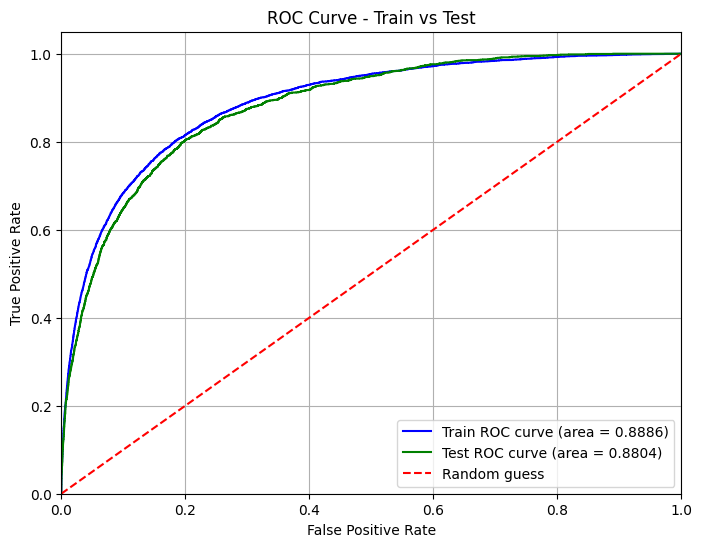

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

fpr_train, tpr_train, _ = roc_curve(y_train, best_model.predict_proba(X_train)[:, 1])
roc_auc_train = auc(fpr_train, tpr_train)

fpr_test, tpr_test, _ = roc_curve(y_test, best_model.predict_proba(X_test)[:, 1])
roc_auc_test = auc(fpr_test, tpr_test)

plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, color='blue', label=f'Train ROC curve (area = {roc_auc_train:.4f})')
plt.plot(fpr_test, tpr_test, color='green', label=f'Test ROC curve (area = {roc_auc_test:.4f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random guess')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Train vs Test')
plt.legend(loc='lower right')
plt.grid()
plt.show()

C:\Users\snbti\AppData\Local\Temp\ipykernel_13300\697075385.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_importance_df.head(20), x='Importance', y='Feature', palette='viridis')


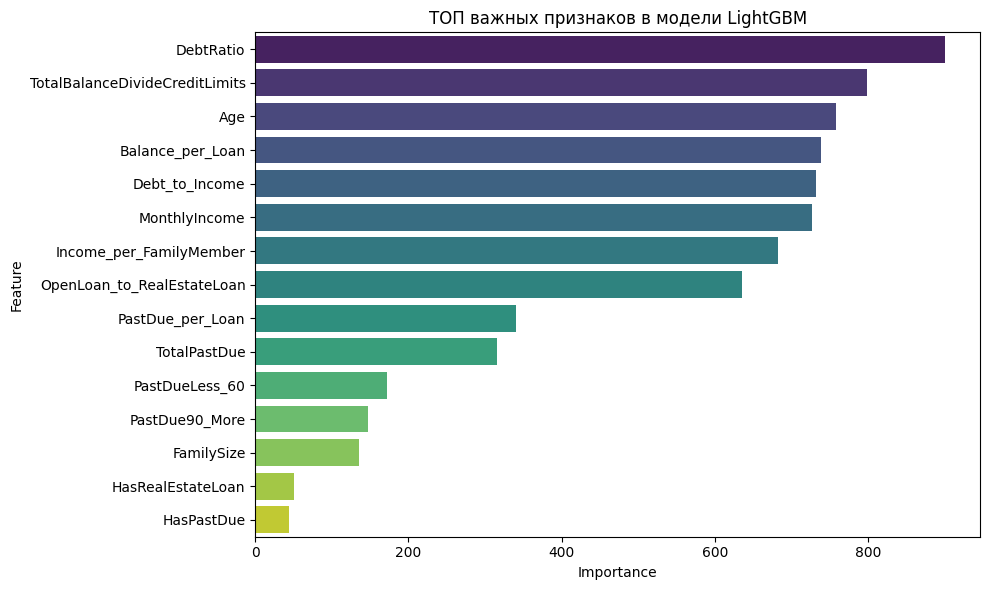

In [ ]:
importances = best_model.feature_importances_
features = X_train.columns
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance_df.head(20), x='Importance', y='Feature', palette='viridis')
plt.title('ТОП важных признаков в модели LightGBM')
plt.tight_layout()
plt.show()

За итоговую модель возьмем градиентный бустинг, так как он показал лучшие результаты

In [ ]:
y_prob_kaggle = best_model.predict_proba(test_data[X.columns])[:, 1]


submission = pd.DataFrame({
    'ID': test_data['ID'],  # ID из тестовых данных
    'Target': y_prob_kaggle  # Предсказания вероятности положительного класса
})

# Сохраняем сабмит в файл
submission.to_csv('submission69.csv', index=False)

[LightGBM] [Warning] lambda_l1 is set=0.008763439923473592, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.008763439923473592
[LightGBM] [Warning] lambda_l2 is set=5.960491132452205, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.960491132452205
